# Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelBinarizer

from sklearn.model_selection import train_test_split, GridSearchCV, KFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings

# Mount Drive and Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/airbnb.csv')
df.head()

Unnamed: 0        id                                               name  \
0           0  49849504                                     Perla bungalov   
1           1  50891766  Authentic Beach Architect Sheltered Villa with...   
2           2  50699164                                  cottages sataplia   
3           3  49871422                        Sapanca Breathable Bungalow   
4           4  51245886                                      Bungalov Ev 2   

  rating reviews    host_name      host_id                   address  \
0   4.71      64    Mehmetcan  357334205.0  Kartepe, Kocaeli, Turkey   
1    New       0        Fatih  386223873.0      Kaş, Antalya, Turkey   
2   4.85      68       Giorgi  409690853.0          Imereti, Georgia   
3    5.0      13        Melih  401873242.0  Sapanca, Sakarya, Turkey   
4    New       0  Arp Sapanca  414884116.0  Sapanca, Sakarya, Turkey   

                                 features  \
0    2 guests,2 bedrooms,1 bed,1 bathroom   
1  4 guests,2 bedrooms,2 beds,2 bathrooms   
2    4 guests,1 bedroom,3 beds,1 bathroom   
3    4 guests,1 bedroom,2 beds,1 bathroom   
4     2 guests,1 bedroom,1 bed,1 bathroom   

                                           amenities  ...  price   country  \
0  Mountain view,Valley view,Lake access,Kitchen,...  ...   8078    Turkey   
1  Kitchen,Wifi,Dedicated workspace,Free parking ...  ...   4665    Turkey   
2  Mountain view,Kitchen,Wifi,Dedicated workspace...  ...   5991   Georgia   
3  Mountain view,Valley view,Kitchen,Wifi,Free pa...  ...  11339    Turkey   
4  Kitchen,Wifi,Free parking on premises,TV,Air c...  ...   6673    Turkey   

  bathrooms  beds guests  toiles  bedrooms  studios              checkin  \
0         1     1      2       0         2        0             Flexible   
1         2     2      4       0         2        0   4 00 pm - 11 00 pm   
2         1     3      4       0         1        0        After 1 00 pm   
3         1     2      4       0         1        0        After 2 00 pm   
4         1     1      2       0         1        0        After 2 00 pm   

    checkout  
0   12 00 pm  
1   10 00 am  
2   12 00 pm  
3   12 00 pm  
4   12 00 pm  

[5 rows x 23 columns]

# Dataset Overview

In [4]:
# Column and Row Count
print("columns:", df.shape[1])
print("rows:", len(df))

columns: 23
rows: 12805


In [5]:
# First row
print(df.iloc[0])

Unnamed: 0                                                      0
id                                                       49849504
name                                               Perla bungalov
rating                                                       4.71
reviews                                                        64
host_name                                               Mehmetcan
host_id                                               357334205.0
address                                  Kartepe, Kocaeli, Turkey
features                     2 guests,2 bedrooms,1 bed,1 bathroom
amenities       Mountain view,Valley view,Lake access,Kitchen,...
safety_rules    󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...
hourse_rules    Check-in: Flexible,Check out: 12:00 pm,Pets ar...
img_links       https://a0.muscache.com/im/pictures/a5da5cb7-c...
price                                                        8078
country                                                    Turkey
bathrooms 

In [6]:
# Data types for each column
print(df.dtypes)

Unnamed: 0        int64
id                int64
name             object
rating           object
reviews          object
host_name        object
host_id         float64
address          object
features         object
amenities        object
safety_rules     object
hourse_rules     object
img_links        object
price             int64
country          object
bathrooms         int64
beds              int64
guests            int64
toiles            int64
bedrooms          int64
studios           int64
checkin          object
checkout         object
dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

In [8]:
df.describe()

Unnamed: 0            id       host_id         price     bathrooms  \
count  12805.000000  1.280500e+04  1.280500e+04  1.280500e+04  12805.000000   
mean    6402.000000  7.525187e+16  1.638192e+08  1.769780e+04      1.874424   
std     3696.629433  2.007933e+17  1.413622e+08  4.569364e+04      2.091399   
min        0.000000  1.313100e+04  2.303900e+04  3.930000e+02      0.000000   
25%     3201.000000  2.023958e+07  3.700032e+07  3.994000e+03      1.000000   
50%     6402.000000  3.682229e+07  1.256459e+08  8.175000e+03      1.000000   
75%     9603.000000  4.999760e+07  2.639623e+08  1.606200e+04      2.000000   
max    12804.000000  7.017905e+17  4.758973e+08  1.907963e+06     50.000000   

               beds        guests        toiles      bedrooms       studios  
count  12805.000000  12805.000000  12805.000000  12805.000000  12805.000000  
mean       3.316751      5.213745      0.019211      2.136041      0.023585  
std        4.037791      3.808830      0.137272      2.359005      0.151757  
min        0.000000      1.000000      0.000000      0.000000      0.000000  
25%        1.000000      2.000000      0.000000      1.000000      0.000000  
50%        2.000000      4.000000      0.000000      1.000000      0.000000  
75%        4.000000      6.000000      0.000000      3.000000      0.000000  
max       98.000000     16.000000      1.000000     50.000000      1.000000

# Data Preprocessing <font color='blue'>**[PHASE-1]**

In [9]:
preprocessed_df = df.copy()

## Missing Value Overview

In [10]:
# missing values count for each column
print(df.isnull().sum())

Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin          800
checkout        2450
dtype: int64


In [11]:
# Display number of unique values for each column
print(df.nunique())

Unnamed: 0      12805
id              12805
name            12716
rating             77
reviews           409
host_name        6837
host_id         10375
address          6287
features         2548
amenities       11630
safety_rules      257
hourse_rules     5800
img_links       12711
price            7460
country           148
bathrooms          29
beds               49
guests             16
toiles              2
bedrooms           32
studios             2
checkin           153
checkout           21
dtype: int64


In [12]:
# Show missing value count and unique values side by side with better formatting
print(f"{'Column':<24} | {'Missing Values':<15} | {'Unique Values':<15}")
print('-' * 60)

for column in df.columns:
    missing_count = df[column].isnull().sum()
    unique_values = df[column].nunique()
    print(f"{column:<24} | {missing_count:<15} | {unique_values:<15}")

Column                   | Missing Values  | Unique Values  
------------------------------------------------------------
Unnamed: 0               | 0               | 12805          
id                       | 0               | 12805          
name                     | 0               | 12716          
rating                   | 0               | 77             
reviews                  | 0               | 409            
host_name                | 8               | 6837           
host_id                  | 0               | 10375          
address                  | 0               | 6287           
features                 | 0               | 2548           
amenities                | 0               | 11630          
safety_rules             | 0               | 257            
hourse_rules             | 0               | 5800           
img_links                | 0               | 12711          
price                    | 0               | 7460           
country                 

## Handling Missing Values

### Initial Status

In [13]:
# initial missing value count
print(df.isnull().sum())

Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin          800
checkout        2450
dtype: int64


### Dropping Entire Column

In [14]:
# not necessary for our model, so dropping the entire column
preprocessed_df = preprocessed_df.drop('Unnamed: 0', axis=1)

### Filling with Central tendency

In [15]:
# All of them has 'Object' datatype
# filling those empty cells with mode
preprocessed_df['host_name'] = preprocessed_df['host_name'].fillna(preprocessed_df['host_name'].mode()[0])

### Handled Columns with missing values

In [16]:
print(preprocessed_df['host_name'].isnull().sum())

0


### Remaining Missing values

In [17]:
for x in preprocessed_df:
    cnt = preprocessed_df[x].isnull().sum()
    print(f"{x:<24}", cnt) if cnt > 0 else None

checkin                  800
checkout                 2450


<font color="lime">*The remaining missing values will be handled within EDA section*

# EDA (handle Outliers and missing values)

### checkin

In [18]:
# Check missing values
print("Missing value count:")
print(preprocessed_df[['checkin']].isnull().sum())

Missing value count:
checkin    800
dtype: int64


In [19]:
# Summary statistics before imputation
print("\nSummary statistics for 'checkin':")
print(preprocessed_df[['checkin']].describe())


Summary statistics for 'checkin':
               checkin
count            12005
unique             153
top      After 3 00 pm
freq              2554


Check for Outliers with Quartiles

In [20]:
import pandas as pd
import numpy as np

# Define the parsing function
def parse_checkin(s):
    try:
        parts = s.split()
        if len(parts) >= 3:
            hour = int(parts[-3])
            minute = int(parts[-2])
            ampm = parts[-1].lower()
            if ampm == "pm" and hour != 12:
                hour += 12
            elif ampm == "am" and hour == 12:
                hour = 0
            return hour * 60 + minute
        else:
            return None
    except:
        return None

# Apply the function to create a numerical column
preprocessed_df['checkin_minutes'] = preprocessed_df['checkin'].apply(parse_checkin)

# Replace None with NaN and drop rows with NaN in 'checkin_minutes'
preprocessed_df['checkin_minutes'] = preprocessed_df['checkin_minutes'].replace({None: np.nan})
preprocessed_df = preprocessed_df.dropna(subset=['checkin_minutes'])

# Calculate Q1, Q3, and IQR
Q1 = preprocessed_df['checkin_minutes'].quantile(0.25)
Q3 = preprocessed_df['checkin_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the results
print("First Quartile:", Q1)
print("Third Quartile:", Q3)
print("\n")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("\n")

# Count the number of outliers
num_lower_outliers = (preprocessed_df['checkin_minutes'] < lower_bound).sum()
num_upper_outliers = (preprocessed_df['checkin_minutes'] > upper_bound).sum()

print(f"Lower outliers: {num_lower_outliers}")
print(f"Upper outliers: {num_upper_outliers}")

First Quartile: 840.0
Third Quartile: 1140.0


Lower Bound: 390.0
Upper Bound: 1590.0


Lower outliers: 658
Upper outliers: 0


checkin Distribution Graphs (Initial Condition)

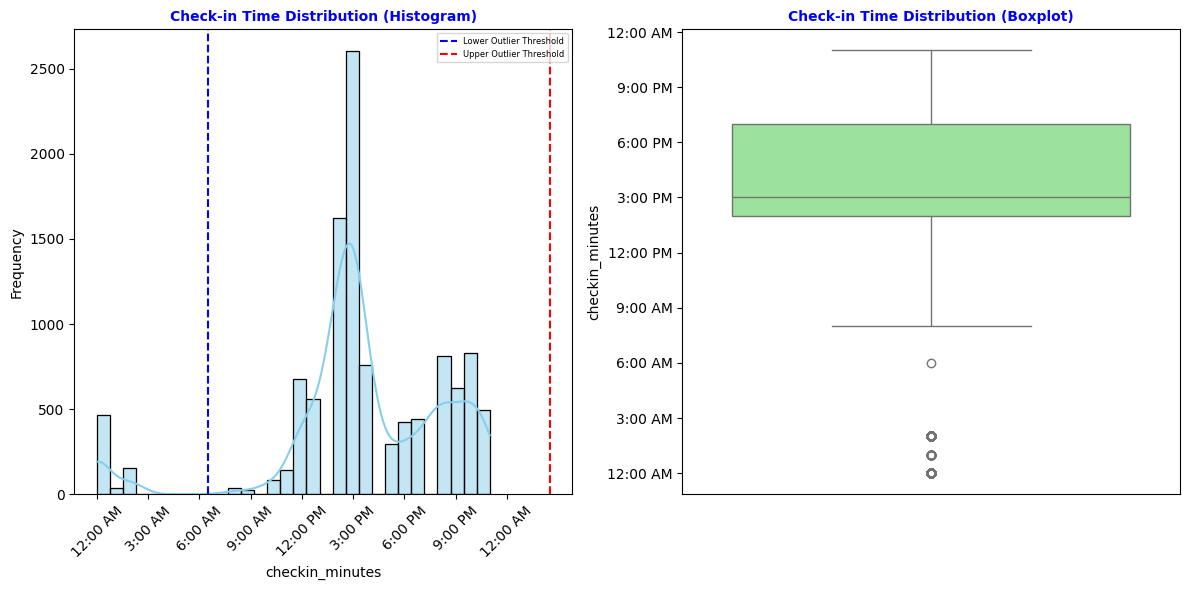

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to convert minutes since midnight to time strings
def minutes_to_time(m):
    hour = int(m // 60) % 24
    minute = int(m % 60)
    ampm = 'AM' if hour < 12 else 'PM'
    hour12 = hour if hour <= 12 else hour - 12
    if hour12 == 0:
        hour12 = 12
    return f"{hour12}:{minute:02d} {ampm}"

# Set tick positions (every 3 hours) and corresponding time labels
tick_positions = list(range(0, 1441, 180))  # 0 to 1440 minutes, step by 180 (3 hours)
tick_labels = [minutes_to_time(m) for m in tick_positions]

# Create the figure with a suitable size
plt.figure(figsize=(12, 6))

# Histogram for check-in times
plt.subplot(1, 2, 1)
sns.histplot(preprocessed_df['checkin_minutes'], bins=30, kde=True, color='skyblue')
plt.xticks(tick_positions, tick_labels, rotation=45)  # Rotate labels for readability
plt.axvline(lower_bound, color='blue', linestyle='--', label='Lower Outlier Threshold')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Outlier Threshold')
plt.legend(fontsize=6)
plt.title('Check-in Time Distribution (Histogram)', fontsize=10, color='blue', fontweight='bold')
plt.ylabel('Frequency')

# Boxplot for check-in times
plt.subplot(1, 2, 2)
sns.boxplot(y=preprocessed_df['checkin_minutes'], color='lightgreen')
plt.yticks(tick_positions, tick_labels)
plt.title('Check-in Time Distribution (Boxplot)', fontsize=10, color='blue', fontweight='bold')
plt.xticks([])  # Remove x-ticks since it’s a single vertical box

# Adjust layout and display
plt.tight_layout()
plt.show()

In [22]:
import numpy as np

# Ensure preprocessed_df is an independent DataFrame
preprocessed_df = preprocessed_df.copy()

# Cap the check-in minutes
preprocessed_df.loc[:, 'checkin_minutes_capped'] = np.clip(
    preprocessed_df['checkin_minutes'], lower_bound, upper_bound
)

# Convert capped minutes to a string format
def minutes_to_checkin_str(minutes):
    hour = int(minutes // 60) % 24
    minute = int(minutes % 60)
    ampm = 'am' if hour < 12 else 'pm'
    hour12 = hour if hour <= 12 else hour - 12
    if hour12 == 0:
        hour12 = 12
    return f"After {hour12} {minute:02d} {ampm}"

preprocessed_df.loc[:, 'checkin_capped'] = preprocessed_df['checkin_minutes_capped'].apply(minutes_to_checkin_str)

Histogram and Boxplot (after Outlier Handling)

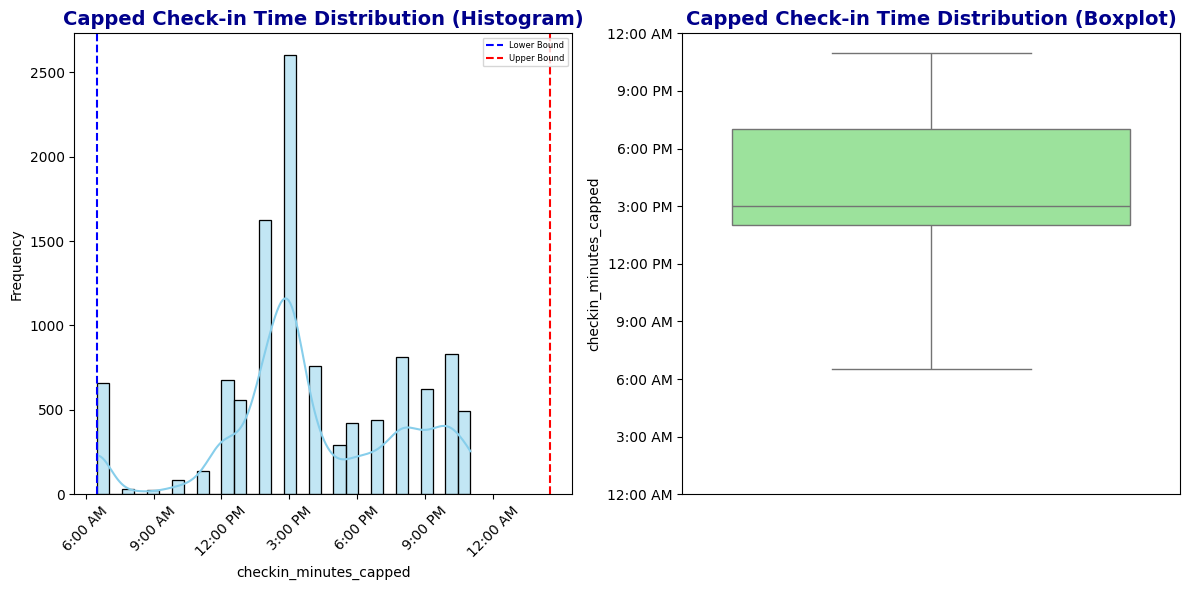

In [23]:
# Define the minutes_to_time function for axis labeling
def minutes_to_time(m):
    hour = int(m // 60) % 24
    minute = int(m % 60)
    ampm = 'AM' if hour < 12 else 'PM'
    hour12 = hour if hour <= 12 else hour - 12
    if hour12 == 0:
        hour12 = 12
    return f"{hour12}:{minute:02d} {ampm}"

# Set tick positions and labels for time axis
tick_positions = list(range(0, 1441, 180))  # 0 to 1440 minutes, step by 180 (3 hours)
tick_labels = [minutes_to_time(m) for m in tick_positions]

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Histogram for capped check-in times
plt.subplot(1, 2, 1)
sns.histplot(preprocessed_df['checkin_minutes_capped'], bins=30, kde=True, color='skyblue')
plt.xticks(tick_positions, tick_labels, rotation=45)  # Rotate labels for readability
plt.axvline(lower_bound, color='blue', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.legend(fontsize=6)
plt.title('Capped Check-in Time Distribution (Histogram)', fontsize=14, color='darkblue', fontweight='bold')
plt.ylabel('Frequency')

# Boxplot for capped check-in times
plt.subplot(1, 2, 2)
sns.boxplot(y=preprocessed_df['checkin_minutes_capped'], color='lightgreen')
plt.yticks(tick_positions, tick_labels)
plt.title('Capped Check-in Time Distribution (Boxplot)', fontsize=14, color='darkblue', fontweight='bold')
plt.xticks([])  # Remove x-ticks for a single vertical boxplot

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [24]:
print("Number of different values:", (preprocessed_df['checkin_minutes_capped'] != preprocessed_df['checkin_minutes']).sum())

Number of different values: 658


In [25]:
# Check missing values
print("Missing value count:")
print(preprocessed_df[['checkin']].isnull().sum())

Missing value count:
checkin    0
dtype: int64


### checkout

In [26]:
# Check missing values
print("Missing value count:")
print(preprocessed_df[['checkout']].isnull().sum())
# Summary statistics before imputation
print("\nSummary statistics for 'checkout':")
print(preprocessed_df[['checkout']].describe())

Missing value count:
checkout    1532
dtype: int64

Summary statistics for 'checkout':
         checkout
count        9547
unique         19
top      11 00 am
freq         4187


Check for Outliers with Quartiles

First Quartile: 600.0
Third Quartile: 660.0


Lower Bound: 510.0
Upper Bound: 750.0


Number of lower outliers: 94
Number of upper outliers: 260


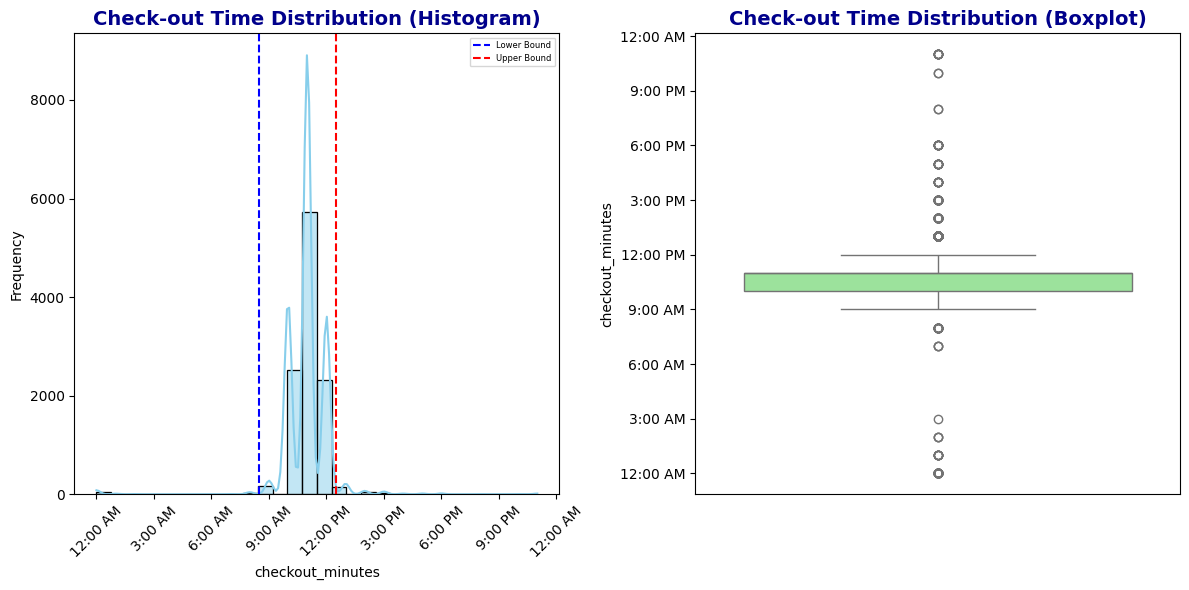

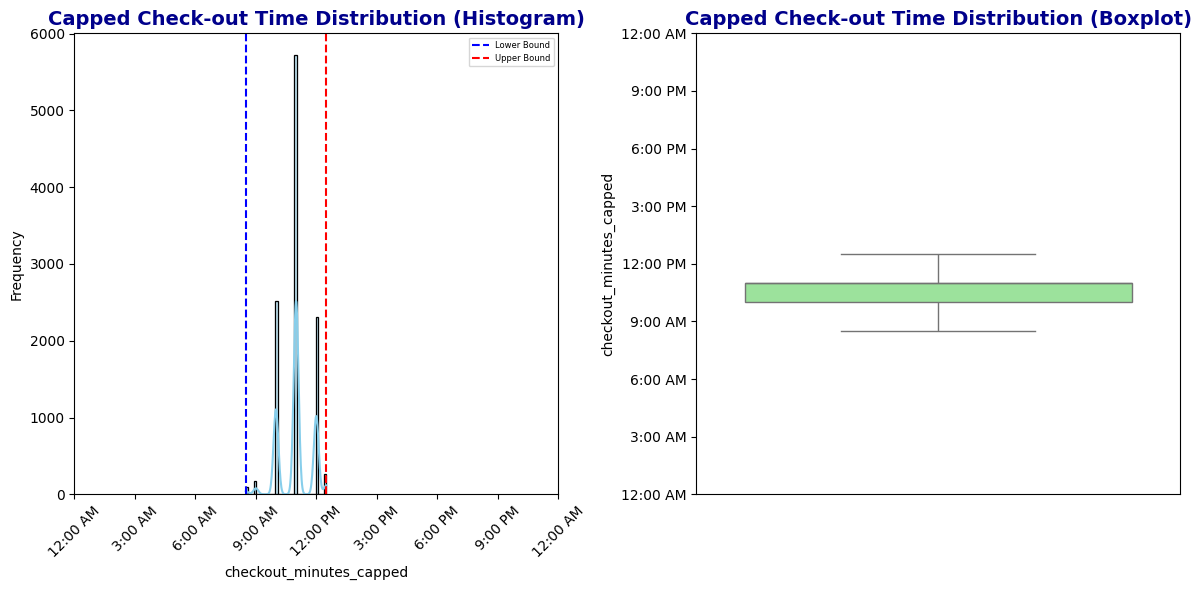

In [27]:
# Function to convert checkout time string to minutes since midnight
def checkout_to_minutes(checkout_str):
    if pd.isna(checkout_str):
        return np.nan
    parts = checkout_str.lower().split()
    if len(parts) != 3:
        raise ValueError(f"Invalid format: {checkout_str}")
    hour = int(parts[0])
    minute = int(parts[1])
    period = parts[2]
    if period == 'am':
        if hour == 12:
            hour = 0
    elif period == 'pm':
        if hour != 12:
            hour += 12
    else:
        raise ValueError(f"Invalid period: {period}")
    total_minutes = hour * 60 + minute
    return total_minutes

# Apply the conversion function to create checkout_minutes
preprocessed_df['checkout_minutes'] = preprocessed_df['checkout'].apply(checkout_to_minutes)

# Impute missing values with the median
median_checkout = preprocessed_df['checkout_minutes'].median()
preprocessed_df['checkout_minutes'] = preprocessed_df['checkout_minutes'].fillna(median_checkout)

# Calculate quartiles and IQR for outlier detection
Q1_checkout = preprocessed_df['checkout_minutes'].quantile(0.25)
Q3_checkout = preprocessed_df['checkout_minutes'].quantile(0.75)
IQR_checkout = Q3_checkout - Q1_checkout
lower_bound_checkout = Q1_checkout - 1.5 * IQR_checkout
upper_bound_checkout = Q3_checkout + 1.5 * IQR_checkout

# Print the bounds for reference
print("First Quartile:", Q1_checkout)
print("Third Quartile:", Q3_checkout)
print("\n")
print("Lower Bound:", lower_bound_checkout)
print("Upper Bound:", upper_bound_checkout)
print("\n")

# Count the number of outliers
num_lower_outliers = (preprocessed_df['checkout_minutes'] < lower_bound_checkout).sum()
num_upper_outliers = (preprocessed_df['checkout_minutes'] > upper_bound_checkout).sum()
print(f"Number of lower outliers: {num_lower_outliers}")
print(f"Number of upper outliers: {num_upper_outliers}")

# Cap the outliers
preprocessed_df['checkout_minutes_capped'] = np.clip(preprocessed_df['checkout_minutes'],
                                                    lower_bound_checkout,
                                                    upper_bound_checkout)

# Define the minutes_to_time function for axis labeling (assuming it's already defined)
def minutes_to_time(m):
    hour = int(m // 60) % 24
    minute = int(m % 60)
    ampm = 'AM' if hour < 12 else 'PM'
    hour12 = hour if hour <= 12 else hour - 12
    if hour12 == 0:
        hour12 = 12
    return f"{hour12}:{minute:02d} {ampm}"

# Set tick positions and labels
tick_positions = list(range(0, 1441, 180))  # 0 to 1440 minutes, step by 180 (3 hours)
tick_labels = [minutes_to_time(m) for m in tick_positions]

# Visualize original checkout_minutes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(preprocessed_df['checkout_minutes'], bins=30, kde=True, color='skyblue')
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.axvline(lower_bound_checkout, color='blue', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound_checkout, color='red', linestyle='--', label='Upper Bound')
plt.legend(fontsize=6)
plt.title('Check-out Time Distribution (Histogram)', fontsize=14, color='darkblue', fontweight='bold')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=preprocessed_df['checkout_minutes'], color='lightgreen')
plt.yticks(tick_positions, tick_labels)
plt.title('Check-out Time Distribution (Boxplot)', fontsize=14, color='darkblue', fontweight='bold')
plt.xticks([])
plt.tight_layout()
plt.show()

# Visualize capped checkout_minutes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(preprocessed_df['checkout_minutes_capped'], bins=30, kde=True, color='skyblue')
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.axvline(lower_bound_checkout, color='blue', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound_checkout, color='red', linestyle='--', label='Upper Bound')
plt.legend(fontsize=6)
plt.title('Capped Check-out Time Distribution (Histogram)', fontsize=14, color='darkblue', fontweight='bold')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=preprocessed_df['checkout_minutes_capped'], color='lightgreen')
plt.yticks(tick_positions, tick_labels)
plt.title('Capped Check-out Time Distribution (Boxplot)', fontsize=14, color='darkblue', fontweight='bold')
plt.xticks([])
plt.tight_layout()
plt.show()

checkout Distribution Graphs (Initial Condition)

In [28]:
print("Number of different values:", (preprocessed_df['checkout_minutes_capped'] != preprocessed_df['checkout_minutes']).sum())

Number of different values: 354


Histogram and Boxplot (after Outlier Handling)

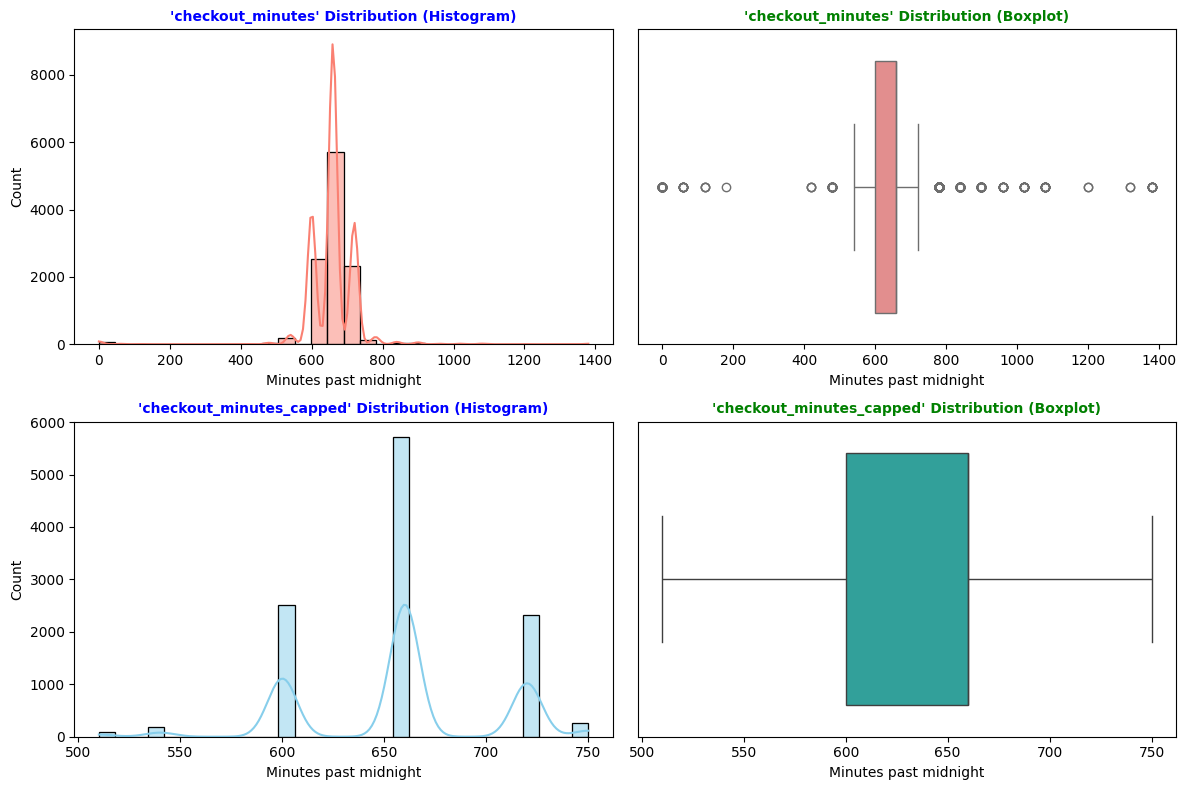

In [29]:
plt.figure(figsize=(12, 8))

# 1. Original checkout_minutes Histogram
plt.subplot(2, 2, 1)
sns.histplot(preprocessed_df['checkout_minutes'].dropna(),
             bins=30, kde=True, color='salmon')
plt.title("'checkout_minutes' Distribution (Histogram)",
          fontsize=10, color='blue', fontweight='bold')
plt.xlabel('Minutes past midnight')
plt.ylabel('Count')

# 2. Original checkout_minutes Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=preprocessed_df['checkout_minutes'].dropna(),
            color='lightcoral')
plt.title("'checkout_minutes' Distribution (Boxplot)",
          fontsize=10, color='green', fontweight='bold')
plt.xlabel('Minutes past midnight')
plt.yticks([])  # single box, so y-axis ticks aren’t needed

# 3. Capped checkout_minutes_capped Histogram
plt.subplot(2, 2, 3)
sns.histplot(preprocessed_df['checkout_minutes_capped'].dropna(),
             bins=30, kde=True, color='skyblue')
plt.title("'checkout_minutes_capped' Distribution (Histogram)",
          fontsize=10, color='blue', fontweight='bold')
plt.xlabel('Minutes past midnight')
plt.ylabel('Count')

# 4. Capped checkout_minutes_capped Boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x=preprocessed_df['checkout_minutes_capped'].dropna(),
            color='lightseagreen')
plt.title("'checkout_minutes_capped' Distribution (Boxplot)",
          fontsize=10, color='green', fontweight='bold')
plt.xlabel('Minutes past midnight')
plt.yticks([])

plt.tight_layout()
plt.show()

In [30]:
print("Missing value count after imputation:")
print(preprocessed_df[['checkout_minutes']].isnull().sum())

Missing value count after imputation:
checkout_minutes    0
dtype: int64


In [31]:
# missing values count for each column
print(preprocessed_df.isnull().sum())

id                            0
name                          0
rating                        0
reviews                       0
host_name                     0
host_id                       0
address                       0
features                      0
amenities                     0
safety_rules                  0
hourse_rules                  0
img_links                     0
price                         0
country                       0
bathrooms                     0
beds                          0
guests                        0
toiles                        0
bedrooms                      0
studios                       0
checkin                       0
checkout                   1532
checkin_minutes               0
checkin_minutes_capped        0
checkin_capped                0
checkout_minutes              0
checkout_minutes_capped       0
dtype: int64


In [32]:
# Remove the 'checkout' column from the DataFrame
preprocessed_df = preprocessed_df.drop('checkout', axis=1)

# Verify that the 'checkout' column has been removed
print("Columns after removing 'checkout':")
print(preprocessed_df.columns)

# Check for missing values in the updated DataFrame
print("\nMissing value count after removing 'checkout':")
print(preprocessed_df.isnull().sum())

Columns after removing 'checkout':
Index(['id', 'name', 'rating', 'reviews', 'host_name', 'host_id', 'address',
       'features', 'amenities', 'safety_rules', 'hourse_rules', 'img_links',
       'price', 'country', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms',
       'studios', 'checkin', 'checkin_minutes', 'checkin_minutes_capped',
       'checkin_capped', 'checkout_minutes', 'checkout_minutes_capped'],
      dtype='object')

Missing value count after removing 'checkout':
id                         0
name                       0
rating                     0
reviews                    0
host_name                  0
host_id                    0
address                    0
features                   0
amenities                  0
safety_rules               0
hourse_rules               0
img_links                  0
price                      0
country                    0
bathrooms                  0
beds                       0
guests                     0
toiles               

In [33]:
# Remove the 'checkin' column from the DataFrame
preprocessed_df = preprocessed_df.drop('checkin', axis=1)

# Verify that the 'checkin' column has been removed
print("Columns after removing 'checkin':")
print(preprocessed_df.columns)

# Check for missing values in the updated DataFrame
print("\nMissing value count after removing 'checkin':")
print(preprocessed_df.isnull().sum())

Columns after removing 'checkin':
Index(['id', 'name', 'rating', 'reviews', 'host_name', 'host_id', 'address',
       'features', 'amenities', 'safety_rules', 'hourse_rules', 'img_links',
       'price', 'country', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms',
       'studios', 'checkin_minutes', 'checkin_minutes_capped',
       'checkin_capped', 'checkout_minutes', 'checkout_minutes_capped'],
      dtype='object')

Missing value count after removing 'checkin':
id                         0
name                       0
rating                     0
reviews                    0
host_name                  0
host_id                    0
address                    0
features                   0
amenities                  0
safety_rules               0
hourse_rules               0
img_links                  0
price                      0
country                    0
bathrooms                  0
beds                       0
guests                     0
toiles                     0
bedro

# Data Encoding

In [34]:
# # Load preprocessed_df
# file_path = '/content/drive/MyDrive/airbnb.csv'
# preprocessed_df = pd.read_csv(file_path)
# preprocessed_df.head()

## Initial Status

In [35]:
print(preprocessed_df.nunique())

id                         11079
name                       11010
rating                        74
reviews                      407
host_name                   6099
host_id                     9008
address                     5641
features                    2215
amenities                  10171
safety_rules                 246
hourse_rules                5187
img_links                  10999
price                       6874
country                      144
bathrooms                     28
beds                          45
guests                        16
toiles                         2
bedrooms                      31
studios                        2
checkin_minutes               20
checkin_minutes_capped        17
checkin_capped                17
checkout_minutes              19
checkout_minutes_capped        6
dtype: int64


In [36]:
print(preprocessed_df.dtypes)

id                           int64
name                        object
rating                      object
reviews                     object
host_name                   object
host_id                    float64
address                     object
features                    object
amenities                   object
safety_rules                object
hourse_rules                object
img_links                   object
price                        int64
country                     object
bathrooms                    int64
beds                         int64
guests                       int64
toiles                       int64
bedrooms                     int64
studios                      int64
checkin_minutes            float64
checkin_minutes_capped     float64
checkin_capped              object
checkout_minutes           float64
checkout_minutes_capped    float64
dtype: object


In [37]:
# missing values count for each column
print(preprocessed_df.isnull().sum())

id                         0
name                       0
rating                     0
reviews                    0
host_name                  0
host_id                    0
address                    0
features                   0
amenities                  0
safety_rules               0
hourse_rules               0
img_links                  0
price                      0
country                    0
bathrooms                  0
beds                       0
guests                     0
toiles                     0
bedrooms                   0
studios                    0
checkin_minutes            0
checkin_minutes_capped     0
checkin_capped             0
checkout_minutes           0
checkout_minutes_capped    0
dtype: int64


In [38]:
# Unique values in each column
for col in preprocessed_df:
    print(col,": ", preprocessed_df[col].unique(),"\n")

id :  [50891766 50699164 49871422 ... 29975283 32977697 40547903] 

name :  ['Authentic Beach Architect Sheltered Villa with Pool and Jacuzzi'
 'cottages sataplia' 'Sapanca Breathable Bungalow' ...
 'Bubble Hotel Ubud with Bathtub under the Sky' 'Paradise Eco Hub'
 "Enjoy Vitamin SEA!  Ocean Front! [Ocean's Seven]"] 

rating :  ['New' '4.85' '5.0' '4.67' '4.97' '4.89' '4.83' '4.87' '4.71' '4.9' '4.75'
 '4.76' '4.84' '4.79' '4.82' '4.93' '4.96' '4.64' '4.68' '4.8' '4.69'
 '4.58' '4.91' '4.88' '4.94' '4.92' '4.86' '4.78' '4.57' '4.99' '4.98'
 '4.74' '4.7' '4.77' '4.73' '4.63' '4.95' '4.81' '4.53' '4.59' '4.62'
 '4.61' '4.72' '4.51' '4.54' '4.56' '4.65' '4.6' '4.55' '4.66' '4.52'
 '4.5' '4.33' '4.26' '3.33' '4.2' '4.48' '3.0' '4.0' '4.49' '4.28' '4.45'
 '4.36' '4.46' '4.44' '4.43' '3.75' '4.13' '4.15' '3.88' '4.29' '4.4'
 '3.5' '4.31'] 

reviews :  ['0' '68' '13' '3' '77' '55' '116' '23' '21' '8' '52' '17' '61' '49' '38'
 '4' '15' '26' '2' '9' '20' '11' '7' '1' '241' '41' '10' '25' '154' 

## notes

Categorical columns requiring encoding:
amenities, safety_rules, hourse_rules: Multi-label text fields, split and encoded with one-hot encoding.
country: High-cardinality categorical variable, encoded with frequency encoding.
checkin_capped: Categorical with ordinal potential, encoded with label encoding.
Numerical columns needing preprocessing:
rating: Convert 'New' to 0 and change to float.
reviews: Remove commas and convert to int.
No encoding needed:
Numerical columns: id, host_id, price, bathrooms, beds, guests, toiles, bedrooms, studios, checkin_minutes, checkin_minutes_capped, checkout_minutes, checkout_minutes_capped.

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder

# --- Check Initial Missing Values ---
print("Initial missing value count:")
print(preprocessed_df.isnull().sum())

# --- Preprocessing Numerical Columns ---
# Preprocess 'rating': Replace 'New' with 0 and convert to float
preprocessed_df['rating'] = pd.to_numeric(preprocessed_df['rating'], errors='coerce').fillna(0)

# Preprocess 'reviews': Remove commas and convert to integer
preprocessed_df['reviews'] = preprocessed_df['reviews'].str.replace(',', '').astype(int)

# --- Helper Function ---
# Modified function to split comma-separated strings, handle edge cases
def split_and_strip(col):
    def process_value(x):
        if pd.isna(x) or not isinstance(x, str) or x.strip() == '':
            return []
        return [item.strip() for item in x.split(',')]
    return col.apply(process_value)

# --- Multi-Label Columns Encoding (One-Hot Encoding) ---
# Split the multi-label columns into lists
preprocessed_df['amenities'] = split_and_strip(preprocessed_df['amenities'])
preprocessed_df['safety_rules'] = split_and_strip(preprocessed_df['safety_rules'])
preprocessed_df['hourse_rules'] = split_and_strip(preprocessed_df['hourse_rules'])

# Encode 'amenities' using MultiLabelBinarizer
mlb_amenities = MultiLabelBinarizer()
amenities_encoded = mlb_amenities.fit_transform(preprocessed_df['amenities'])
amenities_df = pd.DataFrame(
    amenities_encoded,
    columns=[f'amenity_{cls}' for cls in mlb_amenities.classes_],
    index=preprocessed_df.index  # Ensure same index
)

# Encode 'safety_rules' using MultiLabelBinarizer
mlb_safety = MultiLabelBinarizer()
safety_encoded = mlb_safety.fit_transform(preprocessed_df['safety_rules'])
safety_df = pd.DataFrame(
    safety_encoded,
    columns=[f'safety_{cls}' for cls in mlb_safety.classes_],
    index=preprocessed_df.index  # Ensure same index
)

# Encode 'hourse_rules' using MultiLabelBinarizer
mlb_hourse = MultiLabelBinarizer()
hourse_encoded = mlb_hourse.fit_transform(preprocessed_df['hourse_rules'])
hourse_df = pd.DataFrame(
    hourse_encoded,
    columns=[f'hourse_{cls}' for cls in mlb_hourse.classes_],
    index=preprocessed_df.index  # Ensure same index
)

# Concatenate the encoded DataFrames with the original DataFrame
preprocessed_df = pd.concat([preprocessed_df, amenities_df, safety_df, hourse_df], axis=1)

# Drop the original multi-label columns
preprocessed_df.drop(['amenities', 'safety_rules', 'hourse_rules'], axis=1, inplace=True)

# --- Frequency Encoding for 'country' ---
# Calculate frequency of each country and map to the column
country_freq = preprocessed_df['country'].value_counts()
preprocessed_df['country_encoded'] = preprocessed_df['country'].map(country_freq)
# Drop the original 'country' column
preprocessed_df.drop('country', axis=1, inplace=True)

# --- Label Encoding for 'checkin_capped' ---
# Apply LabelEncoder to 'checkin_capped'
le = LabelEncoder()
preprocessed_df['checkin_capped_encoded'] = le.fit_transform(preprocessed_df['checkin_capped'])
# Drop the original 'checkin_capped' column
preprocessed_df.drop('checkin_capped', axis=1, inplace=True)

# --- Verify Missing Values Post-Encoding ---
print("\nMissing value count after encoding:")
print(preprocessed_df.isnull().sum())

# Save the preprocessed dataset (optional)
preprocessed_df.to_csv('preprocessed_dataset.csv', index=False)

Initial missing value count:
id                         0
name                       0
rating                     0
reviews                    0
host_name                  0
host_id                    0
address                    0
features                   0
amenities                  0
safety_rules               0
hourse_rules               0
img_links                  0
price                      0
country                    0
bathrooms                  0
beds                       0
guests                     0
toiles                     0
bedrooms                   0
studios                    0
checkin_minutes            0
checkin_minutes_capped     0
checkin_capped             0
checkout_minutes           0
checkout_minutes_capped    0
dtype: int64

Missing value count after encoding:
id                           0
name                         0
rating                       0
reviews                      0
host_name                    0
                            ..
hourse_Sho

In [40]:
# missing values count for each column
print(preprocessed_df.isnull().sum())

id                           0
name                         0
rating                       0
reviews                      0
host_name                    0
                            ..
hourse_Show more             0
hourse_Smoking is allowed    0
hourse_󱤇                     0
country_encoded              0
checkin_capped_encoded       0
Length: 993, dtype: int64


In [41]:
preprocessed_df.head()

id                                               name  rating  \
1  50891766  Authentic Beach Architect Sheltered Villa with...    0.00   
2  50699164                                  cottages sataplia    4.85   
3  49871422                        Sapanca Breathable Bungalow    5.00   
4  51245886                                      Bungalov Ev 2    0.00   
5  48650769                      CasaMia White Suite Treehouse    0.00   

   reviews    host_name      host_id                   address  \
1        0        Fatih  386223873.0      Kaş, Antalya, Turkey   
2       68       Giorgi  409690853.0          Imereti, Georgia   
3       13        Melih  401873242.0  Sapanca, Sakarya, Turkey   
4        0  Arp Sapanca  414884116.0  Sapanca, Sakarya, Turkey   
5        0      Casamia  261290482.0  Sapanca, Sakarya, Turkey   

                                 features  \
1  4 guests,2 bedrooms,2 beds,2 bathrooms   
2    4 guests,1 bedroom,3 beds,1 bathroom   
3    4 guests,1 bedroom,2 beds,1 bathroom   
4     2 guests,1 bedroom,1 bed,1 bathroom   
5    2 guests,1 bedroom,2 beds,1 bathroom   

                                           img_links  price  ...  \
1  https://a0.muscache.com/im/pictures/61b70855-2...   4665  ...   
2  https://a0.muscache.com/im/pictures/miso/Hosti...   5991  ...   
3  https://a0.muscache.com/im/pictures/72e6396e-e...  11339  ...   
4  https://a0.muscache.com/im/pictures/73973308-e...   6673  ...   
5  https://a0.muscache.com/im/pictures/miso/Hosti...  14729  ...   

   hourse_Pets are allowed  hourse_Self check-in with building staff  \
1                        0                                         0   
2                        1                                         0   
3                        0                                         0   
4                        0                                         0   
5                        0                                         0   

   hourse_Self check-in with keypad  hourse_Self check-in with lockbox  \
1                                 0                                  0   
2                                 0                                  1   
3                                 0                                  0   
4                                 0                                  0   
5                                 0                                  0   

   hourse_Self check-in with smart lock  hourse_Show more  \
1                                     0                 0   
2                                     0                 0   
3                                     0                 0   
4                                     0                 1   
5                                     0                 0   

   hourse_Smoking is allowed  hourse_󱤇  country_encoded  \
1                          0         0              446   
2                          0         0              330   
3                          0         0              446   
4                          0         0              446   
5                          0         0              446   

   checkin_capped_encoded  
1                       4  
2                       0  
3                       6  
4                       6  
5                       6  

[5 rows x 993 columns]

To convert the text columns for encoding, I propose the following:

name: Extract the number of words in the name as a numerical feature to capture description complexity.
host_name: Apply frequency encoding based on the number of listings per host, using host_id to ensure uniqueness.
address: Extract the city (first part of the address string) and apply frequency encoding, acknowledging potential inconsistencies in address formats.
features: Drop this column, as its information is already captured in guests, bedrooms, beds, and bathrooms.
img_links: Drop this column, as image URLs are not directly usable in numerical models.
checkin and checkout: Drop these columns, as their numerical equivalents (checkin_minutes, checkout_minutes, checkin_capped) are already available.

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# --- Check Initial Missing Values ---
print("Initial missing value count:")
print(preprocessed_df.isnull().sum())

# --- Feature Extraction for 'name' ---
# Create a new column for the number of words in the name
preprocessed_df['name_word_count'] = preprocessed_df['name'].apply(
    lambda x: len(str(x).split()) if pd.notna(x) else 0
)
# Drop the original 'name' column
preprocessed_df.drop('name', axis=1, inplace=True)

# --- Frequency Encoding for 'host_name' using 'host_id' ---
# Create 'host_listing_count' by counting listings per host_id
host_counts = preprocessed_df['host_id'].value_counts()
preprocessed_df['host_listing_count'] = preprocessed_df['host_id'].map(host_counts)
# Drop 'host_name' and 'host_id' columns
preprocessed_df.drop(['host_name', 'host_id'], axis=1, inplace=True)

# --- Frequency Encoding for 'address' (city extraction) ---
# Extract city (first part before comma) from address, handle edge cases
def extract_city(address):
    if pd.isna(address) or not isinstance(address, str) or address.strip() == '':
        return 'Unknown'
    parts = address.split(',')
    return parts[0].strip() if parts else 'Unknown'

preprocessed_df['city'] = preprocessed_df['address'].apply(extract_city)
# Apply frequency encoding to city
city_freq = preprocessed_df['city'].value_counts()
preprocessed_df['city_encoded'] = preprocessed_df['city'].map(city_freq)
# Drop 'address' and 'city' columns
preprocessed_df.drop(['address', 'city'], axis=1, inplace=True)

# --- Drop Redundant or Non-Usable Columns ---
# Drop 'features', 'img_links'.
columns_to_drop = ['features', 'img_links']
preprocessed_df.drop(columns=[col for col in columns_to_drop if col in preprocessed_df.columns], axis=1, inplace=True)

# --- Verify Encoding and Missing Values ---
print("\nColumns after encoding:")
print(preprocessed_df.columns.tolist())
print("\nData types after encoding:")
print(preprocessed_df.dtypes)
print("\nMissing value count after encoding:")
print(preprocessed_df.isnull().sum())

# Save the preprocessed dataset (optional)
preprocessed_df.to_csv('preprocessed_dataset_text_encoded.csv', index=False)

Initial missing value count:
id                           0
name                         0
rating                       0
reviews                      0
host_name                    0
                            ..
hourse_Show more             0
hourse_Smoking is allowed    0
hourse_󱤇                     0
country_encoded              0
checkin_capped_encoded       0
Length: 993, dtype: int64

Columns after encoding:
['id', 'rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios', 'checkin_minutes', 'checkin_minutes_capped', 'checkout_minutes', 'checkout_minutes_capped', 'amenity_100" HDTV with Amazon Prime Video', 'amenity_100" TV', 'amenity_100" TV with Chromecast', 'amenity_100" TV with Netflix', 'amenity_101" HDTV with HBO Max', 'amenity_108" HDTV with standard cable/satellite', 'amenity_12" TV with Amazon Prime Video', 'amenity_12" TV with standard cable/satellite', 'amenity_12v cool box refrigerator', 'amenity_14" HDTV with cable/satellite TV',

Data type of 'price': int64

Summary Statistics for 'price':
count    1.107900e+04
mean     1.848362e+04
std      4.730003e+04
min      4.620000e+02
25%      4.451000e+03
50%      8.631000e+03
75%      1.676100e+04
max      1.907963e+06
Name: price, dtype: float64

Missing Values in 'price':
0

Number of Unique Values in 'price':
6874

First few rows of 'price':
1     4665
2     5991
3    11339
4     6673
5    14729
Name: price, dtype: int64


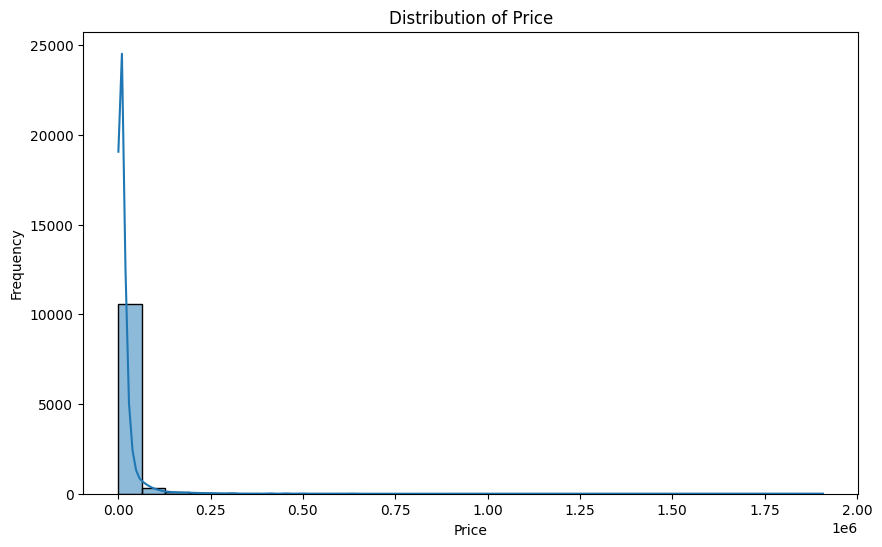

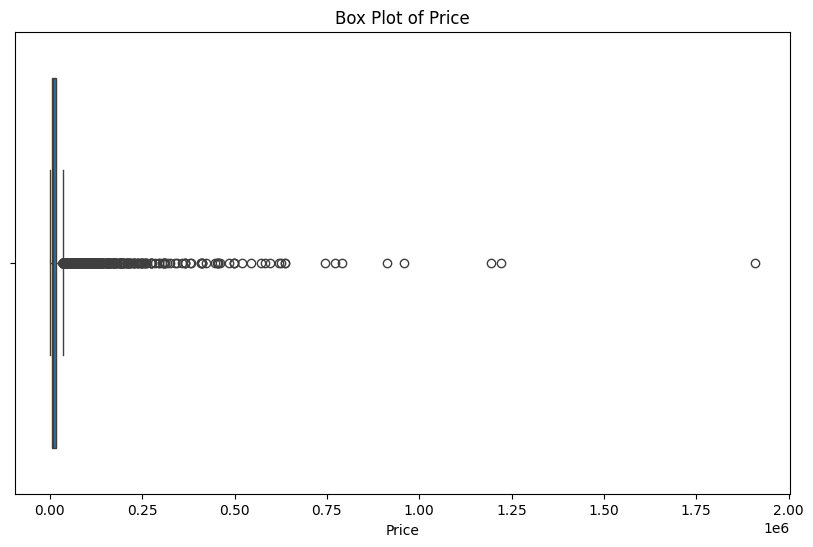


Thresholds for Binning:
25th percentile (price_low): 4451.0
75th percentile (price_reasonable upper bound): 16761.0
99th percentile (price_high upper bound): 179742.49999999892

Distribution of price_category:
price_category
price_reasonable    0.500226
price_low           0.250203
price_high          0.239552
price_others        0.010019
Name: proportion, dtype: float64

First few rows with encoded categories:
    price    price_category  price_price_low  price_price_reasonable  \
1    4665  price_reasonable            False                    True   
2    5991  price_reasonable            False                    True   
3   11339  price_reasonable            False                    True   
4    6673  price_reasonable            False                    True   
5   14729  price_reasonable            False                    True   
6   12312  price_reasonable            False                    True   
8    1747         price_low             True                   False   
9   3048

In [43]:
# Assuming preprocessed_df is already defined
df = preprocessed_df.copy()

# --- Step 1: Analyze the 'price' column ---
# Display data type
print("Data type of 'price':", df['price'].dtype)

# Display summary statistics
print("\nSummary Statistics for 'price':")
print(df['price'].describe())

# Check for missing values
print("\nMissing Values in 'price':")
print(df['price'].isnull().sum())

# Check number of unique values
print("\nNumber of Unique Values in 'price':")
print(df['price'].nunique())

# Display first few rows
print("\nFirst few rows of 'price':")
print(df['price'].head())

# Visualize distribution with histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize outliers with box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

# --- Step 2: Encode 'price' into categories ---
# Define thresholds using quantiles
low_threshold = df['price'].quantile(0.25)
reasonable_high_threshold = df['price'].quantile(0.75)
others_threshold = df['price'].quantile(0.99)

print("\nThresholds for Binning:")
print(f"25th percentile (price_low): {low_threshold}")
print(f"75th percentile (price_reasonable upper bound): {reasonable_high_threshold}")
print(f"99th percentile (price_high upper bound): {others_threshold}")

# Create categorical price column using pd.cut
df['price_category'] = pd.cut(
    df['price'],
    bins=[-float('inf'), low_threshold, reasonable_high_threshold, others_threshold, float('inf')],
    labels=['price_low', 'price_reasonable', 'price_high', 'price_others'],
    include_lowest=True
)

# Display distribution of categories
print("\nDistribution of price_category:")
print(df['price_category'].value_counts(normalize=True))

# One-hot encode the categories for ANN
df_encoded = pd.get_dummies(df['price_category'], prefix='price')
df = pd.concat([df, df_encoded], axis=1)

# Display first few rows with encoded categories
print("\nFirst few rows with encoded categories:")
print(df[['price', 'price_category', 'price_price_low', 'price_price_reasonable', 'price_price_high', 'price_price_others']].head(10))

# Save the updated dataset
df.to_csv('dataset_with_price_categories.csv', index=False)

In [44]:
preprocessed_df = df.copy()

In [45]:
preprocessed_df.head()

id  rating  reviews  price  bathrooms  beds  guests  toiles  \
1  50891766    0.00        0   4665          2     2       4       0   
2  50699164    4.85       68   5991          1     3       4       0   
3  49871422    5.00       13  11339          1     2       4       0   
4  51245886    0.00        0   6673          1     1       2       0   
5  48650769    0.00        0  14729          1     2       2       0   

   bedrooms  studios  ...  country_encoded  checkin_capped_encoded  \
1         2        0  ...              446                       4   
2         1        0  ...              330                       0   
3         1        0  ...              446                       6   
4         1        0  ...              446                       6   
5         1        0  ...              446                       6   

   name_word_count  host_listing_count  city_encoded    price_category  \
1                9                   7            54  price_reasonable   
2                2                   1             1  price_reasonable   
3                3                   1            90  price_reasonable   
4                3                   1            90  price_reasonable   
5                4                   2            90  price_reasonable   

   price_price_low  price_price_reasonable  price_price_high  \
1            False                    True             False   
2            False                    True             False   
3            False                    True             False   
4            False                    True             False   
5            False                    True             False   

   price_price_others  
1               False  
2               False  
3               False  
4               False  
5               False  

[5 rows x 995 columns]

In [46]:
preprocessed_df.isnull().sum()

id                        0
rating                    0
reviews                   0
price                     0
bathrooms                 0
                         ..
price_category            0
price_price_low           0
price_price_reasonable    0
price_price_high          0
price_price_others        0
Length: 995, dtype: int64

## Final Status

In [47]:
print(preprocessed_df.dtypes)

id                           int64
rating                     float64
reviews                      int64
price                        int64
bathrooms                    int64
                            ...   
price_category            category
price_price_low               bool
price_price_reasonable        bool
price_price_high              bool
price_price_others            bool
Length: 995, dtype: object


In [48]:
# Unique values in each column
for col in preprocessed_df:
  print(col,": ", preprocessed_df[col].unique(),"\n")

id :  [50891766 50699164 49871422 ... 29975283 32977697 40547903] 

rating :  [0.   4.85 5.   4.67 4.97 4.89 4.83 4.87 4.71 4.9  4.75 4.76 4.84 4.79
 4.82 4.93 4.96 4.64 4.68 4.8  4.69 4.58 4.91 4.88 4.94 4.92 4.86 4.78
 4.57 4.99 4.98 4.74 4.7  4.77 4.73 4.63 4.95 4.81 4.53 4.59 4.62 4.61
 4.72 4.51 4.54 4.56 4.65 4.6  4.55 4.66 4.52 4.5  4.33 4.26 3.33 4.2
 4.48 3.   4.   4.49 4.28 4.45 4.36 4.46 4.44 4.43 3.75 4.13 4.15 3.88
 4.29 4.4  3.5  4.31] 

reviews :  [   0   68   13    3   77   55  116   23   21    8   52   17   61   49
   38    4   15   26    2    9   20   11    7    1  241   41   10   25
  154   44   19   58  137   33   18   16   12  113  125   42  244   27
  188   34   69   97    6   86  114   65   91   32   53  231   99   14
  120   29   28   22  123    5   90  124  110   79   93   54   59   74
   31   48   30   89   92   35   24  229   40  102   39  194  100  147
   37   78   88   71  130  576 1003  261  726  127   76   84  192   46
  135  159  158   64   45   95  104 

In [49]:
preprocessed_df.head()

id  rating  reviews  price  bathrooms  beds  guests  toiles  \
1  50891766    0.00        0   4665          2     2       4       0   
2  50699164    4.85       68   5991          1     3       4       0   
3  49871422    5.00       13  11339          1     2       4       0   
4  51245886    0.00        0   6673          1     1       2       0   
5  48650769    0.00        0  14729          1     2       2       0   

   bedrooms  studios  ...  country_encoded  checkin_capped_encoded  \
1         2        0  ...              446                       4   
2         1        0  ...              330                       0   
3         1        0  ...              446                       6   
4         1        0  ...              446                       6   
5         1        0  ...              446                       6   

   name_word_count  host_listing_count  city_encoded    price_category  \
1                9                   7            54  price_reasonable   
2                2                   1             1  price_reasonable   
3                3                   1            90  price_reasonable   
4                3                   1            90  price_reasonable   
5                4                   2            90  price_reasonable   

   price_price_low  price_price_reasonable  price_price_high  \
1            False                    True             False   
2            False                    True             False   
3            False                    True             False   
4            False                    True             False   
5            False                    True             False   

   price_price_others  
1               False  
2               False  
3               False  
4               False  
5               False  

[5 rows x 995 columns]

# Check for Standardization

In [50]:
from scipy import stats

# Function to check Gaussian distribution
def check_gaussian_distribution(column_name):
    # Check if the column exists in the DataFrame
    if column_name not in preprocessed_df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    # Check data type of the column
    if preprocessed_df[column_name].dtype in [np.int64, np.float64]: # Check for numerical data type
        # Plot histogram and Q-Q plot
        plt.figure(figsize=(8, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(preprocessed_df[column_name], bins=30, kde=True, color='skyblue', stat="density")
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Density')
        plt.grid(True)

        # Q-Q Plot
        plt.subplot(1, 2, 2)
        stats.probplot(preprocessed_df[column_name], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {column_name}')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Shapiro-Wilk Test
        if len(preprocessed_df[column_name]) > 5000:
            print("Sample size > 5000. Shapiro-Wilk may not be reliable; consider using other tests.")

        stat, p_value = stats.shapiro(preprocessed_df[column_name])
        print(f'Shapiro-Wilk Test for {column_name}: Statistic={stat}, p-value={p_value}')

        # Interpret result
        alpha = 0.05

        if p_value > alpha:
            print(f'The distribution of {column_name} appears to be Gaussian (fail to reject H0)')
        else:
            print(f'The distribution of {column_name} does not appear to be Gaussian (reject H0)')

    elif preprocessed_df[column_name].dtype == 'object':
        # Handle non-numeric data type
        print(f"Column '{column_name}' has object datatype. Gaussian distribution check is not applicable.")

        # Perform analysis suitable for categorical data
        # Example: Value counts or bar plot
        value_counts = preprocessed_df[column_name].value_counts()
        print(value_counts)

        plt.figure(figsize=(8, 3))
        sns.countplot(x=column_name, data=preprocessed_df, palette="viridis")
        plt.title(f'Distribution of {column_name}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    else:
        print(f"Column '{column_name}' is neither numerical nor categorical. Analysis is not applicable.")

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11079.
  res = hypotest_fun_out(*samples, **kwds)


Column: rating
Statistics= 0.6204347038541401, p= 1.3702779306158218e-93
Sample does not look Gaussian (reject H0)


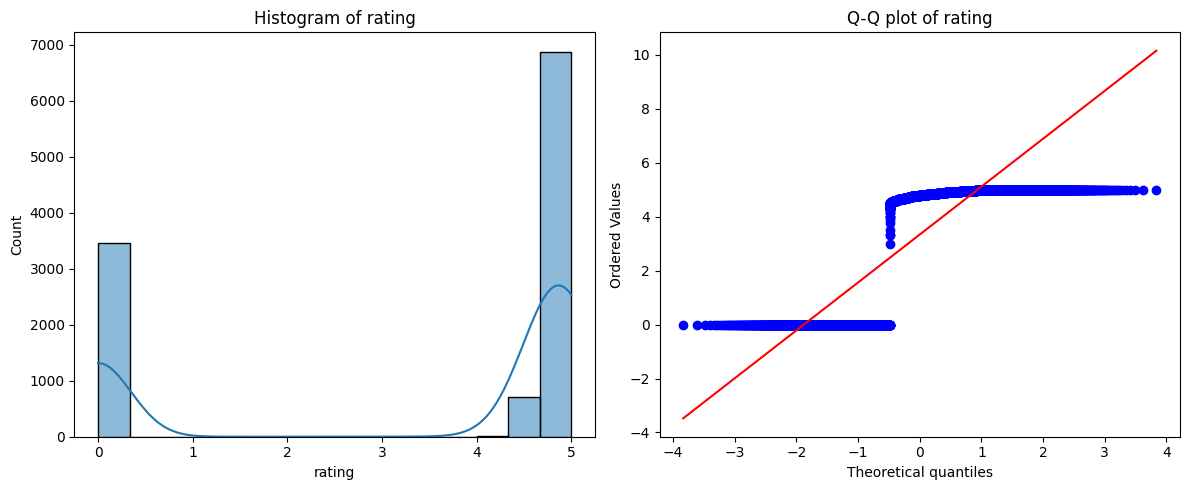

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11079.
  res = hypotest_fun_out(*samples, **kwds)


Column: reviews
Statistics= 0.5784562676283027, p= 4.0569919363746035e-96
Sample does not look Gaussian (reject H0)


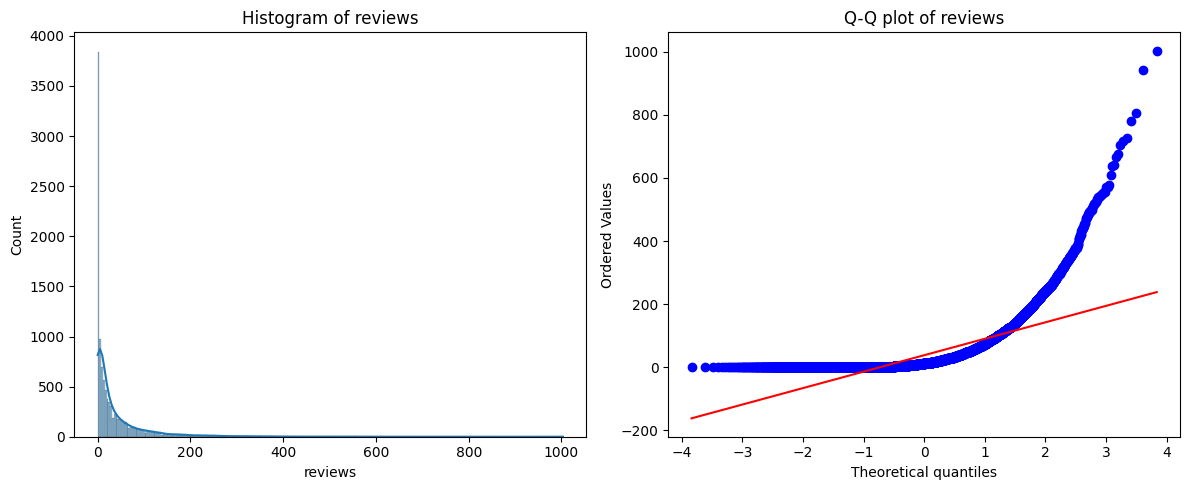

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11079.
  res = hypotest_fun_out(*samples, **kwds)


Column: price
Statistics= 0.27084591600318897, p= 6.929827631794374e-110
Sample does not look Gaussian (reject H0)


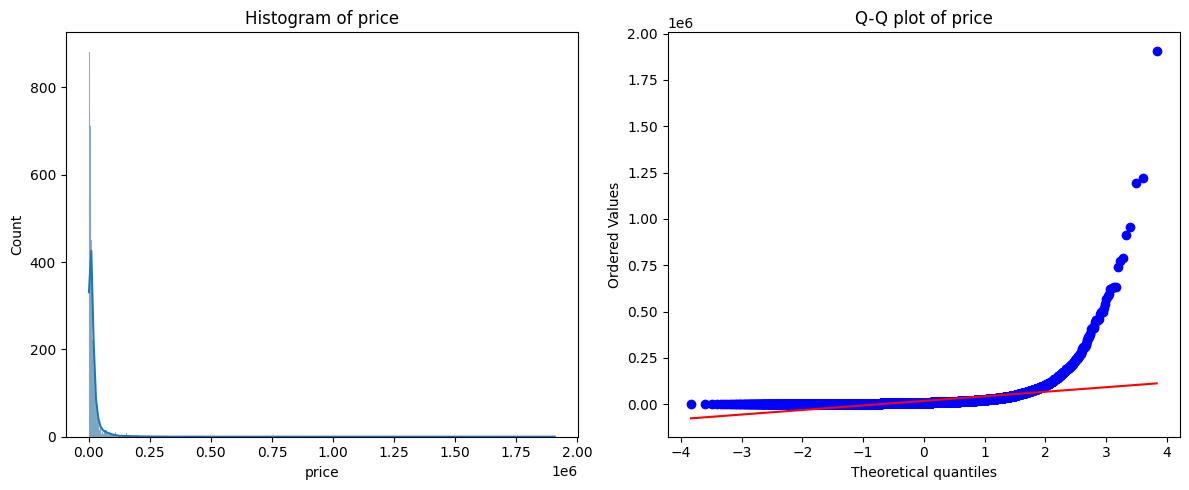

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11079.
  res = hypotest_fun_out(*samples, **kwds)


Column: checkin_minutes
Statistics= 0.855408502743855, p= 6.162213325135993e-72
Sample does not look Gaussian (reject H0)


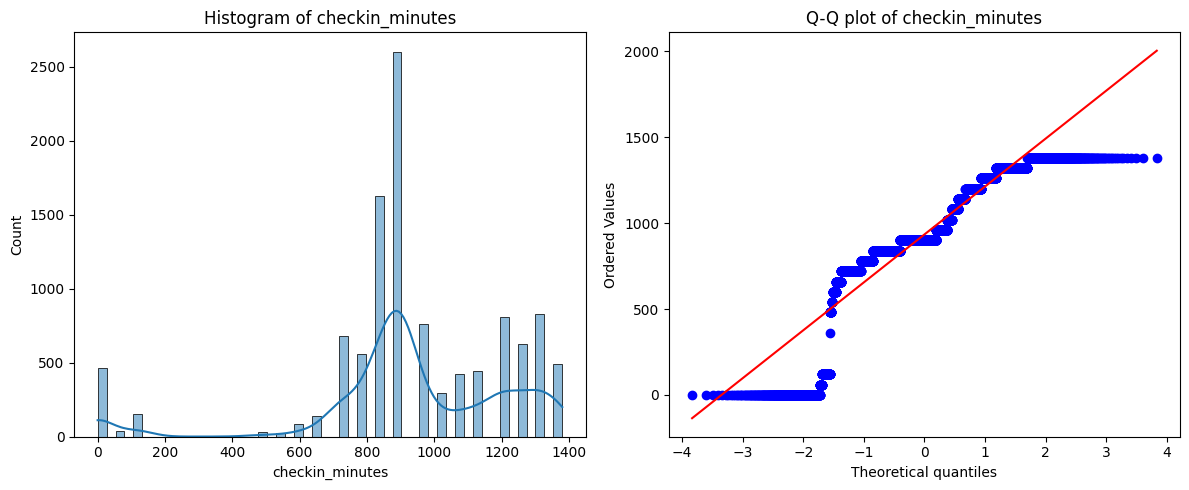

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11079.
  res = hypotest_fun_out(*samples, **kwds)


Column: checkin_minutes_capped
Statistics= 0.9350121560065284, p= 3.3894046994181598e-56
Sample does not look Gaussian (reject H0)


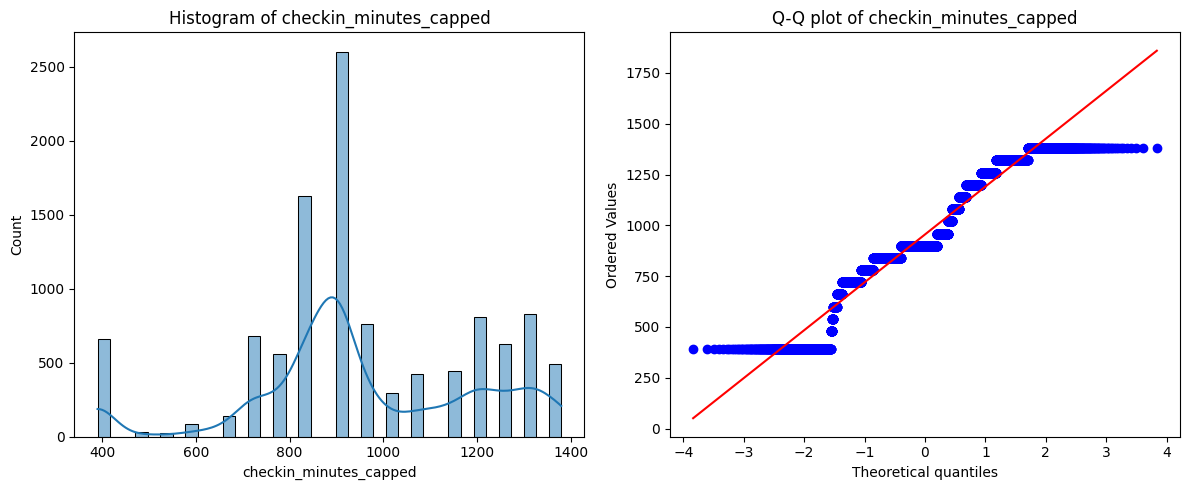

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11079.
  res = hypotest_fun_out(*samples, **kwds)


Column: checkout_minutes
Statistics= 0.6088945948152992, p= 2.6202234320173704e-94
Sample does not look Gaussian (reject H0)


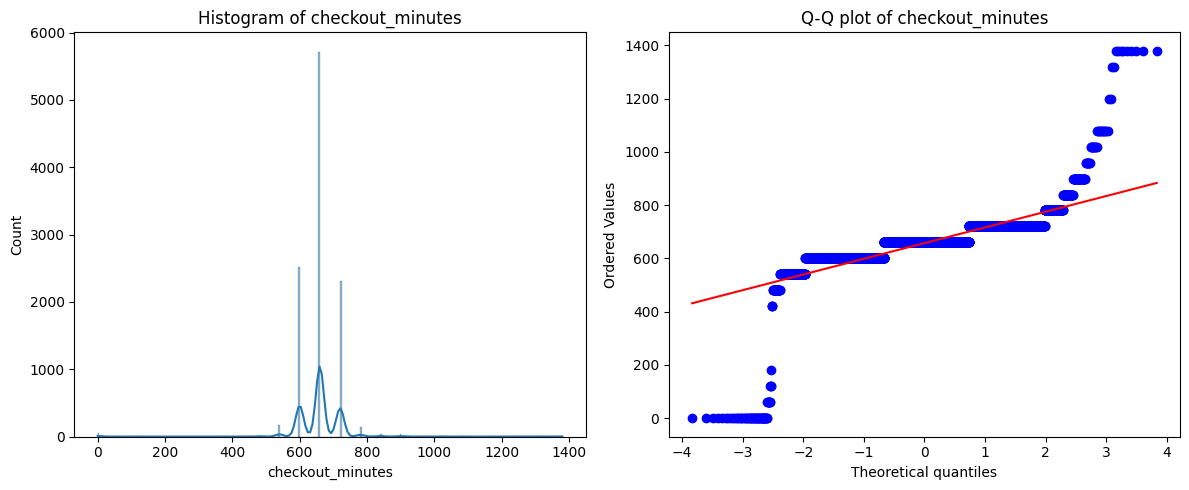

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11079.
  res = hypotest_fun_out(*samples, **kwds)


Column: checkout_minutes_capped
Statistics= 0.8596460190615984, p= 2.575773642160947e-71
Sample does not look Gaussian (reject H0)


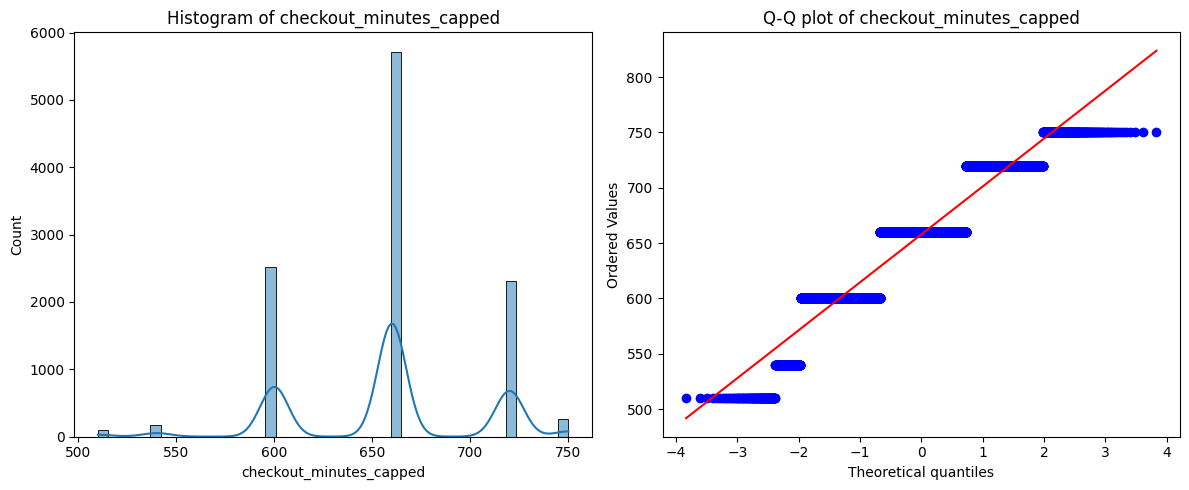

In [51]:
from scipy import stats

# List of columns to check
columns_to_check = [
    'rating', 'reviews', 'price', 'checkin_minutes', 'checkin_minutes_capped',
    'checkout_minutes', 'checkout_minutes_capped'
]

# Function to check Gaussian distribution
def check_gaussian_distribution(df, column_name):
    # Drop NaN values to ensure test validity
    data = df[column_name].dropna()

    # Perform Shapiro-Wilk test
    stat, p = stats.shapiro(data)
    print(f"Column: {column_name}")
    print(f"Statistics= {stat}, p= {p}")
    alpha = 0.05
    if p > alpha:
        print(f"Sample looks Gaussian (fail to reject H0)")
    else:
        print(f"Sample does not look Gaussian (reject H0)")

    # Visualize
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Histogram of {column_name}')
    plt.subplot(1, 2, 2)
    stats.probplot(data, plot=plt)
    plt.title(f'Q-Q plot of {column_name}')
    plt.tight_layout()
    plt.show()

# Apply to each column
for col in columns_to_check:
    if preprocessed_df[col].dtype in ['float64', 'int64']:
        check_gaussian_distribution(preprocessed_df, col)
    else:
        print(f"Column {col} is not numerical.")

# Scaling

In [52]:
print(preprocessed_df.columns)

Index(['id', 'rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios',
       ...
       'country_encoded', 'checkin_capped_encoded', 'name_word_count',
       'host_listing_count', 'city_encoded', 'price_category',
       'price_price_low', 'price_price_reasonable', 'price_price_high',
       'price_price_others'],
      dtype='object', length=995)


In [53]:
preprocessed_df.describe()

id        rating       reviews         price     bathrooms  \
count  1.107900e+04  11079.000000  11079.000000  1.107900e+04  11079.000000   
mean   7.386687e+16      3.339124     38.224840  1.848362e+04      1.869483   
std    1.992176e+17      2.254716     68.552234  4.730003e+04      2.079510   
min    1.313100e+04      0.000000      0.000000  4.620000e+02      0.000000   
25%    2.144279e+07      0.000000      1.000000  4.451000e+03      1.000000   
50%    3.764544e+07      4.790000     12.000000  8.631000e+03      1.000000   
75%    5.004106e+07      4.940000     44.500000  1.676100e+04      2.000000   
max    7.017905e+17      5.000000   1003.000000  1.907963e+06     50.000000   

               beds        guests        toiles      bedrooms       studios  \
count  11079.000000  11079.000000  11079.000000  11079.000000  11079.000000   
mean       3.253904      5.186208      0.019135      2.107320      0.025183   
std        3.828122      3.750150      0.137007      2.274957      0.156687   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        1.000000      2.000000      0.000000      1.000000      0.000000   
50%        2.000000      4.000000      0.000000      1.000000      0.000000   
75%        4.000000      6.000000      0.000000      3.000000      0.000000   
max       60.000000     16.000000      1.000000     50.000000      1.000000   

       ...  hourse_Self check-in with lockbox  \
count  ...                       11079.000000   
mean   ...                           0.126365   
std    ...                           0.332275   
min    ...                           0.000000   
25%    ...                           0.000000   
50%    ...                           0.000000   
75%    ...                           0.000000   
max    ...                           1.000000   

       hourse_Self check-in with smart lock  hourse_Show more  \
count                          11079.000000      11079.000000   
mean                               0.011553          0.500948   
std                                0.106869          0.500022   
min                                0.000000          0.000000   
25%                                0.000000          0.000000   
50%                                0.000000          1.000000   
75%                                0.000000          1.000000   
max                                1.000000          1.000000   

       hourse_Smoking is allowed      hourse_󱤇  country_encoded  \
count               11079.000000  11079.000000     11079.000000   
mean                    0.303638      0.303638       780.925806   
std                     0.459849      0.459849       814.518465   
min                     0.000000      0.000000         1.000000   
25%                     0.000000      0.000000       176.000000   
50%                     0.000000      0.000000       438.000000   
75%                     1.000000      1.000000      1075.000000   
max                     1.000000      1.000000      2272.000000   

       checkin_capped_encoded  name_word_count  host_listing_count  \
count            11079.000000     11079.000000        11079.000000   
mean                 7.499233         6.199567            1.748985   
std                  4.028309         3.099420            1.996045   
min                  0.000000         1.000000            1.000000   
25%                  5.000000         4.000000            1.000000   
50%                  7.000000         6.000000            1.000000   
75%                 10.000000         8.000000            2.000000   
max                 16.000000        39.000000           27.000000   

       city_encoded  
count  11079.000000  
mean      19.967777  
std       38.383969  
min        1.000000  
25%        1.000000  
50%        3.000000  
75%       20.000000  
max      179.000000  

[8 rows x 990 columns]

### Method Selection

In [54]:
robust_scaled_preprocessed_df=preprocessed_df.copy()

In [55]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# List of columns to scale (excluding binary and identifier columns)
columns_to_scale = [
    'rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests', 'bedrooms',
    'checkin_minutes', 'checkin_minutes_capped', 'checkout_minutes',
    'checkout_minutes_capped', 'country_encoded', 'checkin_capped_encoded',
    'name_word_count', 'host_listing_count', 'city_encoded','id'
]

# Initialize robust scaler
robust_scaler = RobustScaler()

# Scale the selected columns
robust_scaled_preprocessed_df[columns_to_scale] = robust_scaler.fit_transform(preprocessed_df[columns_to_scale])

In [56]:
robust_scaled_preprocessed_df.head()

id    rating   reviews     price  bathrooms      beds  guests  \
1  0.463186 -0.969636 -0.275862 -0.322177        1.0  0.000000     0.0   
2  0.456451  0.012146  1.287356 -0.214460        0.0  0.333333     0.0   
3  0.427507  0.042510  0.022989  0.219984        0.0  0.000000     0.0   
4  0.475569 -0.969636 -0.275862 -0.159058        0.0 -0.333333    -0.5   
5  0.384825 -0.969636 -0.275862  0.495370        0.0  0.000000    -0.5   

   toiles  bedrooms  studios  ...  country_encoded  checkin_capped_encoded  \
1       0       0.5        0  ...         0.008899                    -0.6   
2       0       0.0        0  ...        -0.120133                    -1.4   
3       0       0.0        0  ...         0.008899                    -0.2   
4       0       0.0        0  ...         0.008899                    -0.2   
5       0       0.0        0  ...         0.008899                    -0.2   

   name_word_count  host_listing_count  city_encoded    price_category  \
1             0.75                 6.0      2.684211  price_reasonable   
2            -1.00                 0.0     -0.105263  price_reasonable   
3            -0.75                 0.0      4.578947  price_reasonable   
4            -0.75                 0.0      4.578947  price_reasonable   
5            -0.50                 1.0      4.578947  price_reasonable   

   price_price_low  price_price_reasonable  price_price_high  \
1            False                    True             False   
2            False                    True             False   
3            False                    True             False   
4            False                    True             False   
5            False                    True             False   

   price_price_others  
1               False  
2               False  
3               False  
4               False  
5               False  

[5 rows x 995 columns]

In [57]:
robust_scaled_preprocessed_df.describe()

id        rating       reviews         price     bathrooms  \
count  1.107900e+04  11079.000000  11079.000000  11079.000000  11079.000000   
mean   2.582913e+09     -0.293700      0.602870      0.800375      0.869483   
std    6.966069e+09      0.456420      1.575913      3.842407      2.079510   
min   -1.315894e+00     -0.969636     -0.275862     -0.663607     -1.000000   
25%   -5.665606e-01     -0.969636     -0.252874     -0.339561      0.000000   
50%    0.000000e+00      0.000000      0.000000      0.000000      0.000000   
75%    4.334394e-01      0.030364      0.747126      0.660439      1.000000   
max    2.453960e+10      0.042510     22.781609    154.291795     49.000000   

               beds        guests        toiles      bedrooms       studios  \
count  11079.000000  11079.000000  11079.000000  11079.000000  11079.000000   
mean       0.417968      0.296552      0.019135      0.553660      0.025183   
std        1.276041      0.937538      0.137007      1.137478      0.156687   
min       -0.666667     -0.750000      0.000000     -0.500000      0.000000   
25%       -0.333333     -0.500000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.666667      0.500000      0.000000      1.000000      0.000000   
max       19.333333      3.000000      1.000000     24.500000      1.000000   

       ...  hourse_Self check-in with lockbox  \
count  ...                       11079.000000   
mean   ...                           0.126365   
std    ...                           0.332275   
min    ...                           0.000000   
25%    ...                           0.000000   
50%    ...                           0.000000   
75%    ...                           0.000000   
max    ...                           1.000000   

       hourse_Self check-in with smart lock  hourse_Show more  \
count                          11079.000000      11079.000000   
mean                               0.011553          0.500948   
std                                0.106869          0.500022   
min                                0.000000          0.000000   
25%                                0.000000          0.000000   
50%                                0.000000          1.000000   
75%                                0.000000          1.000000   
max                                1.000000          1.000000   

       hourse_Smoking is allowed      hourse_󱤇  country_encoded  \
count               11079.000000  11079.000000     11079.000000   
mean                    0.303638      0.303638         0.381453   
std                     0.459849      0.459849         0.906027   
min                     0.000000      0.000000        -0.486096   
25%                     0.000000      0.000000        -0.291435   
50%                     0.000000      0.000000         0.000000   
75%                     1.000000      1.000000         0.708565   
max                     1.000000      1.000000         2.040044   

       checkin_capped_encoded  name_word_count  host_listing_count  \
count            11079.000000     11079.000000        11079.000000   
mean                 0.099847         0.049892            0.748985   
std                  0.805662         0.774855            1.996045   
min                 -1.400000        -1.250000            0.000000   
25%                 -0.400000        -0.500000            0.000000   
50%                  0.000000         0.000000            0.000000   
75%                  0.600000         0.500000            1.000000   
max                  1.800000         8.250000           26.000000   

       city_encoded  
count  11079.000000  
mean       0.893041  
std        2.020209  
min       -0.105263  
25%       -0.105263  
50%        0.000000  
75%        0.894737  
max        9.263158  

[8 rows x 990 columns]

In [58]:
standardscaler_scaled_preprocessed_df=preprocessed_df.copy()

In [59]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# List of columns to scale (excluding binary and identifier columns)
columns_to_scale = [
    'rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests', 'bedrooms',
    'checkin_minutes', 'checkin_minutes_capped', 'checkout_minutes',
    'checkout_minutes_capped', 'country_encoded', 'checkin_capped_encoded',
    'name_word_count', 'host_listing_count', 'city_encoded', 'id'
]

# Initialize scaler
scaler = StandardScaler()

# Scale the selected columns
standardscaler_scaled_preprocessed_df[columns_to_scale] = scaler.fit_transform(preprocessed_df[columns_to_scale])

In [60]:
standardscaler_scaled_preprocessed_df.head()

id    rating   reviews     price  bathrooms      beds    guests  \
1 -0.370802 -1.481018 -0.557627 -0.292161   0.062766 -0.327565 -0.316324   
2 -0.370802  0.670126  0.434362 -0.264126  -0.418138 -0.066329 -0.316324   
3 -0.370802  0.736657 -0.367982 -0.151056  -0.418138 -0.327565 -0.316324   
4 -0.370802 -1.481018 -0.557627 -0.249707  -0.418138 -0.588802 -0.849660   
5 -0.370802 -1.481018 -0.557627 -0.079382  -0.418138 -0.327565 -0.849660   

   toiles  bedrooms  studios  ...  country_encoded  checkin_capped_encoded  \
1       0 -0.047177        0  ...        -0.411213               -0.868700   
2       0 -0.486765        0  ...        -0.553635               -1.861717   
3       0 -0.486765        0  ...        -0.411213               -0.372191   
4       0 -0.486765        0  ...        -0.411213               -0.372191   
5       0 -0.486765        0  ...        -0.411213               -0.372191   

   name_word_count  host_listing_count  city_encoded    price_category  \
1         0.903575            2.630828      0.886666  price_reasonable   
2        -1.355014           -0.375251     -0.494181  price_reasonable   
3        -1.032358           -0.375251      1.824600  price_reasonable   
4        -1.032358           -0.375251      1.824600  price_reasonable   
5        -0.709702            0.125762      1.824600  price_reasonable   

   price_price_low  price_price_reasonable  price_price_high  \
1            False                    True             False   
2            False                    True             False   
3            False                    True             False   
4            False                    True             False   
5            False                    True             False   

   price_price_others  
1               False  
2               False  
3               False  
4               False  
5               False  

[5 rows x 995 columns]

In [61]:
standardscaler_scaled_preprocessed_df.describe()

id        rating       reviews         price     bathrooms  \
count  1.107900e+04  1.107900e+04  1.107900e+04  1.107900e+04  11079.000000   
mean  -1.827825e-17 -6.798225e-17  2.308831e-17 -2.052294e-17      0.000000   
std    1.000045e+00  1.000045e+00  1.000045e+00  1.000045e+00      1.000045   
min   -3.708016e-01 -1.481018e+00 -5.576268e-01 -3.810237e-01     -0.899042   
25%   -3.708016e-01 -1.481018e+00 -5.430388e-01 -2.966859e-01     -0.418138   
50%   -3.708016e-01  6.435142e-01 -3.825699e-01 -2.083099e-01     -0.418138   
75%   -3.708016e-01  7.100444e-01  9.154251e-02 -3.642059e-02      0.062766   
max    3.152091e+00  7.366565e-01  1.407421e+01  3.994849e+01     23.146171   

               beds        guests        toiles      bedrooms       studios  \
count  1.107900e+04  1.107900e+04  11079.000000  1.107900e+04  11079.000000   
mean  -6.156883e-17  1.641835e-16      0.019135  1.026147e-17      0.025183   
std    1.000045e+00  1.000045e+00      0.137007  1.000045e+00      0.156687   
min   -8.500383e-01 -1.116328e+00      0.000000 -9.263540e-01      0.000000   
25%   -5.888019e-01 -8.496598e-01      0.000000 -4.867653e-01      0.000000   
50%   -3.275654e-01 -3.163238e-01      0.000000 -4.867653e-01      0.000000   
75%    1.949075e-01  2.170123e-01      0.000000  3.924119e-01      0.000000   
max    1.482415e+01  2.883692e+00      1.000000  2.105308e+01      1.000000   

       ...  hourse_Self check-in with lockbox  \
count  ...                       11079.000000   
mean   ...                           0.126365   
std    ...                           0.332275   
min    ...                           0.000000   
25%    ...                           0.000000   
50%    ...                           0.000000   
75%    ...                           0.000000   
max    ...                           1.000000   

       hourse_Self check-in with smart lock  hourse_Show more  \
count                          11079.000000      11079.000000   
mean                               0.011553          0.500948   
std                                0.106869          0.500022   
min                                0.000000          0.000000   
25%                                0.000000          0.000000   
50%                                0.000000          1.000000   
75%                                0.000000          1.000000   
max                                1.000000          1.000000   

       hourse_Smoking is allowed      hourse_󱤇  country_encoded  \
count               11079.000000  11079.000000     1.107900e+04   
mean                    0.303638      0.303638    -1.667489e-17   
std                     0.459849      0.459849     1.000045e+00   
min                     0.000000      0.000000    -9.575731e-01   
25%                     0.000000      0.000000    -7.427126e-01   
50%                     0.000000      0.000000    -4.210356e-01   
75%                     1.000000      1.000000     3.610568e-01   
max                     1.000000      1.000000     1.830703e+00   

       checkin_capped_encoded  name_word_count  host_listing_count  \
count            1.107900e+04     1.107900e+04        1.107900e+04   
mean             2.052294e-17     8.722250e-17        2.308831e-17   
std              1.000045e+00     1.000045e+00        1.000045e+00   
min             -1.861717e+00    -1.677669e+00       -3.752512e-01   
25%             -6.204453e-01    -7.097024e-01       -3.752512e-01   
50%             -1.239367e-01    -6.439132e-02       -3.752512e-01   
75%              6.208263e-01     5.809198e-01        1.257621e-01   
max              2.110352e+00     1.058324e+01        1.265109e+01   

       city_encoded  
count  1.107900e+04  
mean  -1.026147e-17  
std    1.000045e+00  
min   -4.941811e-01  
25%   -4.941811e-01  
50%   -4.420737e-01  
75%    8.395322e-04  
max    4.143381e+00  

[8 rows x 990 columns]

In [62]:
min_max_scaled_preprocessed_df=preprocessed_df.copy()

In [63]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

columns_to_scale = ['rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests', 'bedrooms',
                    'checkin_minutes', 'checkin_minutes_capped', 'checkout_minutes',
                    'checkout_minutes_capped', 'country_encoded', 'checkin_capped_encoded',
                    'name_word_count', 'host_listing_count', 'city_encoded', 'id']

minmax_scaler = MinMaxScaler()
min_max_scaled_preprocessed_df[columns_to_scale] = minmax_scaler.fit_transform(preprocessed_df[columns_to_scale])

In [64]:
min_max_scaled_preprocessed_df.head()

id  rating   reviews     price  bathrooms      beds    guests  \
1  7.249833e-11    0.00  0.000000  0.002203       0.04  0.033333  0.200000   
2  7.222389e-11    0.97  0.067797  0.002899       0.02  0.050000  0.200000   
3  7.104441e-11    1.00  0.012961  0.005702       0.02  0.033333  0.200000   
4  7.300292e-11    0.00  0.000000  0.003256       0.02  0.016667  0.066667   
5  6.930507e-11    0.00  0.000000  0.007479       0.02  0.033333  0.066667   

   toiles  bedrooms  studios  ...  country_encoded  checkin_capped_encoded  \
1       0      0.04        0  ...         0.195949                   0.250   
2       0      0.02        0  ...         0.144870                   0.000   
3       0      0.02        0  ...         0.195949                   0.375   
4       0      0.02        0  ...         0.195949                   0.375   
5       0      0.02        0  ...         0.195949                   0.375   

   name_word_count  host_listing_count  city_encoded    price_category  \
1         0.210526            0.230769      0.297753  price_reasonable   
2         0.026316            0.000000      0.000000  price_reasonable   
3         0.052632            0.000000      0.500000  price_reasonable   
4         0.052632            0.000000      0.500000  price_reasonable   
5         0.078947            0.038462      0.500000  price_reasonable   

   price_price_low  price_price_reasonable  price_price_high  \
1            False                    True             False   
2            False                    True             False   
3            False                    True             False   
4            False                    True             False   
5            False                    True             False   

   price_price_others  
1               False  
2               False  
3               False  
4               False  
5               False  

[5 rows x 995 columns]

In [65]:
min_max_scaled_preprocessed_df.describe()

id        rating       reviews         price    bathrooms  \
count  1.107900e+04  11079.000000  11079.000000  11079.000000  11079.00000   
mean   1.052549e-01      0.667825      0.038111      0.009448      0.03739   
std    2.838705e-01      0.450943      0.068347      0.024797      0.04159   
min    0.000000e+00      0.000000      0.000000      0.000000      0.00000   
25%    3.053569e-11      0.000000      0.000997      0.002091      0.02000   
50%    5.362329e-11      0.958000      0.011964      0.004283      0.02000   
75%    7.128614e-11      0.988000      0.044367      0.008545      0.04000   
max    1.000000e+00      1.000000      1.000000      1.000000      1.00000   

               beds        guests        toiles      bedrooms       studios  \
count  11079.000000  11079.000000  11079.000000  11079.000000  11079.000000   
mean       0.054232      0.279081      0.019135      0.042146      0.025183   
std        0.063802      0.250010      0.137007      0.045499      0.156687   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.016667      0.066667      0.000000      0.020000      0.000000   
50%        0.033333      0.200000      0.000000      0.020000      0.000000   
75%        0.066667      0.333333      0.000000      0.060000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...  hourse_Self check-in with lockbox  \
count  ...                       11079.000000   
mean   ...                           0.126365   
std    ...                           0.332275   
min    ...                           0.000000   
25%    ...                           0.000000   
50%    ...                           0.000000   
75%    ...                           0.000000   
max    ...                           1.000000   

       hourse_Self check-in with smart lock  hourse_Show more  \
count                          11079.000000      11079.000000   
mean                               0.011553          0.500948   
std                                0.106869          0.500022   
min                                0.000000          0.000000   
25%                                0.000000          0.000000   
50%                                0.000000          1.000000   
75%                                0.000000          1.000000   
max                                1.000000          1.000000   

       hourse_Smoking is allowed      hourse_󱤇  country_encoded  \
count               11079.000000  11079.000000     11079.000000   
mean                    0.303638      0.303638         0.343428   
std                     0.459849      0.459849         0.358661   
min                     0.000000      0.000000         0.000000   
25%                     0.000000      0.000000         0.077059   
50%                     0.000000      0.000000         0.192426   
75%                     1.000000      1.000000         0.472919   
max                     1.000000      1.000000         1.000000   

       checkin_capped_encoded  name_word_count  host_listing_count  \
count            11079.000000     11079.000000        11079.000000   
mean                 0.468702         0.136831            0.028807   
std                  0.251769         0.081564            0.076771   
min                  0.000000         0.000000            0.000000   
25%                  0.312500         0.078947            0.000000   
50%                  0.437500         0.131579            0.000000   
75%                  0.625000         0.184211            0.038462   
max                  1.000000         1.000000            1.000000   

       city_encoded  
count  11079.000000  
mean       0.106561  
std        0.215640  
min        0.000000  
25%        0.000000  
50%        0.011236  
75%        0.106742  
max        1.000000  

[8 rows x 990 columns]

### final overview

| Column                  | Type      | Range (Min, Max)       | Binary? | Current Scaling | Recommended Scaling | Rationale                                      |
|-------------------------|-----------|------------------------|---------|-----------------|---------------------|------------------------------------------------|
| rating                 | float64   | (0, 5)                 | No      | Min-Max         | Robust              | Continuous, outliers possible, robust handles well. |
| reviews                | int64     | (0, 1003)              | No      | Min-Max         | Robust              | Discrete but wide range, potential outliers.   |
| price                  | int64     | (462, 1,907,963)       | No      | Min-Max         | Robust              | Large range, clear outliers, robust preferred. |
| bathrooms              | int64     | (0, 50)                | No      | Min-Max         | Robust              | Discrete, but range varies, robust for consistency. |
| beds                   | int64     | (0, 60)                | No      | Min-Max         | Robust              | Discrete, robust for consistency, outliers possible. |
| guests                 | int64     | (1, 16)                | No      | Min-Max         | Robust              | Small range, robust for consistency.        |
| toiles                 | int64     | (0, 1)                 | Yes     | No Scale        | No Scale            | Binary, no scaling needed.                     |
| bedrooms               | int64     | (0, 50)                | No      | Min-Max         | Robust              | Discrete, robust for consistency, outliers possible. |
| studios                | int64     | (0, 1)                 | Yes     | No Scale        | No Scale            | Binary, no scaling needed.                     |
| checkin_minutes        | float64   | (0, 1380)              | No      | Min-Max         | Robust              | Continuous, outliers possible, robust preferred. |
| checkin_minutes_capped | float64   | (390, 1380)            | No      | Min-Max         | Robust              | Continuous, outliers possible, robust preferred. |
| checkout_minutes       | float64   | (0, 1380)              | No      | Min-Max         | Robust              | Continuous, outliers possible, robust preferred. |
| checkout_minutes_capped| float64   | (510, 720)             | No      | Min-Max         | Robust              | Continuous, outliers possible, robust preferred. |
| country_encoded        | float64   | (1, 2272)              | No      | Min-Max         | Robust              | Frequency encoded, large range, outliers, robust preferred. |
| checkin_capped_encode  | int64     | (0, 17)                | No      | Min-Max         | Robust              | Label encoded, small range, robust for consistency. |
| name_word_count        | int64     | (1, 39)                | No      | Min-Max         | Robust              | Discrete, robust for consistency, outliers possible. |
| host_listing_count     | int64     | (1, 27)                | No      | Min-Max         | Robust              | Discrete, robust for consistency, outliers possible. |
| city_encoded           | int64     | (1, 1509)              | No      | Min-Max         | Robust              | Frequency encoded, needs scaling, robust preferred. |

In [66]:
preprocessed_df = robust_scaled_preprocessed_df.copy()

In [67]:
# Display the scaled DataFrame
preprocessed_df.head()

id    rating   reviews     price  bathrooms      beds  guests  \
1  0.463186 -0.969636 -0.275862 -0.322177        1.0  0.000000     0.0   
2  0.456451  0.012146  1.287356 -0.214460        0.0  0.333333     0.0   
3  0.427507  0.042510  0.022989  0.219984        0.0  0.000000     0.0   
4  0.475569 -0.969636 -0.275862 -0.159058        0.0 -0.333333    -0.5   
5  0.384825 -0.969636 -0.275862  0.495370        0.0  0.000000    -0.5   

   toiles  bedrooms  studios  ...  country_encoded  checkin_capped_encoded  \
1       0       0.5        0  ...         0.008899                    -0.6   
2       0       0.0        0  ...        -0.120133                    -1.4   
3       0       0.0        0  ...         0.008899                    -0.2   
4       0       0.0        0  ...         0.008899                    -0.2   
5       0       0.0        0  ...         0.008899                    -0.2   

   name_word_count  host_listing_count  city_encoded    price_category  \
1             0.75                 6.0      2.684211  price_reasonable   
2            -1.00                 0.0     -0.105263  price_reasonable   
3            -0.75                 0.0      4.578947  price_reasonable   
4            -0.75                 0.0      4.578947  price_reasonable   
5            -0.50                 1.0      4.578947  price_reasonable   

   price_price_low  price_price_reasonable  price_price_high  \
1            False                    True             False   
2            False                    True             False   
3            False                    True             False   
4            False                    True             False   
5            False                    True             False   

   price_price_others  
1               False  
2               False  
3               False  
4               False  
5               False  

[5 rows x 995 columns]

# Load scaled data

In [68]:
scaled_df = preprocessed_df.copy()

# EDA (Relations)

In [69]:
scaled_df.shape

(11079, 995)

In [70]:
print(scaled_df.columns)

Index(['id', 'rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios',
       ...
       'country_encoded', 'checkin_capped_encoded', 'name_word_count',
       'host_listing_count', 'city_encoded', 'price_category',
       'price_price_low', 'price_price_reasonable', 'price_price_high',
       'price_price_others'],
      dtype='object', length=995)


All Columns in DataFrame:
['id', 'rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios', 'checkin_minutes', 'checkin_minutes_capped', 'checkout_minutes', 'checkout_minutes_capped', 'amenity_100" HDTV with Amazon Prime Video', 'amenity_100" TV', 'amenity_100" TV with Chromecast', 'amenity_100" TV with Netflix', 'amenity_101" HDTV with HBO Max', 'amenity_108" HDTV with standard cable/satellite', 'amenity_12" TV with Amazon Prime Video', 'amenity_12" TV with standard cable/satellite', 'amenity_12v cool box refrigerator', 'amenity_14" HDTV with cable/satellite TV', 'amenity_14" TV', 'amenity_15" TV', 'amenity_15" TV with standard cable/satellite', 'amenity_16" TV', 'amenity_17" TV', 'amenity_17" TV with standard cable/satellite', 'amenity_18" TV with standard cable/satellite', 'amenity_19" HDTV', 'amenity_19" HDTV with Amazon Prime Video', 'amenity_19" HDTV with standard cable/satellite', 'amenity_19" TV', 'amenity_2" TV with standard cable/satellite',

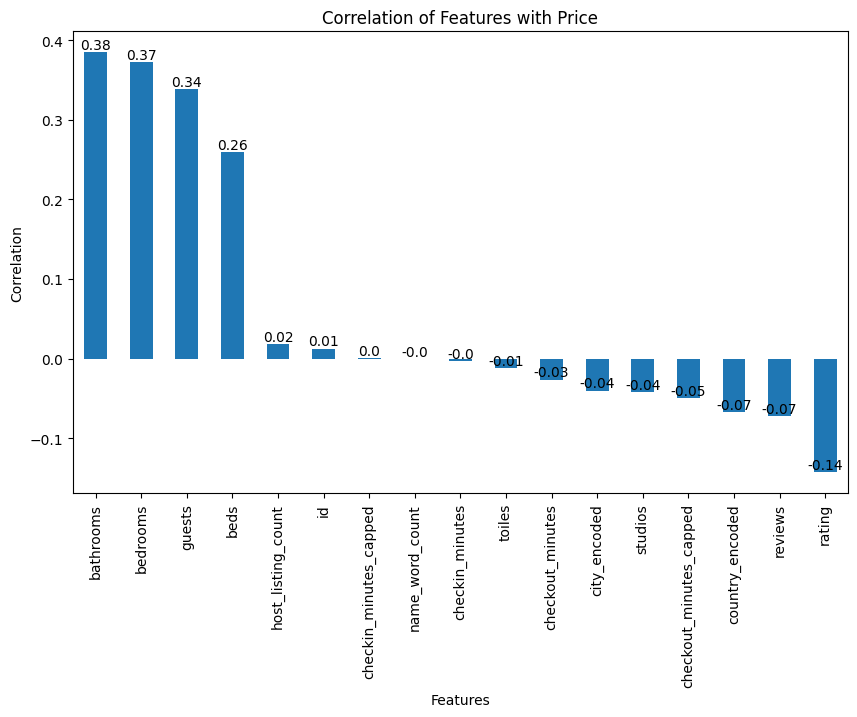

In [71]:
df = scaled_df.copy()

# List all columns
print("All Columns in DataFrame:")
print(df.columns.tolist())
print(f"\nTotal Number of Columns: {len(df.columns)}")

# Define numerical columns, including 'price'
numerical_cols = [
    'id', 'rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests', 'toiles',
    'bedrooms', 'studios', 'checkin_minutes', 'checkin_minutes_capped',
    'checkout_minutes', 'checkout_minutes_capped', 'country_encoded',
    'name_word_count', 'host_listing_count', 'city_encoded'
]

# Compute correlation matrix
corr_matrix = scaled_df[numerical_cols].corr()

# Extract correlations with 'price'
price_corr = corr_matrix['price'].drop('price')  # Remove self-correlation

# Sort by correlation value
price_corr_sorted = price_corr.sort_values(ascending=False)

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = price_corr_sorted.plot(kind='bar', ax=ax)
plt.title('Correlation of Features with Price')
plt.ylabel('Correlation')
plt.xlabel('Features')

# Add correlation values on top of bars
for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            round(bar.get_height(), 2), ha='center', va='bottom')

plt.show()

## Pairplots

In [72]:
scaled_df_price = scaled_df.copy()

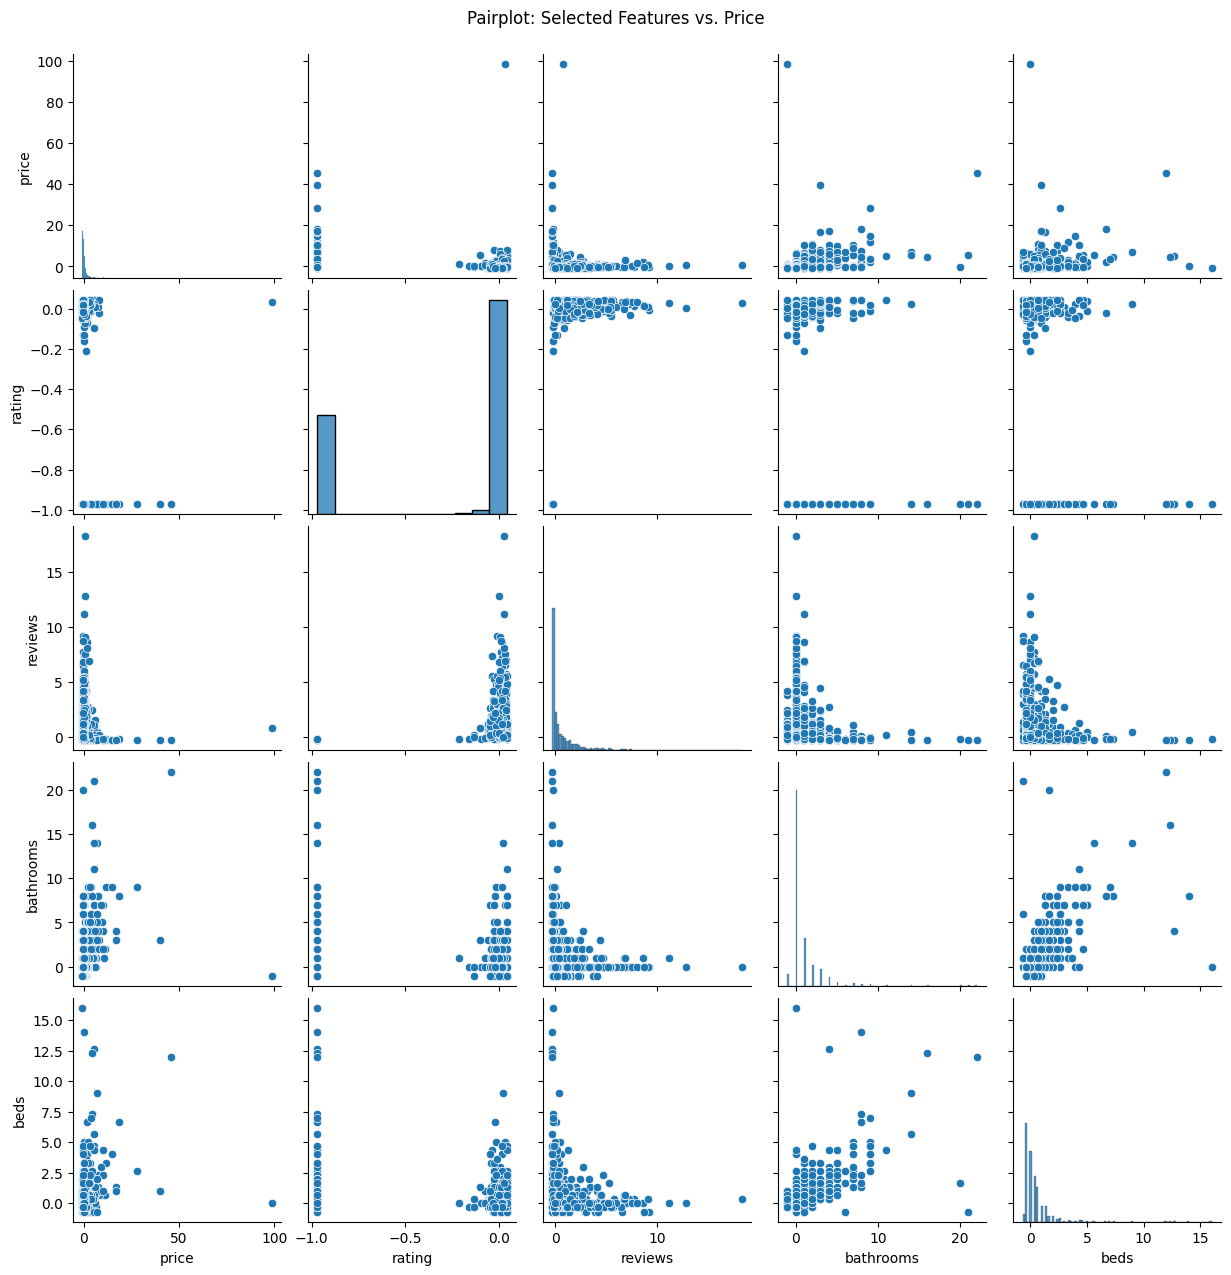

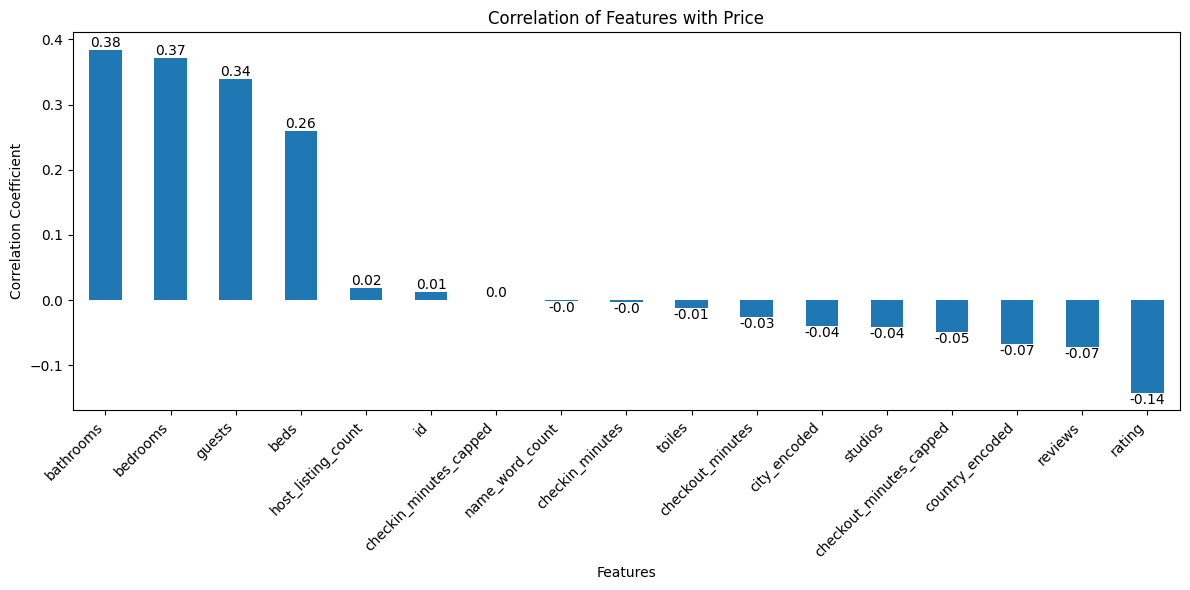

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define numerical columns
numerical_cols = [
    'id', 'rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests', 'toiles',
    'bedrooms', 'studios', 'checkin_minutes', 'checkin_minutes_capped',
    'checkout_minutes', 'checkout_minutes_capped', 'country_encoded',
    'name_word_count', 'host_listing_count', 'city_encoded'
]

# Select a subset of columns for pairplot (e.g., 5 key columns)
pairplot_cols = ['price', 'rating', 'reviews', 'bathrooms', 'beds']

# Sample the data (e.g., 1000 rows) to reduce memory usage
sample_data = scaled_df_price.sample(n=1000, random_state=42)

# Create pairplot with scatterplots only (no regression lines)
sns.pairplot(sample_data[pairplot_cols], kind='scatter')
plt.suptitle("Pairplot: Selected Features vs. Price", y=1.02)
plt.show()

# Compute correlation matrix for all numerical features
corr_matrix = scaled_df_price[numerical_cols].corr()

# Extract correlations with 'price'
price_corr = corr_matrix['price'].drop('price')  # Remove self-correlation

# Sort by absolute correlation value
price_corr_sorted = price_corr.sort_values(ascending=False)

# Plot bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = price_corr_sorted.plot(kind='bar', ax=ax)
plt.title('Correlation of Features with Price')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')

# Add correlation values on top of bars
for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            round(bar.get_height(), 2), ha='center', va='bottom' if bar.get_height() >= 0 else 'top')

plt.tight_layout()
plt.show()

## Scatter plot

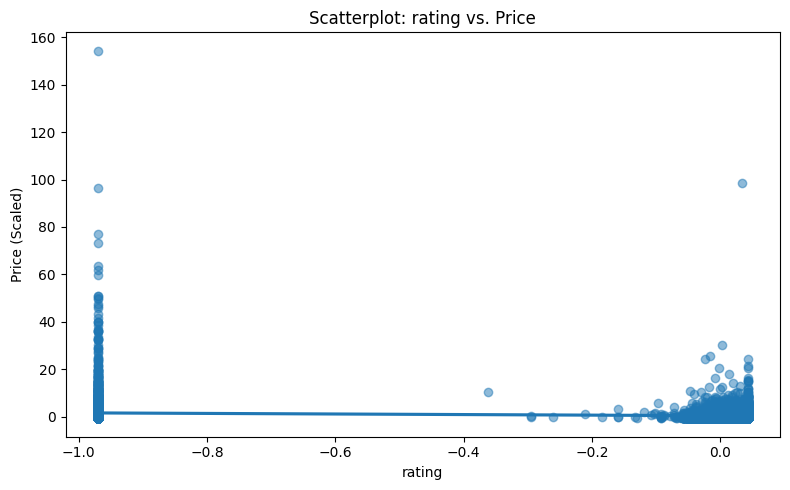

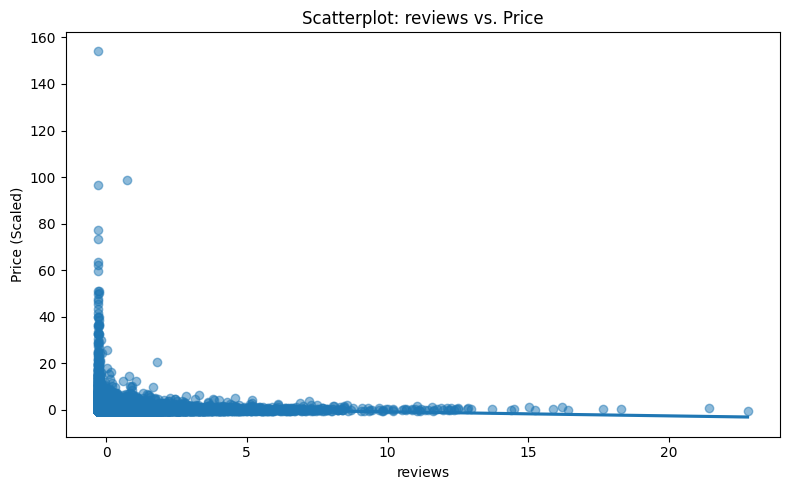

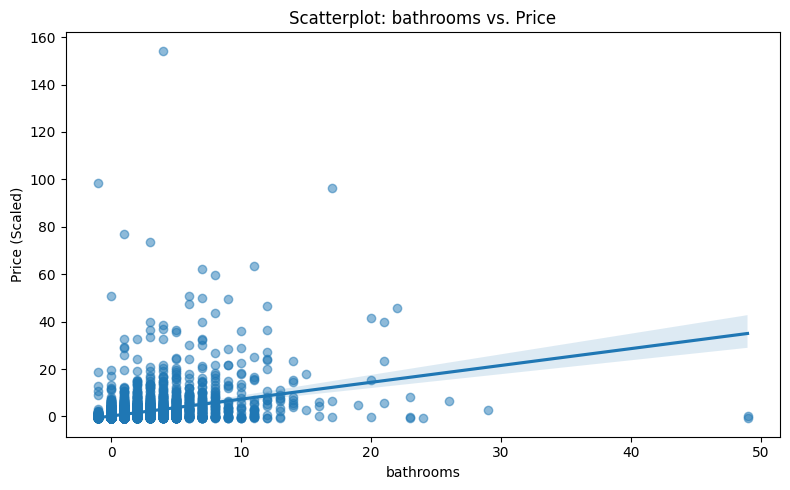

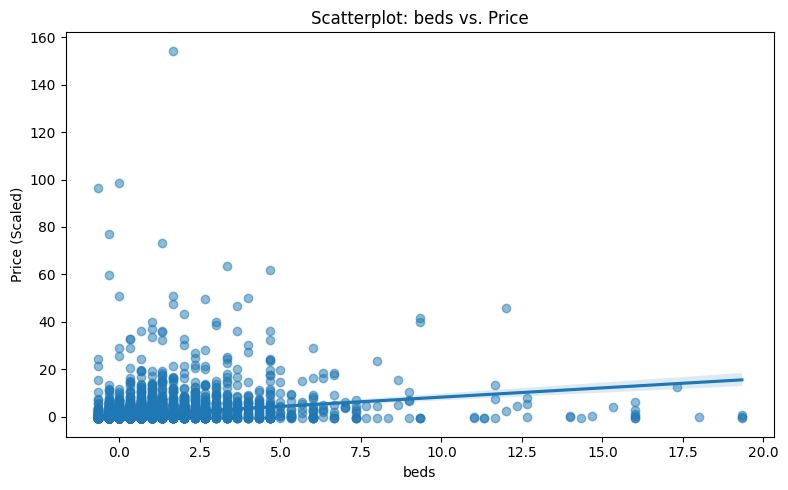

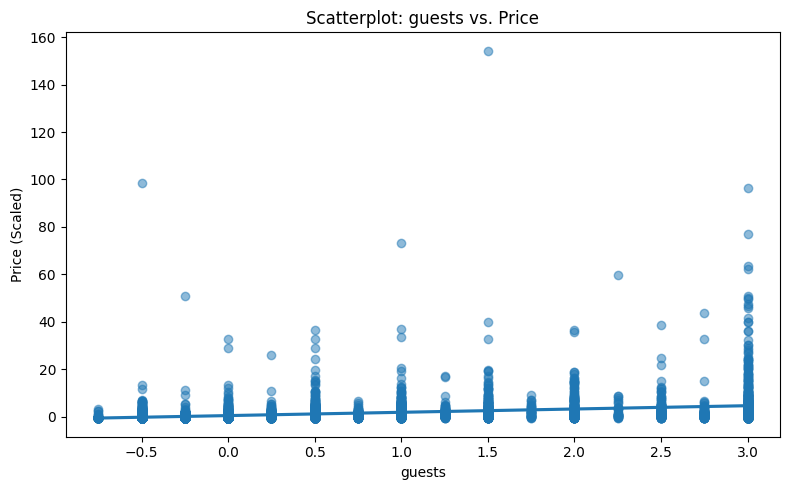

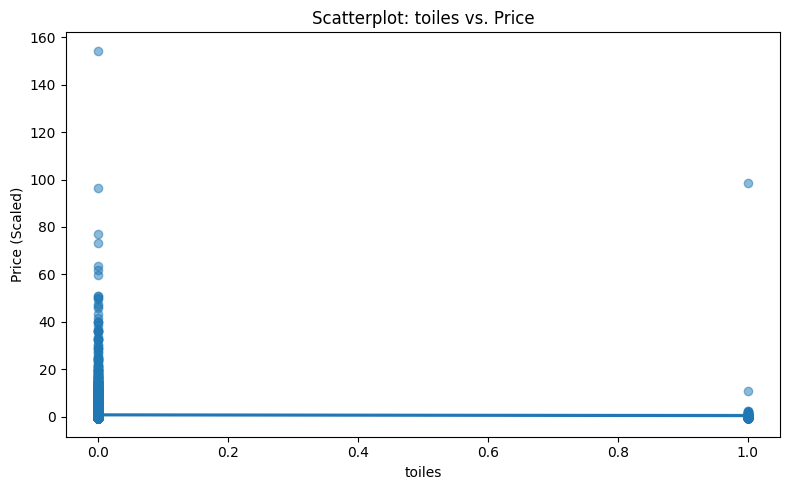

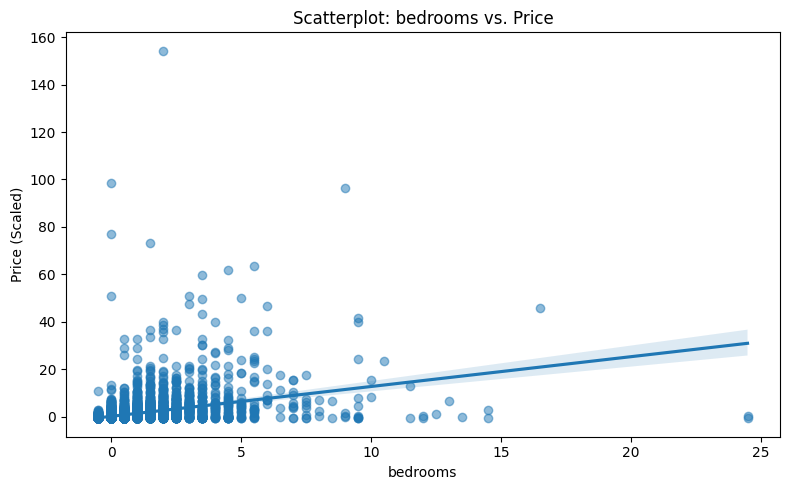

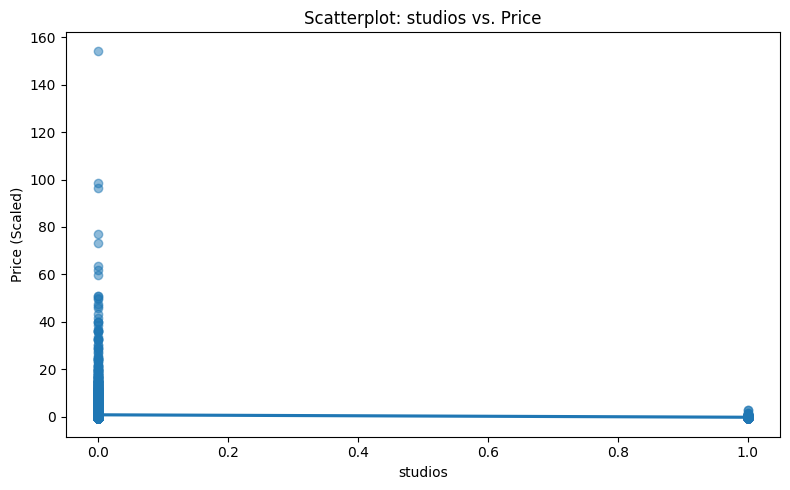

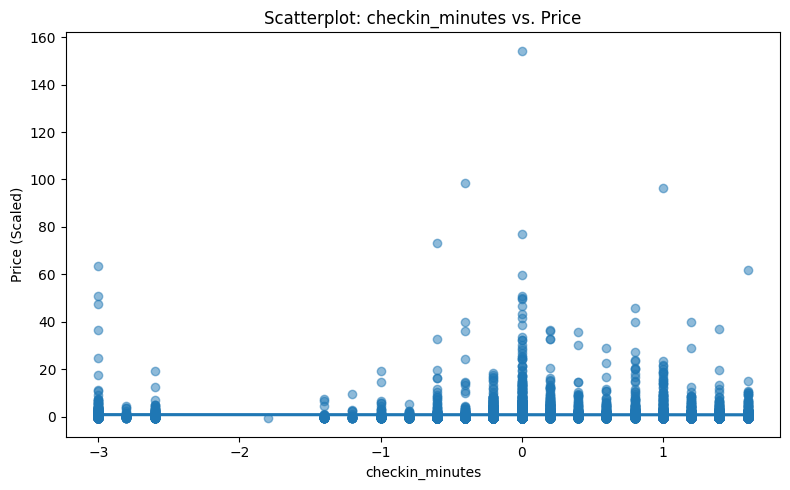

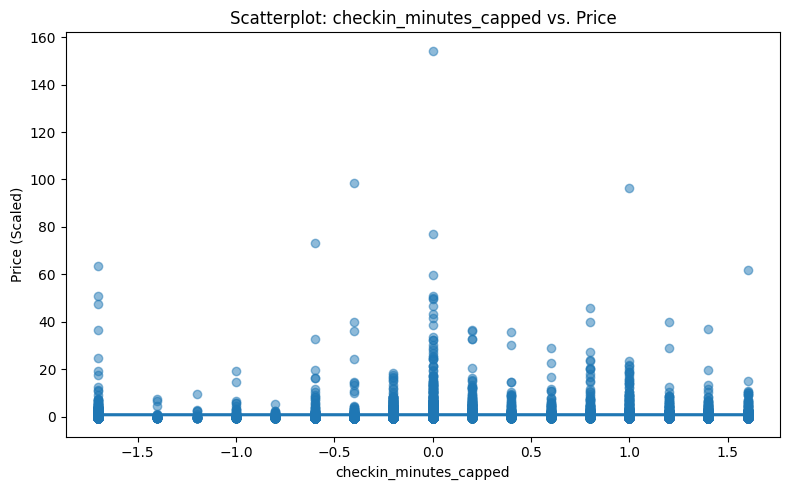

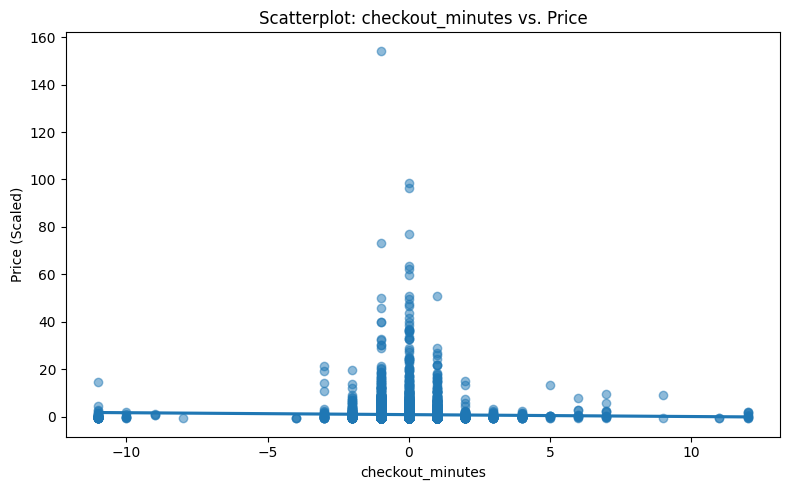

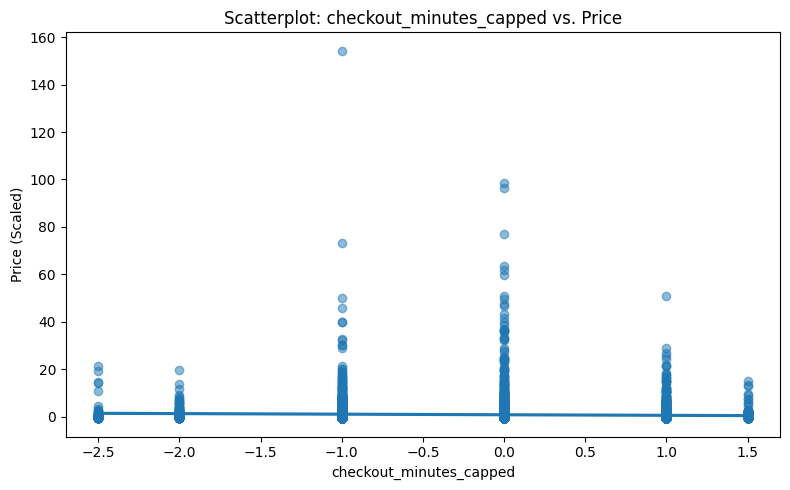

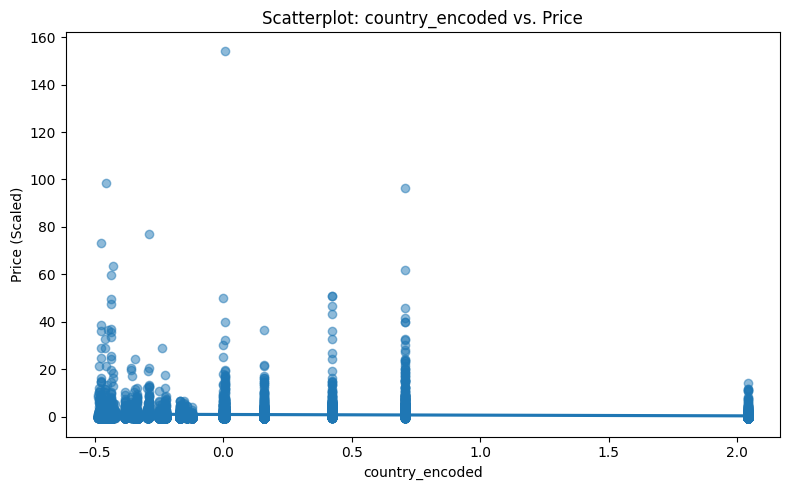

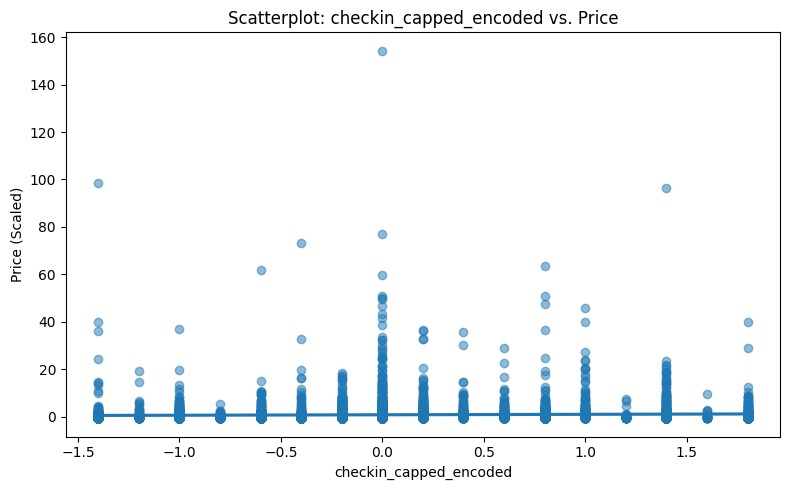

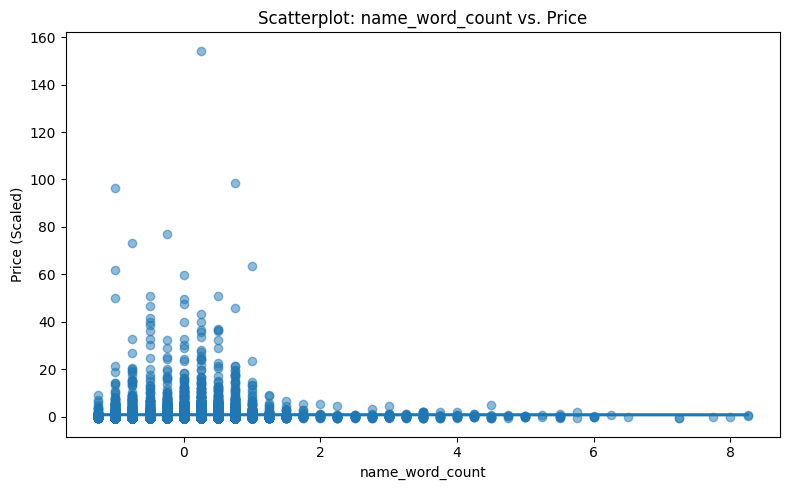

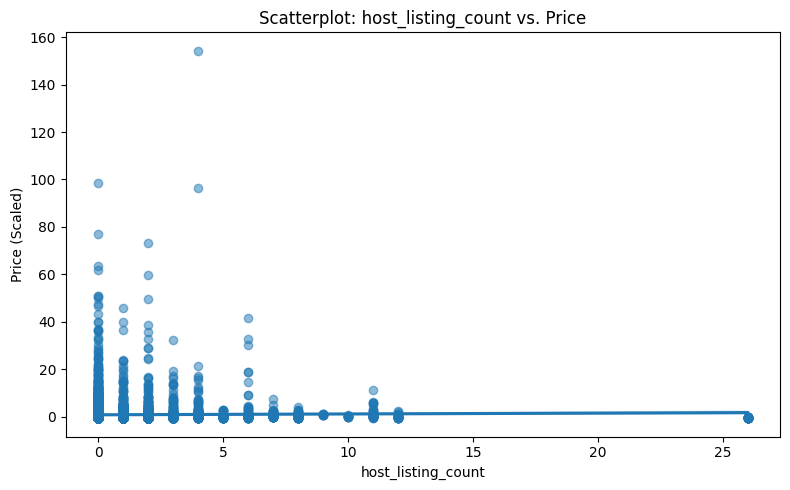

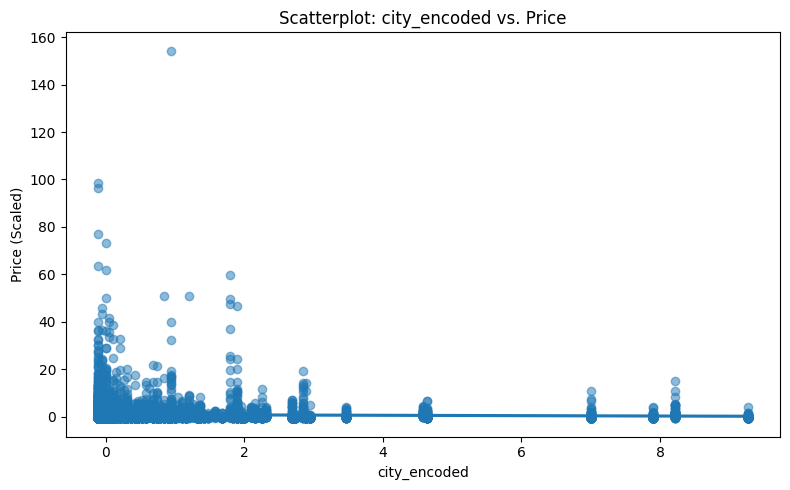

In [74]:
numerical_cols = [
    'rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles',
    'bedrooms', 'studios', 'checkin_minutes', 'checkin_minutes_capped',
    'checkout_minutes', 'checkout_minutes_capped', 'country_encoded',
    'checkin_capped_encoded', 'name_word_count', 'host_listing_count',
    'city_encoded'
]

# Generate scatterplots for each numerical feature vs 'price'
for feature in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=feature, y='price', data=scaled_df_price, scatter_kws={'alpha':0.5})
    plt.title(f'Scatterplot: {feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price (Scaled)')
    plt.tight_layout()
    plt.show()

## Box plot

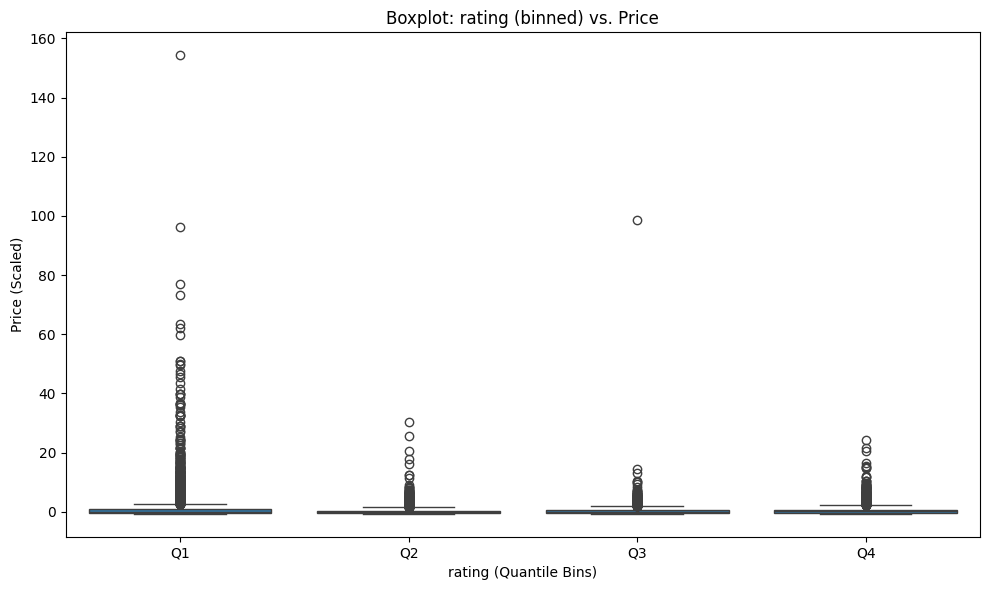

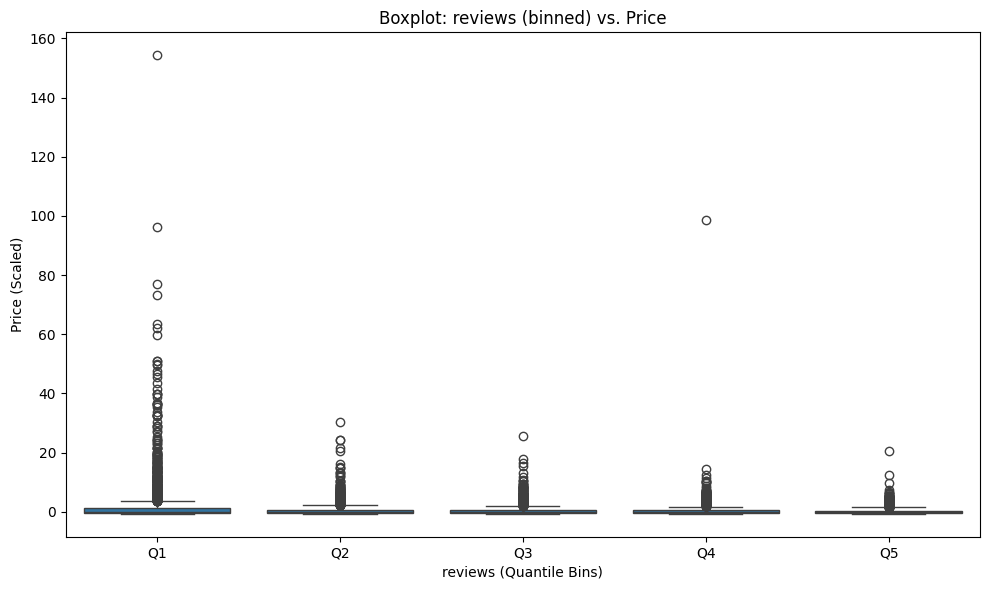

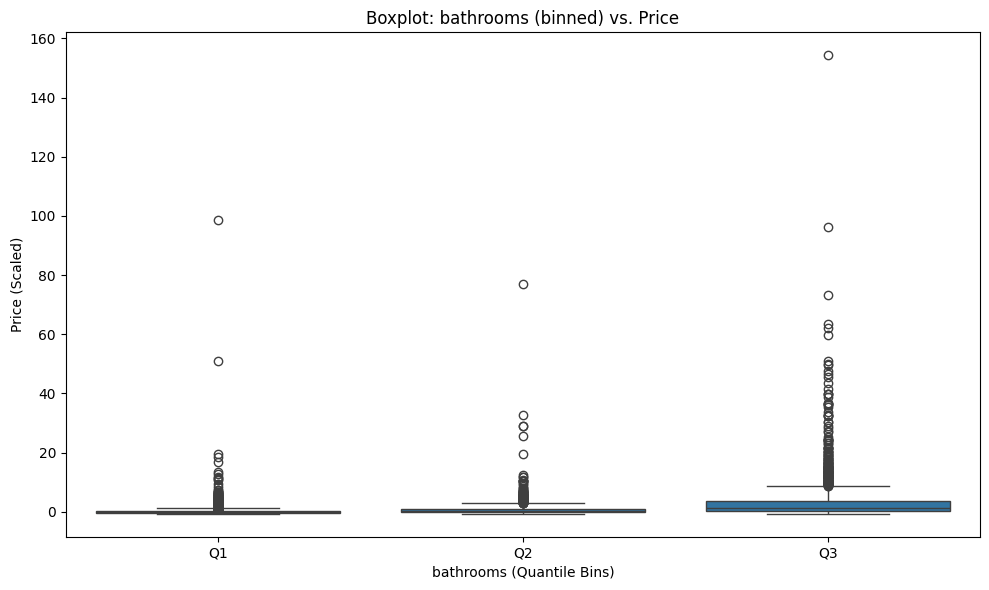

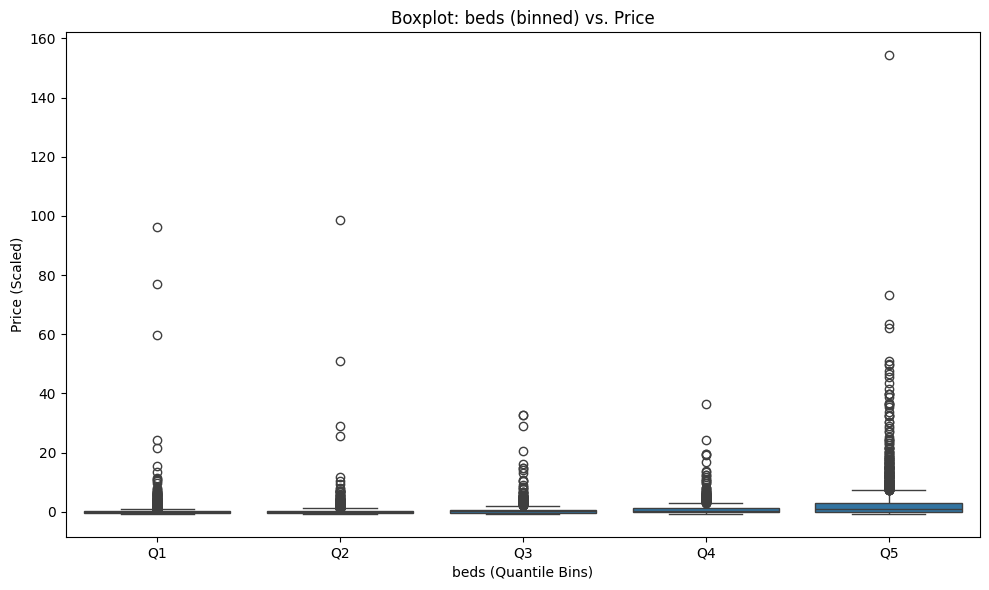

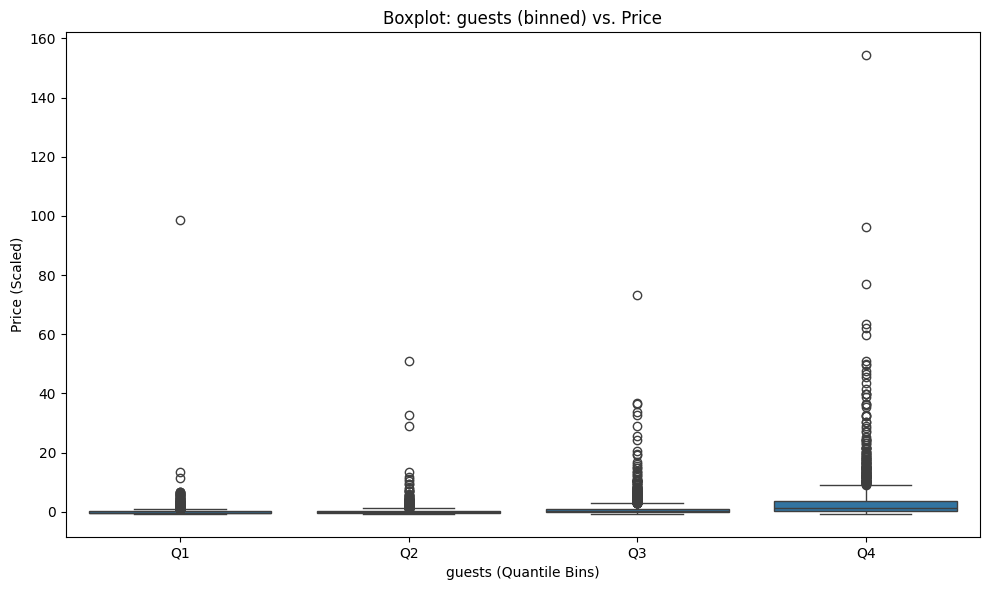

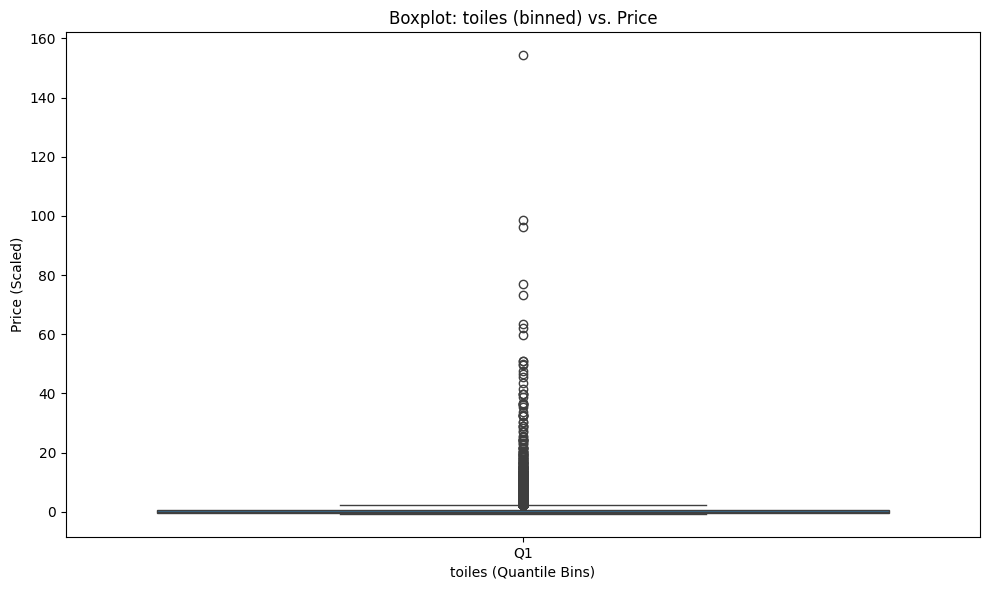

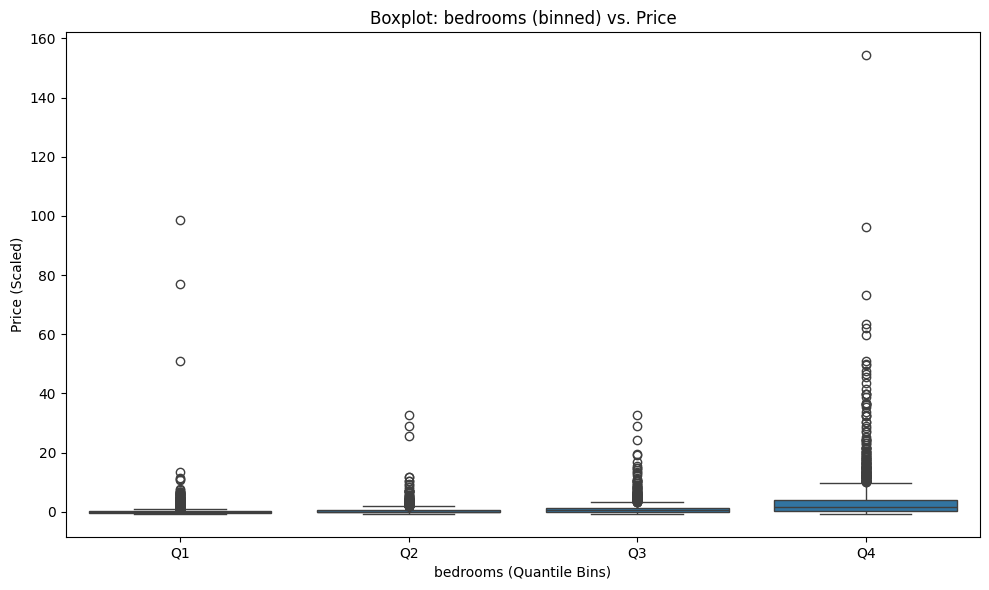

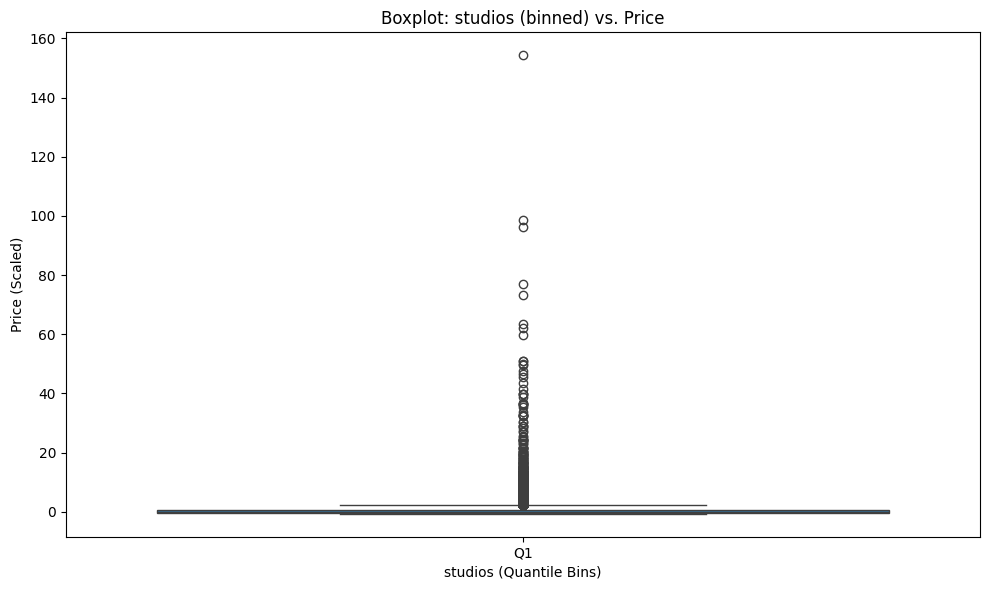

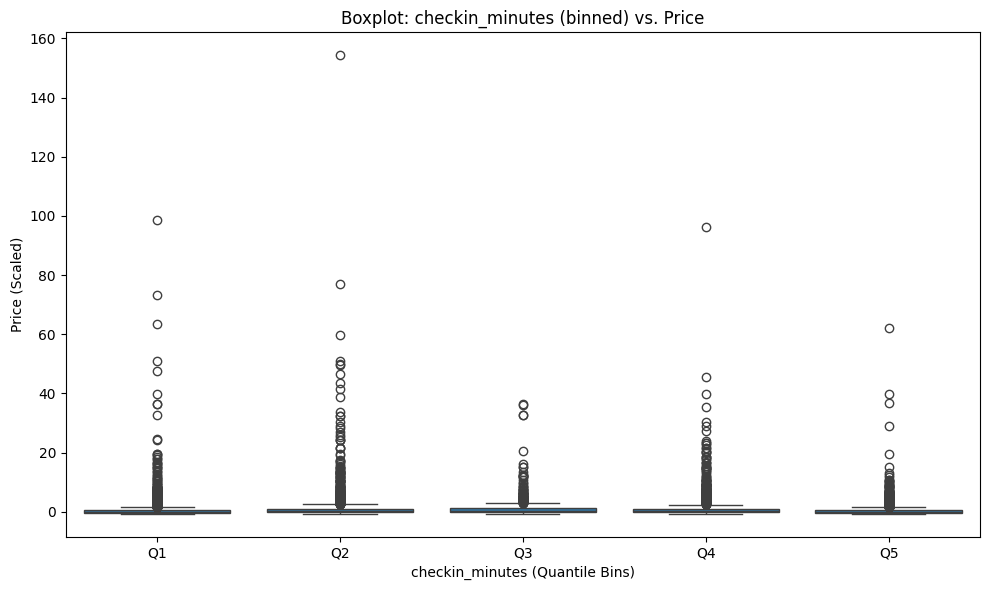

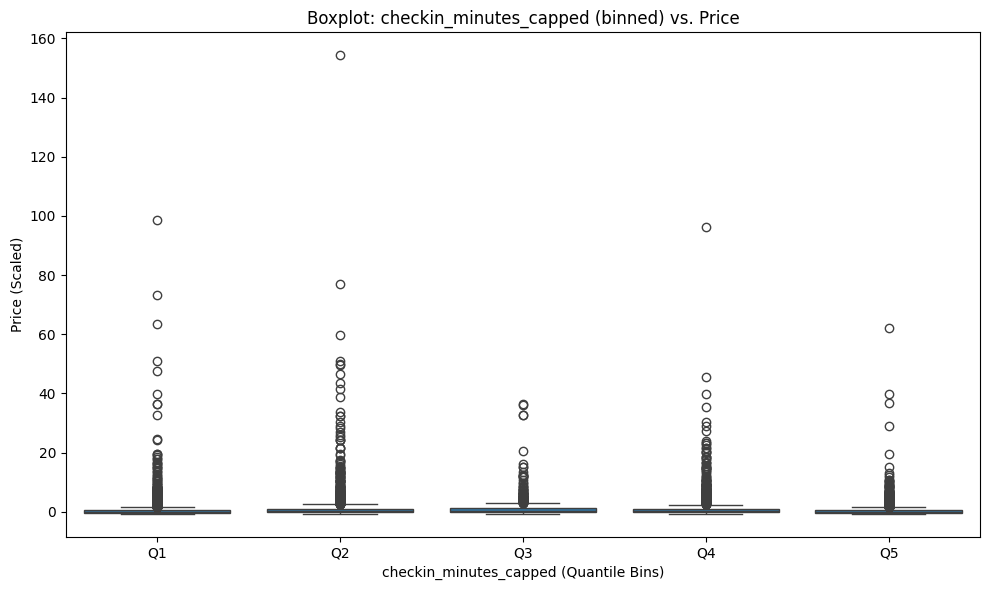

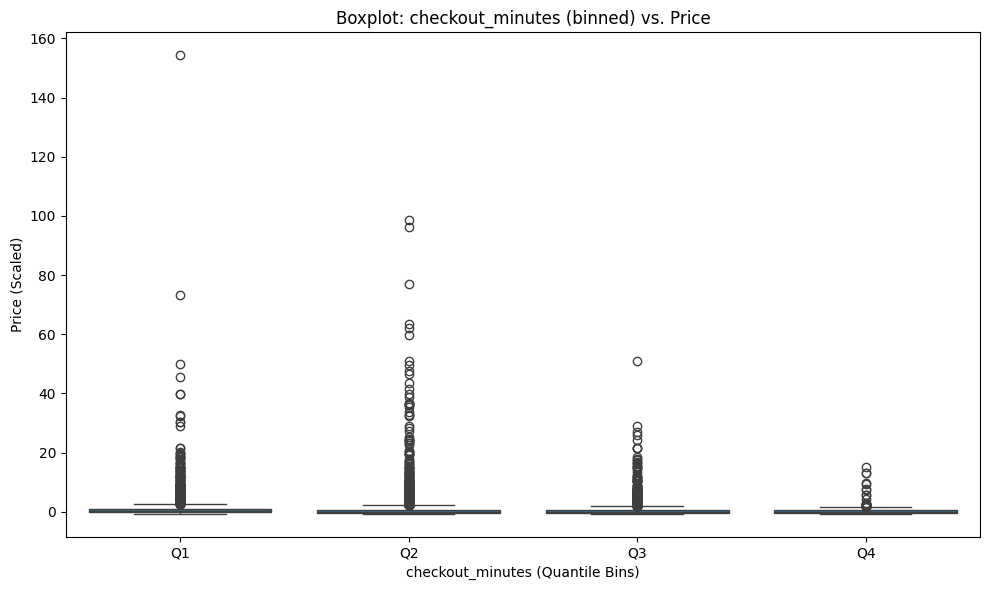

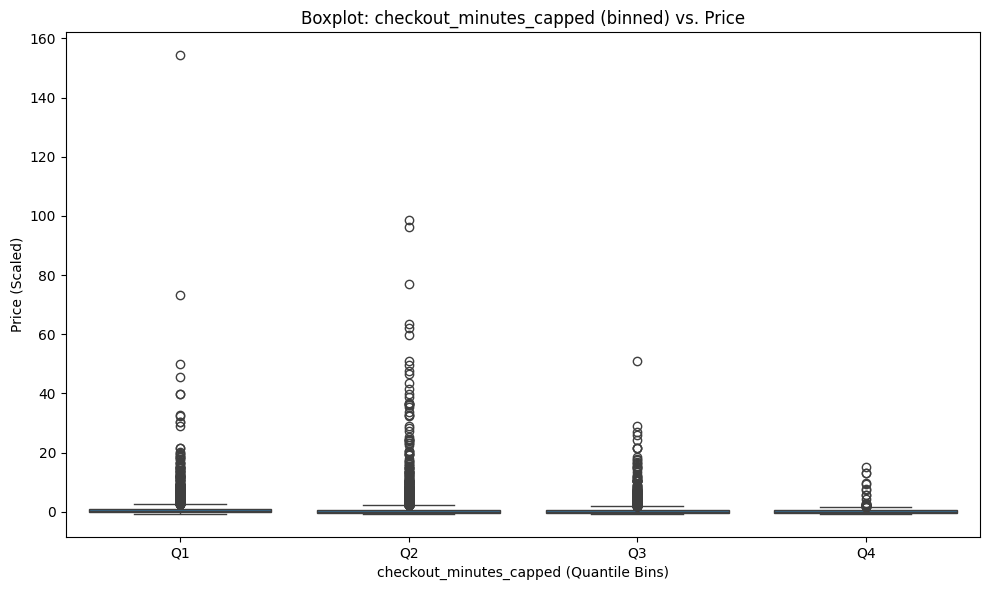

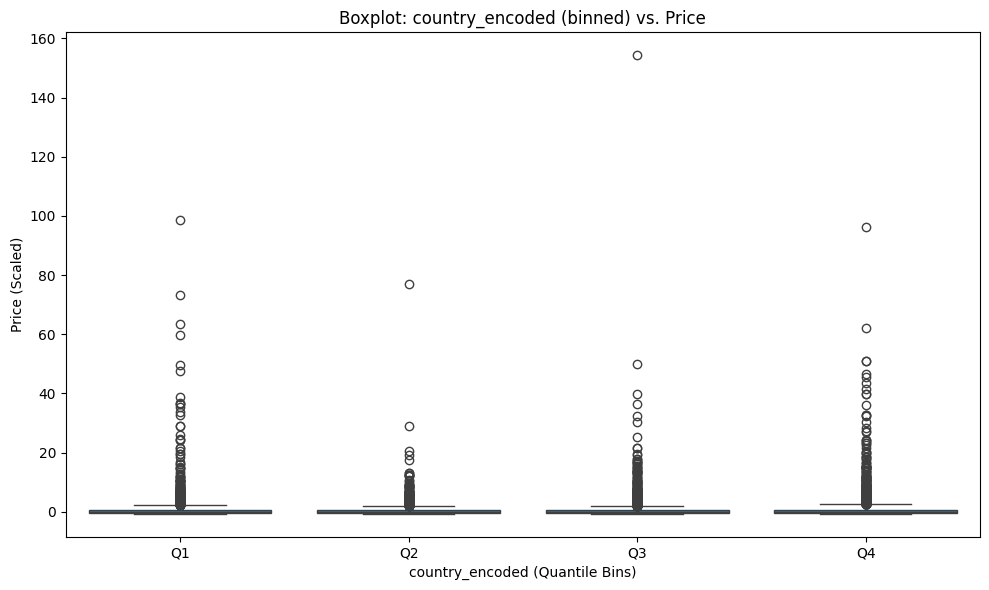

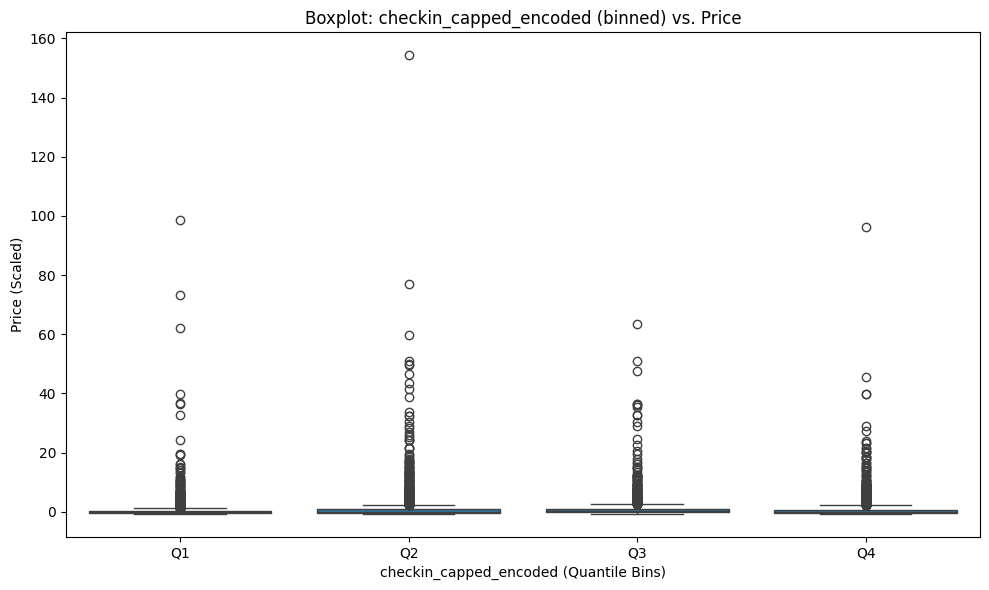

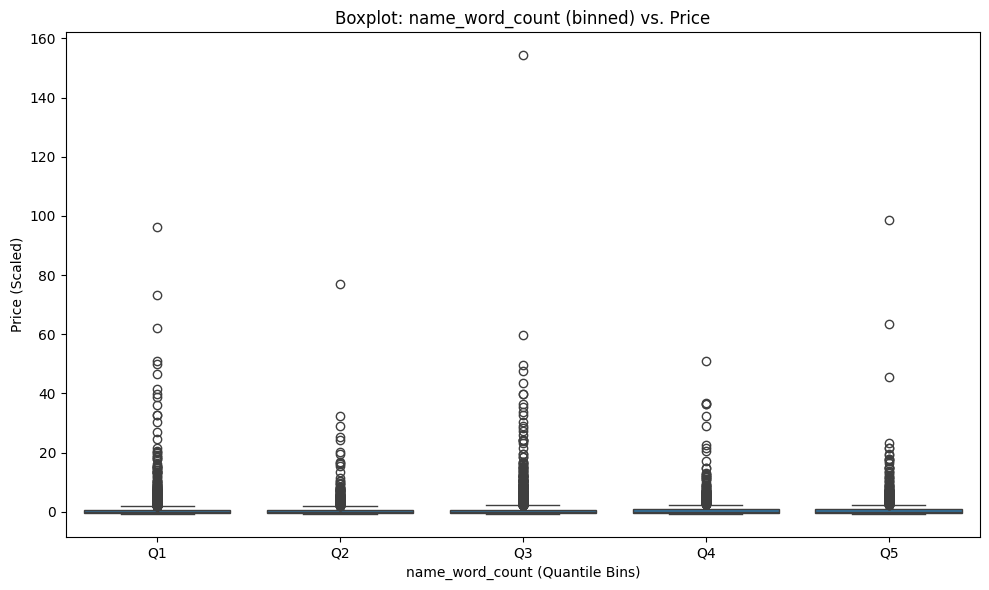

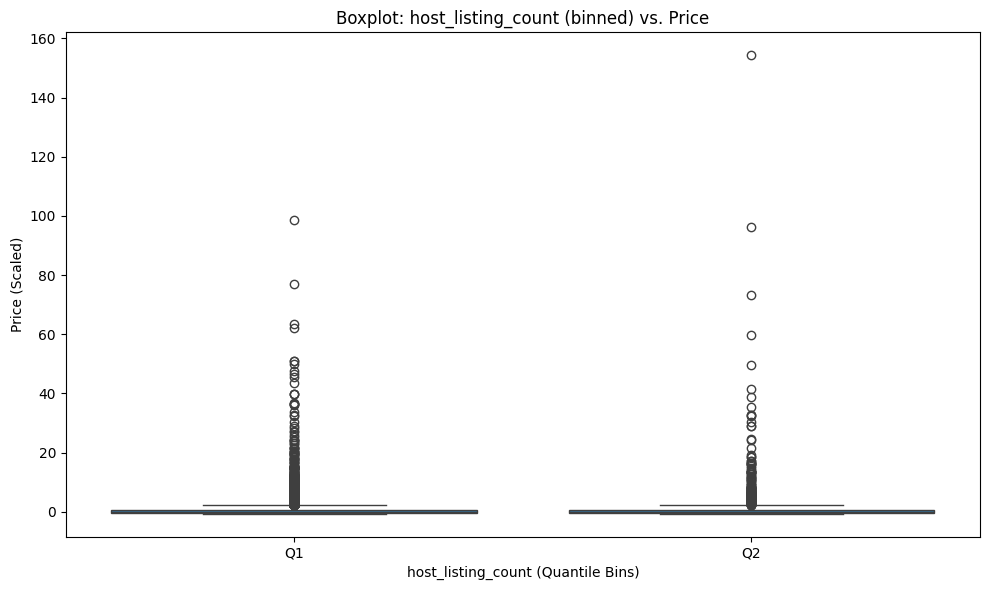

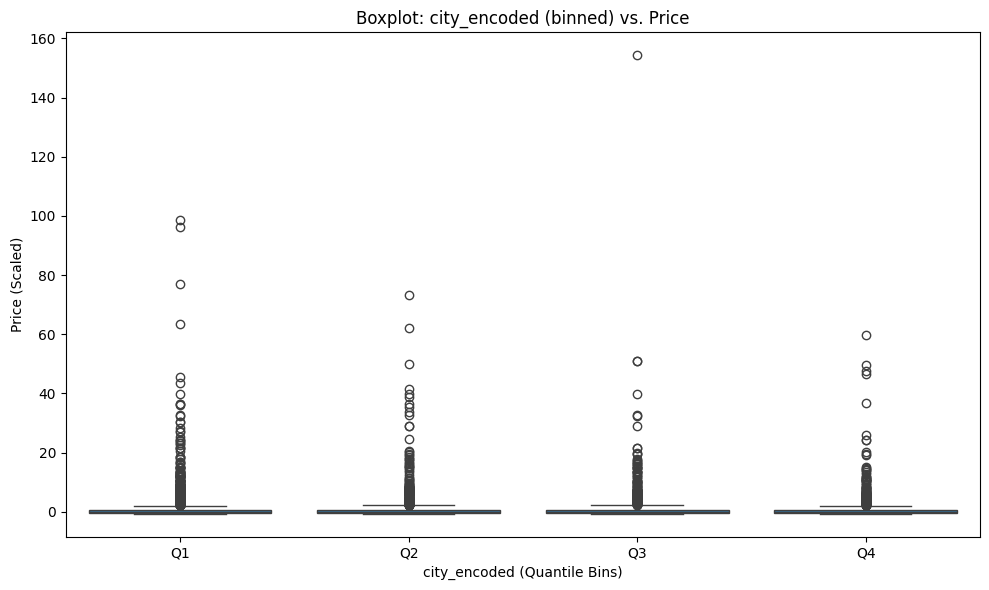

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles',
    'bedrooms', 'studios', 'checkin_minutes', 'checkin_minutes_capped',
    'checkout_minutes', 'checkout_minutes_capped', 'country_encoded',
    'checkin_capped_encoded', 'name_word_count', 'host_listing_count',
    'city_encoded'
]

for feature in numerical_cols:
    try:
        # Generate quantile-based bins (drop duplicate edges)
        codes, bins = pd.qcut(
            scaled_df_price[feature],
            q=5,
            retbins=True,
            labels=False,
            duplicates='drop'
        )

        n_bins = len(bins) - 1
        labels = [f"Q{i+1}" for i in range(n_bins)]

        # Drop NaNs and convert float index to int for label lookup
        bin_labels = pd.Series(codes, index=scaled_df_price.index)
        bin_labels = bin_labels.map(lambda i: labels[int(i)] if pd.notna(i) else pd.NA)

        df_plot = scaled_df_price[[feature, 'price']].copy()
        df_plot[f"{feature}_bin"] = bin_labels

        plt.figure(figsize=(10, 6))
        sns.boxplot(
            x=f"{feature}_bin",
            y="price",
            data=df_plot,
            order=labels
        )
        plt.title(f"Boxplot: {feature} (binned) vs. Price")
        plt.xlabel(f"{feature} (Quantile Bins)")
        plt.ylabel("Price (Scaled)")
        plt.tight_layout()
        plt.show()

    except ValueError as e:
        print(f"Skipping {feature} due to error: {e}")

## Correlation

### Heatmap

The coolwarm color map shows negative correlations in blue and positive correlations in red, with white representing a neutral or no correlation.

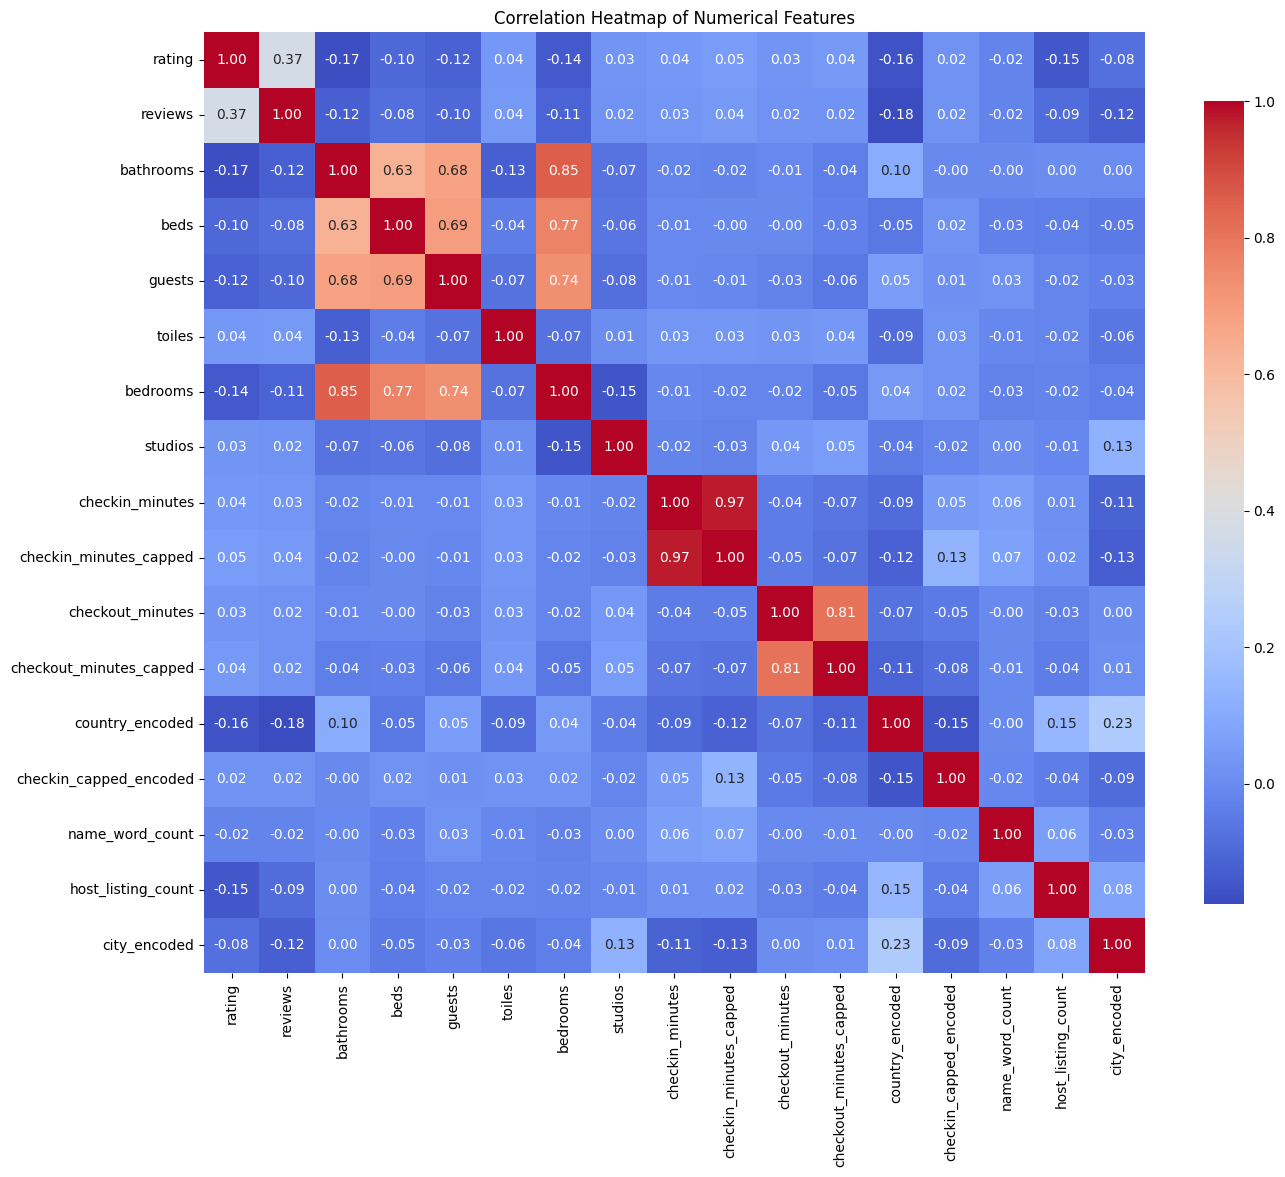

In [76]:
# Compute the correlation matrix
correlation_matrix = scaled_df[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

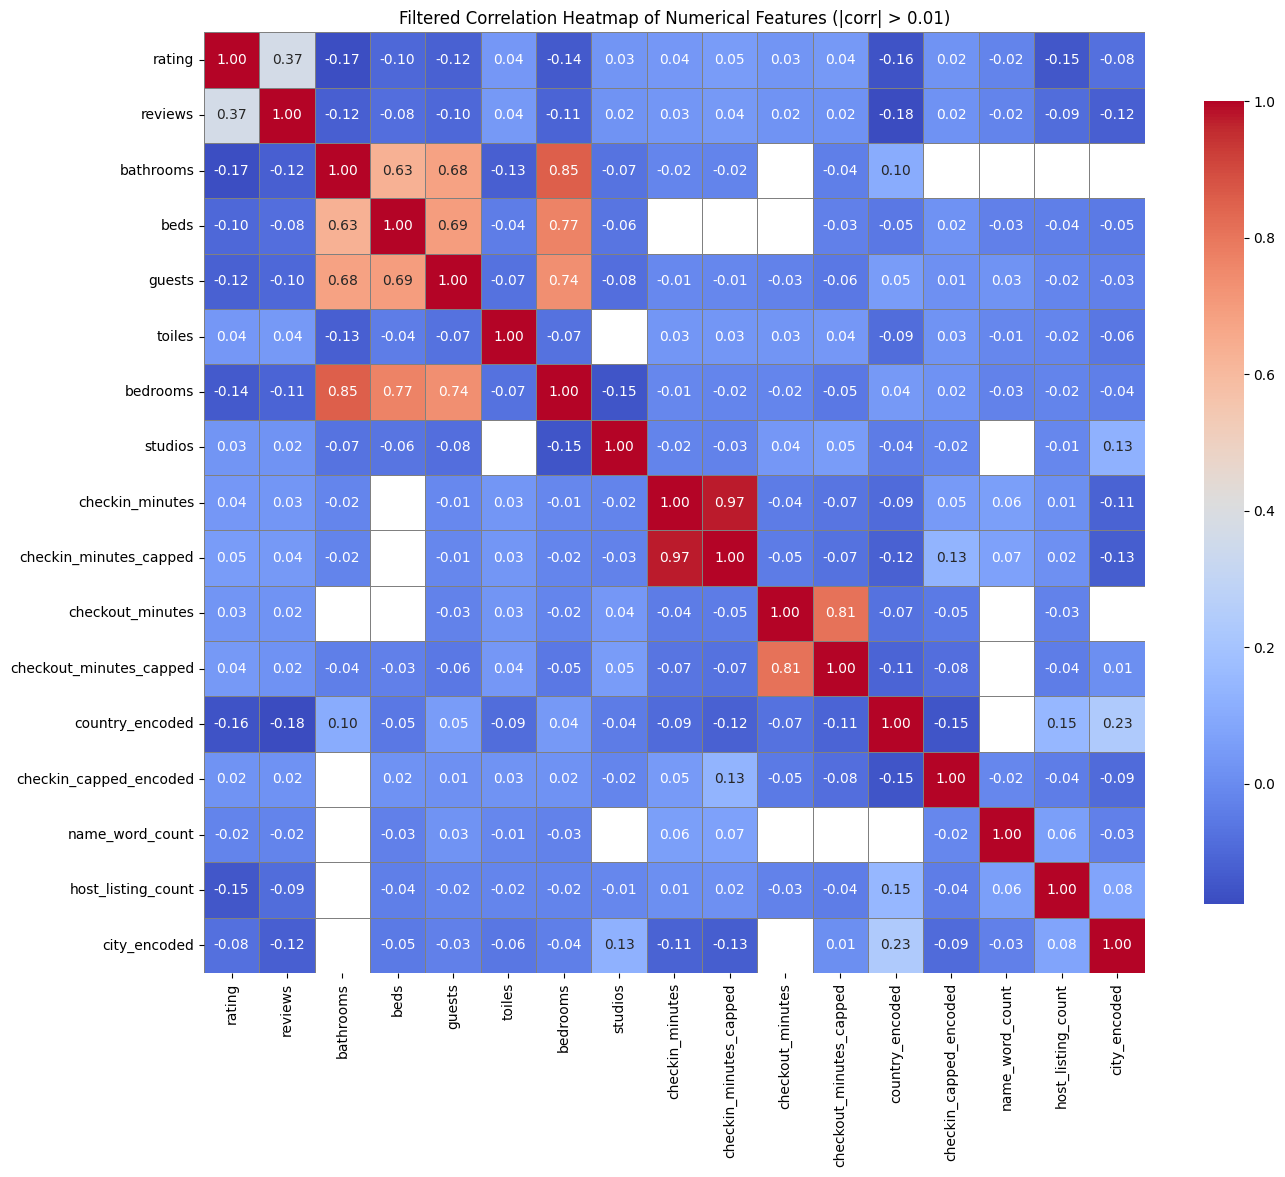

In [77]:
# Define threshold for significant correlation
corr_threshold = 0.01

# Compute the correlation matrix for selected numerical columns
correlation_matrix = scaled_df[numerical_cols].corr()

# Mask correlations below the threshold
mask = correlation_matrix.abs() < corr_threshold
correlation_matrix_filtered = correlation_matrix.mask(mask)

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a heatmap with annotations
sns.heatmap(
    correlation_matrix_filtered,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8},
    linewidths=.5,
    linecolor='gray'
)

plt.title('Filtered Correlation Heatmap of Numerical Features (|corr| > 0.01)')
plt.tight_layout()
plt.show()

### Correlation Matrix

Feature to Feature Correlation

In [78]:
scaled_df.head()

id    rating   reviews     price  bathrooms      beds  guests  \
1  0.463186 -0.969636 -0.275862 -0.322177        1.0  0.000000     0.0   
2  0.456451  0.012146  1.287356 -0.214460        0.0  0.333333     0.0   
3  0.427507  0.042510  0.022989  0.219984        0.0  0.000000     0.0   
4  0.475569 -0.969636 -0.275862 -0.159058        0.0 -0.333333    -0.5   
5  0.384825 -0.969636 -0.275862  0.495370        0.0  0.000000    -0.5   

   toiles  bedrooms  studios  ...  country_encoded  checkin_capped_encoded  \
1       0       0.5        0  ...         0.008899                    -0.6   
2       0       0.0        0  ...        -0.120133                    -1.4   
3       0       0.0        0  ...         0.008899                    -0.2   
4       0       0.0        0  ...         0.008899                    -0.2   
5       0       0.0        0  ...         0.008899                    -0.2   

   name_word_count  host_listing_count  city_encoded    price_category  \
1             0.75                 6.0      2.684211  price_reasonable   
2            -1.00                 0.0     -0.105263  price_reasonable   
3            -0.75                 0.0      4.578947  price_reasonable   
4            -0.75                 0.0      4.578947  price_reasonable   
5            -0.50                 1.0      4.578947  price_reasonable   

   price_price_low  price_price_reasonable  price_price_high  \
1            False                    True             False   
2            False                    True             False   
3            False                    True             False   
4            False                    True             False   
5            False                    True             False   

   price_price_others  
1               False  
2               False  
3               False  
4               False  
5               False  

[5 rows x 995 columns]

In [79]:
# List of columns to drop based on correlation analysis
columns_to_drop = ['id', 'bathrooms', 'beds', 'guests', 'toiles', 'studios', 'checkin_minutes_capped', 'country_encoded']

# Drop the columns from the dataframe
scaled_df_dropped = scaled_df.drop(columns=columns_to_drop)

# Verify the remaining columns
print("Remaining columns:", scaled_df_dropped.columns)

Remaining columns: Index(['rating', 'reviews', 'price', 'bedrooms', 'checkin_minutes',
       'checkout_minutes', 'checkout_minutes_capped',
       'amenity_100" HDTV with Amazon Prime Video', 'amenity_100" TV',
       'amenity_100" TV with Chromecast',
       ...
       'hourse_󱤇', 'checkin_capped_encoded', 'name_word_count',
       'host_listing_count', 'city_encoded', 'price_category',
       'price_price_low', 'price_price_reasonable', 'price_price_high',
       'price_price_others'],
      dtype='object', length=987)


In [80]:
scaled_df_dropped.head()

rating   reviews     price  bedrooms  checkin_minutes  checkout_minutes  \
1 -0.969636 -0.275862 -0.322177       0.5              1.6              -1.0   
2  0.012146  1.287356 -0.214460       0.0             -0.4               1.0   
3  0.042510  0.022989  0.219984       0.0             -0.2               1.0   
4 -0.969636 -0.275862 -0.159058       0.0             -0.2               1.0   
5 -0.969636 -0.275862  0.495370       0.0             -0.2               1.0   

   checkout_minutes_capped  amenity_100" HDTV with Amazon Prime Video  \
1                     -1.0                                          0   
2                      1.0                                          0   
3                      1.0                                          0   
4                      1.0                                          0   
5                      1.0                                          0   

   amenity_100" TV  amenity_100" TV with Chromecast  ...  hourse_󱤇  \
1                0                                0  ...         0   
2                0                                0  ...         0   
3                0                                0  ...         0   
4                0                                0  ...         0   
5                0                                0  ...         0   

   checkin_capped_encoded  name_word_count  host_listing_count  city_encoded  \
1                    -0.6             0.75                 6.0      2.684211   
2                    -1.4            -1.00                 0.0     -0.105263   
3                    -0.2            -0.75                 0.0      4.578947   
4                    -0.2            -0.75                 0.0      4.578947   
5                    -0.2            -0.50                 1.0      4.578947   

     price_category  price_price_low  price_price_reasonable  \
1  price_reasonable            False                    True   
2  price_reasonable            False                    True   
3  price_reasonable            False                    True   
4  price_reasonable            False                    True   
5  price_reasonable            False                    True   

   price_price_high  price_price_others  
1             False               False  
2             False               False  
3             False               False  
4             False               False  
5             False               False  

[5 rows x 987 columns]

In [81]:
heatmap_scaled_df_filtered=scaled_df_dropped.copy()

# Analyze Class Distribution

## Proportions

## Visualization

In [82]:
# For InjuryType
counts = heatmap_scaled_df_filtered.head()['price'].value_counts(normalize=True)

/tmp/ipython-input-83-1668123900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


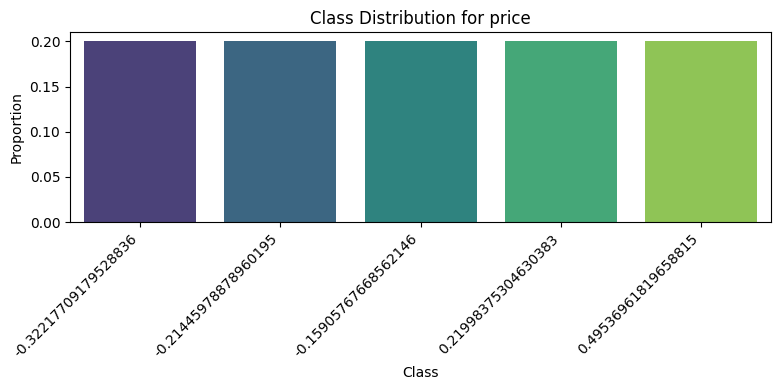

In [83]:
plt.figure(figsize=(8, 4))  # slightly wider to give more room
sns.barplot(x=counts.index, y=counts.values, palette="viridis")
plt.title("Class Distribution for price")
plt.xlabel("Class")
plt.ylabel("Proportion")

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # adjust margins so labels fit
plt.show()

# Model Training with ANN <font color='blue'> **[PHASE-2]**

## Split Dataset

In [84]:
print("Shape of preprocessed_df:")
print(heatmap_scaled_df_filtered.shape)

Shape of preprocessed_df:
(11079, 987)


In [85]:
# Print the shape of the filtered DataFrame
print("Shape of preprocessed_df:")
print(heatmap_scaled_df_filtered.shape)

# Check for NaN values in the DataFrame
nan_counts = heatmap_scaled_df_filtered.isna().sum()

# Print total number of NaNs and their locations if any
total_nans = nan_counts.sum()
if total_nans > 0:
    print(f"\nTotal NaN values in DataFrame: {total_nans}")
    print("\nColumns with NaN values:")
    print(nan_counts[nan_counts > 0])
else:
    print("\nNo NaN values found in the DataFrame.")

Shape of preprocessed_df:
(11079, 987)

No NaN values found in the DataFrame.


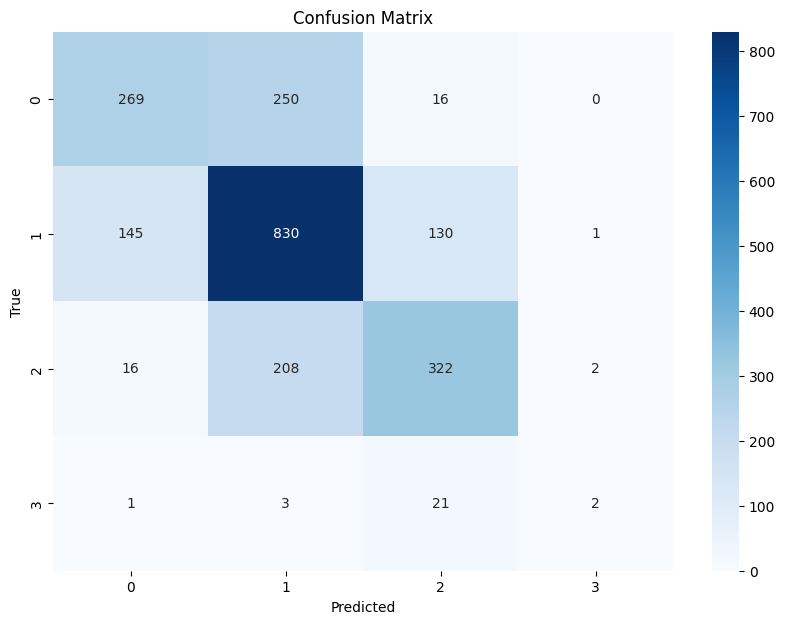

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

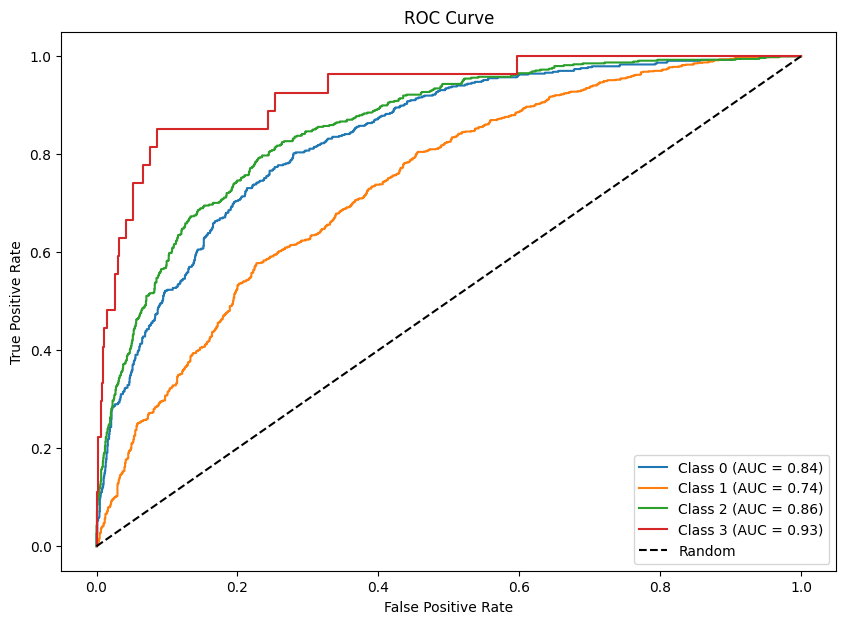

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))
num_classes = 4

for i in range(num_classes):
    y_true_bin = (y_test_category == i).astype(int)
    y_score = y_pred[:, i]
    fpr, tpr, _ = roc_curve(y_true_bin, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

L2 regularizaton

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import numpy as np

# Features (drop all price-related columns not needed for X)
X_category = heatmap_scaled_df_filtered.drop(
    ['price', 'price_category', 'price_price_low', 'price_price_reasonable',
     'price_price_high', 'price_price_others'],
    axis=1
)

# Target (one-hot encoded price categories)
y_one_hot = heatmap_scaled_df_filtered[
    ['price_price_low', 'price_price_reasonable', 'price_price_high', 'price_price_others']
]

# Convert one-hot encoded target to integer labels (0, 1, 2, 3) for the model
y_category = np.argmax(y_one_hot.values, axis=1)

# Split into train (80%) and test (20%) sets
X_train_category, X_test_category, y_train_category, y_test_category = train_test_split(
    X_category, y_category, test_size=0.2, random_state=42
)

# Print the size (number of rows) for each set
print("\nModel Data Sizes:")
print("=" * 50)
print(f"{'Dataset':<15} {'Number of Rows':<20} {'Number of Features'}")
print("=" * 50)
print(f"{'Train set':<15} {X_train_category.shape[0]:<20} {X_train_category.shape[1]}")
print(f"{'Test set':<15} {X_test_category.shape[0]:<20} {X_test_category.shape[1]}")
print("=" * 50)

# Print the shapes of the resulting sets to verify
print("\nModel Data Shapes:")
print("=" * 50)
print(f"{'Dataset':<15} {'Features (X)':<25} {'Labels (y)':<15}")
print("=" * 50)
print(f"{'Train set':<15} {str(X_train_category.shape):<25} {str(y_train_category.shape):<15}")
print(f"{'Test set':<15} {str(X_test_category.shape):<25} {str(y_test_category.shape):<15}")
print("=" * 50)

# Compute class weights to handle potential class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_category), y=y_train_category)
class_weights_dict = dict(enumerate(class_weights))

# Build an enhanced ANN model with L2 regularization
def build_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(4, activation='softmax'))  # 4 output classes

    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and evaluate ANN model
def train_and_evaluate_ann(X_train, y_train, X_test, y_test, epochs=200, batch_size=16):
    input_dim = X_train.shape[1]
    model = build_ann_model(input_dim)

    # Early stopping with increased patience
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    # Train the model with class weights
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
              validation_split=0.1, callbacks=[early_stopping], verbose=1, class_weight=class_weights_dict)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    cm = confusion_matrix(y_test, y_pred_classes)

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    return model, accuracy, precision, recall, f1, cm, y_pred

# Train and evaluate the model
model, accuracy, precision, recall, f1, cm, y_pred = train_and_evaluate_ann(
    X_train_category, y_train_category, X_test_category, y_test_category
)


Model Data Sizes:
Dataset         Number of Rows       Number of Features
Train set       8863                 981
Test set        2216                 981

Model Data Shapes:
Dataset         Features (X)              Labels (y)     
Train set       (8863, 981)               (8863,)        
Test set        (2216, 981)               (2216,)        


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.3300 - loss: 1.7569 - val_accuracy: 0.4825 - val_loss: 1.3418
Epoch 2/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4489 - loss: 1.2510 - val_accuracy: 0.5366 - val_loss: 1.2169
Epoch 3/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4795 - loss: 1.2235 - val_accuracy: 0.4859 - val_loss: 1.2403
Epoch 4/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4903 - loss: 1.0987 - val_accuracy: 0.5930 - val_loss: 1.1192
Epoch 5/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4940 - loss: 1.0652 - val_accuracy: 0.5524 - val_loss: 1.1157
Epoch 6/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5221 - loss: 1.0007 - val_accuracy: 0.5930 - val_loss: 1.0562
Epoch 7/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5531 - loss: 0.9481 - val_accuracy: 0.5930 - val_loss: 1.0512
Epoch 8/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5571 - loss: 0.9248 - val_ac

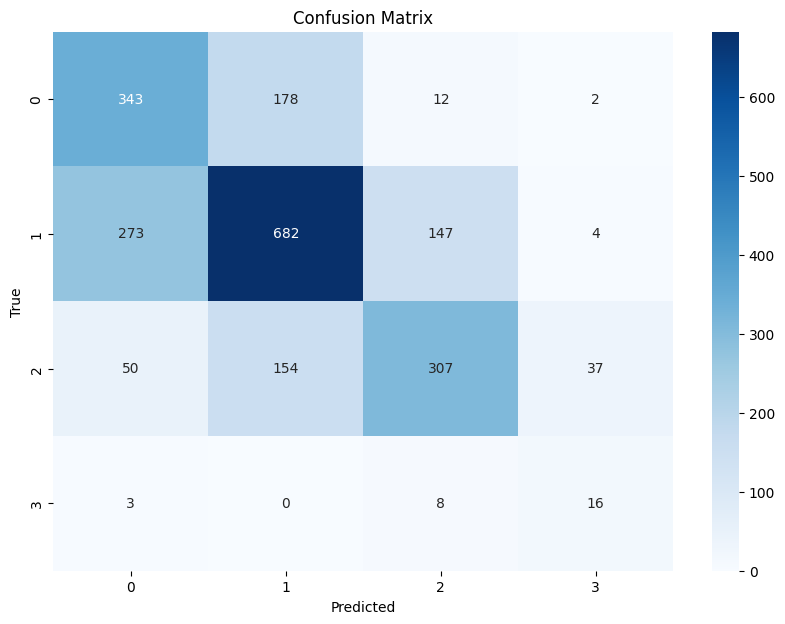

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

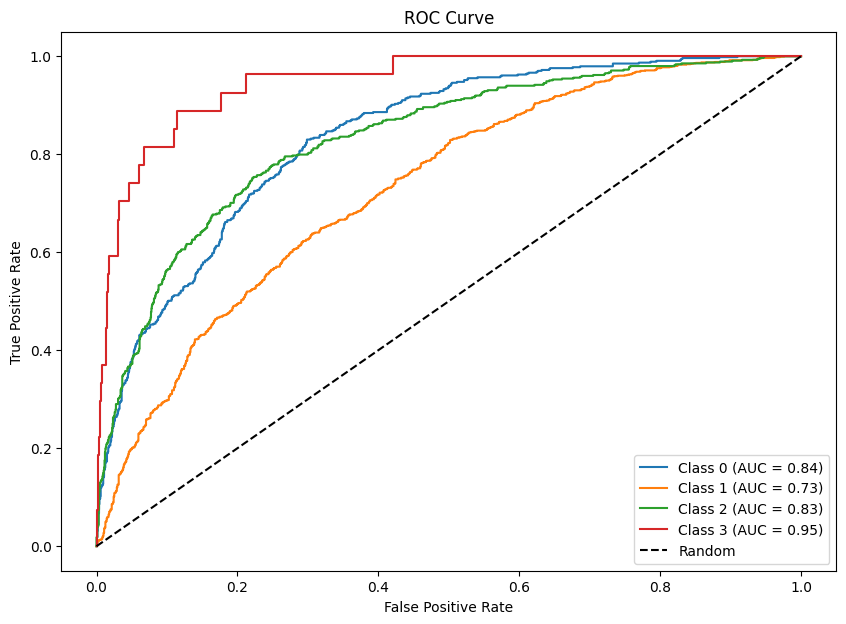

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))
num_classes = 4

for i in range(num_classes):
    y_true_bin = (y_test_category == i).astype(int)
    y_score = y_pred[:, i]
    fpr, tpr, _ = roc_curve(y_true_bin, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

###HYPERPARAMETER_TUNING_USING GRID SEARCH

In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import kerastuner as kt
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

# Features (drop all price-related columns not needed for X)
X_category = heatmap_scaled_df_filtered.drop(
    ['price', 'price_category', 'price_price_low', 'price_price_reasonable',
     'price_price_high', 'price_price_others'],
    axis=1
)

# Target (one-hot encoded price categories)
y_one_hot = heatmap_scaled_df_filtered[
    ['price_price_low', 'price_price_reasonable', 'price_price_high', 'price_price_others']
]

# Convert one-hot encoded target to integer labels (0, 1, 2, 3) for the model
y_category = np.argmax(y_one_hot.values, axis=1)

# Split into train (80%) and test (20%) sets
X_train_category, X_test_category, y_train_category, y_test_category = train_test_split(
    X_category, y_category, test_size=0.2, random_state=42
)

# Print the size (number of rows) for each set
print("\nModel Data Sizes:")
print("=" * 50)
print(f"{'Dataset':<15} {'Number of Rows':<20} {'Number of Features'}")
print("=" * 50)
print(f"{'Train set':<15} {X_train_category.shape[0]:<20} {X_train_category.shape[1]}")
print(f"{'Test set':<15} {X_test_category.shape[0]:<20} {X_test_category.shape[1]}")
print("=" * 50)

# Print the shapes of the resulting sets to verify
print("\nModel Data Shapes:")
print("=" * 50)
print(f"{'Dataset':<15} {'Features (X)':<25} {'Labels (y)':<15}")
print("=" * 50)
print(f"{'Train set':<15} {str(X_train_category.shape):<25} {str(y_train_category.shape):<15}")
print(f"{'Test set':<15} {str(X_test_category.shape):<25} {str(y_test_category.shape):<15}")
print("=" * 50)

class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                        activation='relu',
                        input_dim=X_train_category.shape[1]))
        model.add(Dropout(rate=hp.Float('dropout_input', min_value=0.0, max_value=0.5, step=0.1)))

        for i in range(hp.Int('num_layers', 1, 3)):
            model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                          activation='relu'))
            model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))

        model.add(Dense(4, activation='softmax'))
        model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0001])),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
        return model

tuner = RandomSearch(
    MyHyperModel(),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='price_prediction'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
tuner.search(X_train_category, y_train_category, epochs=100, validation_split=0.1, callbacks=[early_stopping])

best_model = tuner.get_best_models(num_models=1)[0]

y_pred = best_model.predict(X_test_category)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluation metrics
accuracy = accuracy_score(y_test_category, y_pred_classes)
precision = precision_score(y_test_category, y_pred_classes, average='weighted')
recall = recall_score(y_test_category, y_pred_classes, average='weighted')
f1 = f1_score(y_test_category, y_pred_classes, average='weighted')
cm = confusion_matrix(y_test_category, y_pred_classes)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hps.values)

Trial 10 Complete [00h 01m 16s]
val_accuracy: 0.6747463345527649

Best val_accuracy So Far: 0.6826381087303162
Total elapsed time: 00h 09m 33s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy: 0.6286
Precision: 0.6275
Recall: 0.6286
F1 Score: 0.6224
Confusion Matrix:
[[251 264  19   1]
 [143 831 130   2]
 [ 15 212 305  16]
 [  1   3  17   6]]
Best Hyperparameters:
{'units_input': 224, 'dropout_input': 0.1, 'num_layers': 3, 'units_0': 192, 'dropout_0': 0.30000000000000004, 'learning_rate': 0.0001, 'units_1': 480, 'dropout_1': 0.0, 'units_2': 480, 'dropout_2': 0.30000000000000004}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
from sklearn.preprocessing import label_binarize

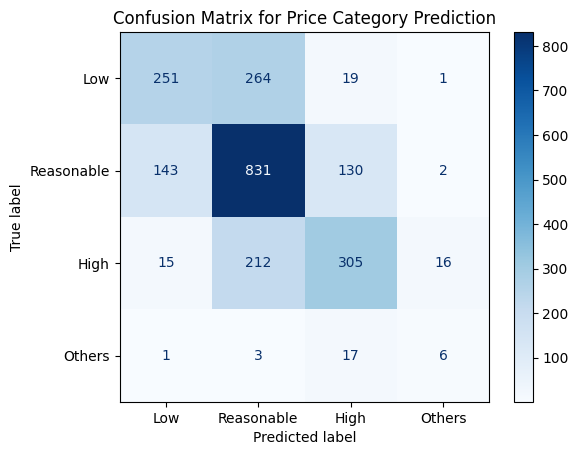

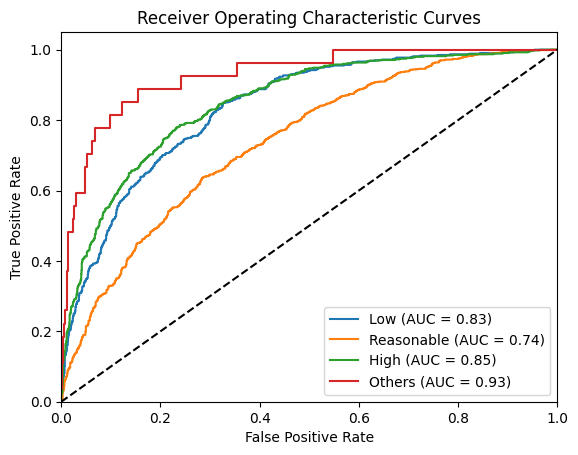

In [ ]:
# Define class names for plotting
class_names = ['Low', 'Reasonable', 'High', 'Others']

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Price Category Prediction')
plt.show()

# Plot ROC curves
y_test_binarized = label_binarize(y_test_category, classes=[0, 1, 2, 3])
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Distinct colors for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(loc="lower right")
plt.show()

## Define Train and Test functions

# Model Training with DECISION TREE  <font color='blue'> **[PHASE-3]**

## Define Train and Test functions

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Function to train, test, and evaluate a Decision Tree model
def train_and_evaluate_DT(X_train, y_train, X_test, y_test, max_depth):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted',zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted',zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm

## Train and Evaluate models

In [ ]:
# Define max_depth values to evaluate
max_depths = [4, 5, 6, 7, 8, 9]

In [ ]:
# Store results in a list for easy formatting later
results_DT = []

# Train and evaluate Decision Tree models for each max_depth
for max_depth in max_depths:
    print(f'Training Decision Tree model... Max_depth: {max_depth}')

    (accuracy, precision, recall, f1, cm) = train_and_evaluate_DT(X_train_category, y_train_category, X_test_category, y_test_category, max_depth)

    # Append results for each configuration
    results_DT.append([max_depth, accuracy, precision, recall, f1, cm])

print("\nStored results for all max_depth values")

Training Decision Tree model... Max_depth: 4
Training Decision Tree model... Max_depth: 5
Training Decision Tree model... Max_depth: 6
Training Decision Tree model... Max_depth: 7
Training Decision Tree model... Max_depth: 8
Training Decision Tree model... Max_depth: 9

Stored results for all max_depth values


## View Result

In [ ]:
# Convert results to a DataFrame for better display
results_df = pd.DataFrame(results_DT, columns=['Max_depth', 'Accuracy', 'Precision', 'Recall', 'F1', 'Confusion Matrix'])

In [ ]:
# Format floats to 4 decimal places
pd.set_option('display.float_format', '{:.4f}'.format)
results_df

Max_depth  Accuracy  Precision  Recall     F1  \
0          4    0.5943     0.5873  0.5943 0.5574   
1          5    0.5930     0.5851  0.5930 0.5813   
2          6    0.6033     0.5941  0.6033 0.5915   
3          7    0.6069     0.5994  0.6069 0.5810   
4          8    0.6047     0.6030  0.6047 0.5982   
5          9    0.6069     0.6037  0.6069 0.5905   

                                    Confusion Matrix  
0  [[118, 383, 34, 0], [80, 942, 84, 0], [14, 277...  
1  [[230, 271, 34, 0], [196, 823, 87, 0], [26, 26...  
2  [[227, 273, 35, 0], [182, 834, 90, 0], [28, 24...  
3  [[157, 345, 33, 0], [87, 910, 109, 0], [19, 25...  
4  [[265, 241, 29, 0], [202, 804, 100, 0], [30, 2...  
5  [[211, 299, 25, 0], [136, 880, 90, 0], [19, 27...

In [ ]:
# results(sorted by accuracy)
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
results_df_sorted = results_df_sorted.drop('Confusion Matrix', axis=1)

print(results_df_sorted)

   Max_depth  Accuracy  Precision  Recall     F1
5          9    0.6069     0.6037  0.6069 0.5905
3          7    0.6069     0.5994  0.6069 0.5810
4          8    0.6047     0.6030  0.6047 0.5982
2          6    0.6033     0.5941  0.6033 0.5915
0          4    0.5943     0.5873  0.5943 0.5574
1          5    0.5930     0.5851  0.5930 0.5813


In [ ]:
# save result
result_df_DT = results_df.copy()

## Plot Confusion Matrices

In [ ]:
# Plot confusion matrices for each max_depth
def plot_confusion_matrices_DT():
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    fig.suptitle('\nConfusion Matrices for Decision Tree Models with Different Max_depth\n', fontsize=16, weight='bold', color='blue')

    for i, max_depth in enumerate(max_depths):
        cm = results_df[results_df['Max_depth'] == max_depth]['Confusion Matrix'].values[0]
        ax = axes[i // 3, i % 3]

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        ax.set_title(f'Max_depth: {max_depth}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('Actual Label')

    plt.subplots_adjust(hspace=0.4, top=0.9)
    plt.show()

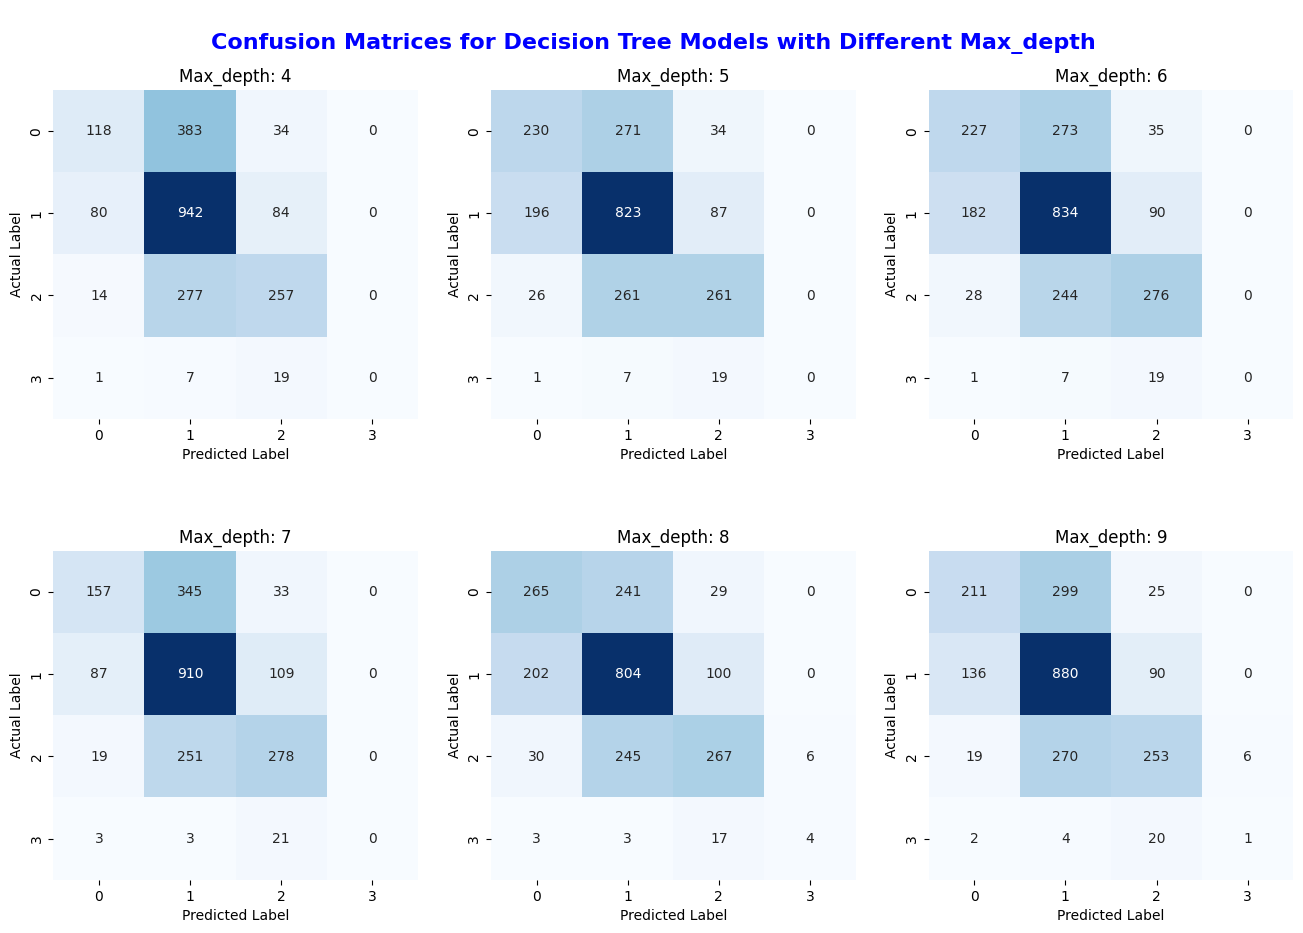

In [ ]:
plot_confusion_matrices_DT()

## Learning Curves

Accuracy (y-axis) VS Max_depth (x-axis)

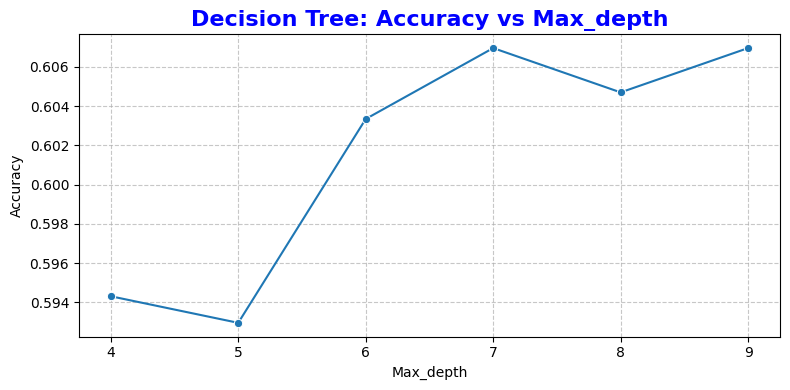

In [ ]:
# Plot Accuracy vs Max_depth
plt.figure(figsize=(8, 4))

sns.lineplot(x='Max_depth', y='Accuracy', marker='o', data=results_df)

plt.title('Decision Tree: Accuracy vs Max_depth', fontsize=16, weight='bold', color='blue')
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.xticks(max_depths)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Model Training with SVM

## Define Train and Test functions

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Function to train, test, and evaluate an SVM model
def train_and_evaluate_SVM(X_train, y_train, X_test, y_test, kernel):
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm

## Train and Evaluate models

In [ ]:
# Define kernel types to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [ ]:
# Store results in a list for easy formatting later
results_SVM = []

# Train and evaluate SVM models for each kernel
for kernel in kernels:
    print(f'Training SVM model... Kernel: {kernel}')

    (accuracy, precision, recall, f1, cm) = train_and_evaluate_SVM(X_train_category, y_train_category, X_test_category, y_test_category, kernel)

    # Append results for each configuration
    results_SVM.append([kernel, accuracy, precision, recall, f1, cm])

print("\nStored results for all kernels")

Training SVM model... Kernel: linear
Training SVM model... Kernel: poly
Training SVM model... Kernel: rbf
Training SVM model... Kernel: sigmoid

Stored results for all kernels


## View Result

In [ ]:
# Convert results to a DataFrame for better display
results_df = pd.DataFrame(results_SVM, columns=['Kernel', 'Accuracy', 'Precision', 'Recall', 'F1', 'Confusion Matrix'])

In [ ]:
# Format floats to 4 decimal places
pd.set_option('display.float_format', '{:.4f}'.format)
results_df

Kernel  Accuracy  Precision  Recall     F1  \
0   linear    0.6151     0.6147  0.6151 0.6015   
1     poly    0.6259     0.6412  0.6259 0.6022   
2      rbf    0.6372     0.6400  0.6372 0.6171   
3  sigmoid    0.4869     0.4966  0.4869 0.4910   

                                    Confusion Matrix  
0  [[215, 298, 22, 0], [130, 879, 97, 0], [29, 24...  
1  [[188, 333, 14, 0], [88, 951, 67, 0], [14, 288...  
2  [[208, 313, 14, 0], [92, 932, 82, 0], [14, 262...  
3  [[207, 256, 62, 10], [280, 605, 207, 14], [116...

In [ ]:
# results(sorted by accuracy)
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
results_df_sorted = results_df_sorted.drop('Confusion Matrix', axis=1)

print("SVM Evaluation Results (target:InjuryType):\n")
print(results_df_sorted)

SVM Evaluation Results (target:InjuryType):

    Kernel  Accuracy  Precision  Recall     F1
2      rbf    0.6372     0.6400  0.6372 0.6171
1     poly    0.6259     0.6412  0.6259 0.6022
0   linear    0.6151     0.6147  0.6151 0.6015
3  sigmoid    0.4869     0.4966  0.4869 0.4910


In [ ]:
# save result
result_df_SVM= results_df.copy()

## Plot Confusion Matrices

In [ ]:
# Plot confusion matrices for each kernel
def plot_confusion_matrices_SVM():
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 rows, 2 columns grid for 4 kernels
    fig.suptitle('\nConfusion Matrices for SVM Models with Different Kernels\n', fontsize=16, weight='bold', color='blue')

    for i, kernel in enumerate(kernels):
        cm = results_df[results_df['Kernel'] == kernel]['Confusion Matrix'].values[0]
        ax = axes[i // 2, i % 2]

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        ax.set_title(f'Kernel: {kernel}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('Actual Label')

    plt.subplots_adjust(hspace=0.4, top=0.9)
    plt.show()

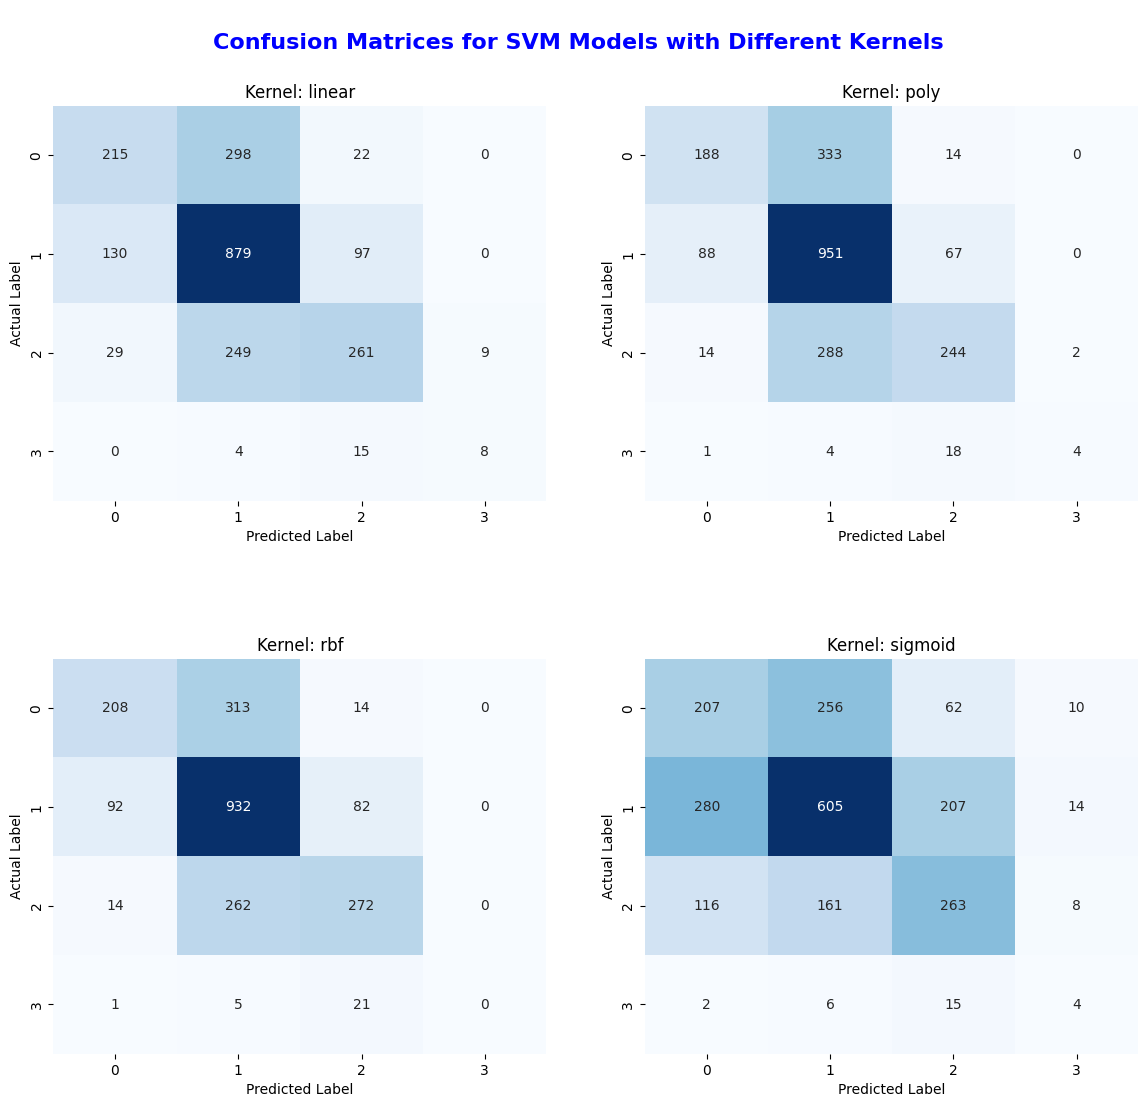

In [ ]:
plot_confusion_matrices_SVM()

## Learning Curves

Accuracy (y-axis) VS Kernel (x-axis)

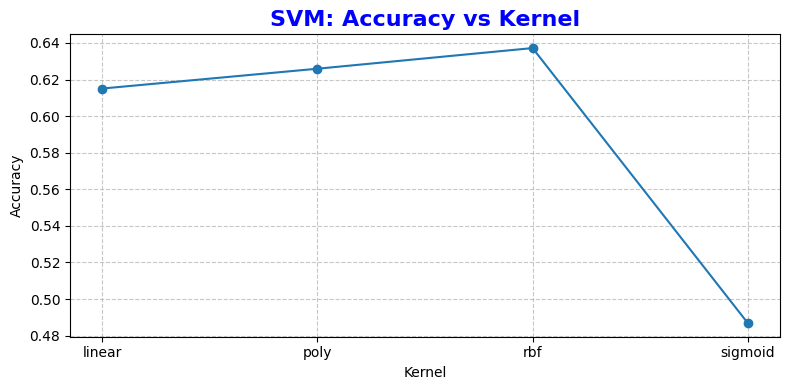

In [ ]:
# Plot Accuracy vs Kernel
plt.figure(figsize=(8, 4))

plt.plot(results_df['Kernel'], results_df['Accuracy'], marker='o', linestyle='-')

plt.title('SVM: Accuracy vs Kernel', fontsize=16, weight='bold', color='blue')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# <font color="blue">**PHASE 4**

## Load scaled Dataframe

## Split Dataset

# Ensemble Learning

## Imports

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


Training model: Bagging...
Model: Bagging
Accuracy: 0.6597, Precision: 0.6606, Recall: 0.6597, F1 Score: 0.6498



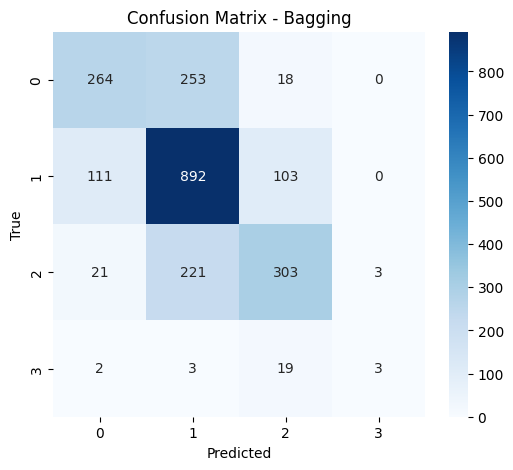

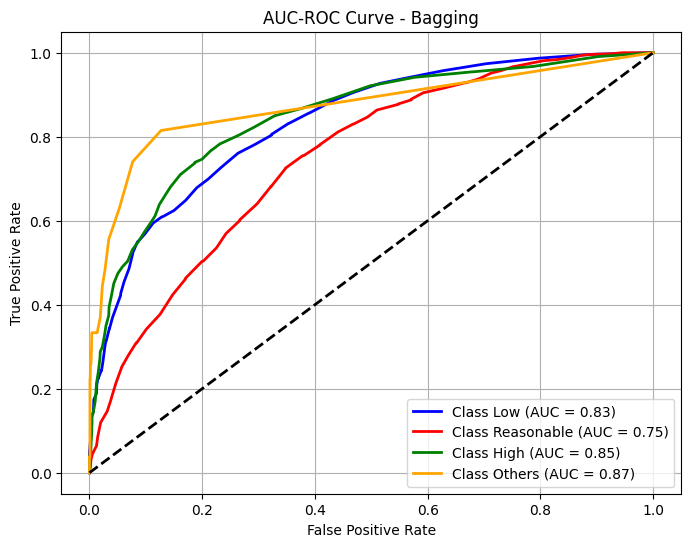

Training model: RandomForest...
Model: RandomForest
Accuracy: 0.6512, Precision: 0.6594, Recall: 0.6512, F1 Score: 0.6313



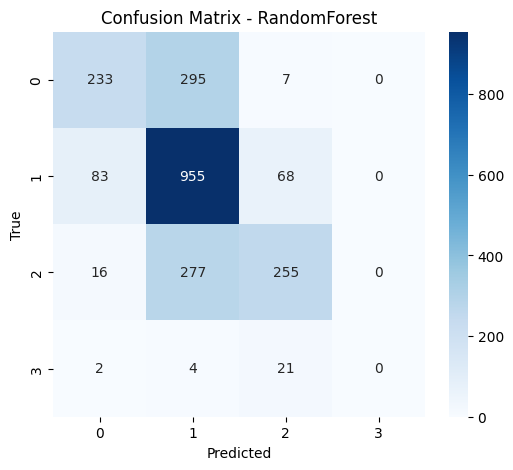

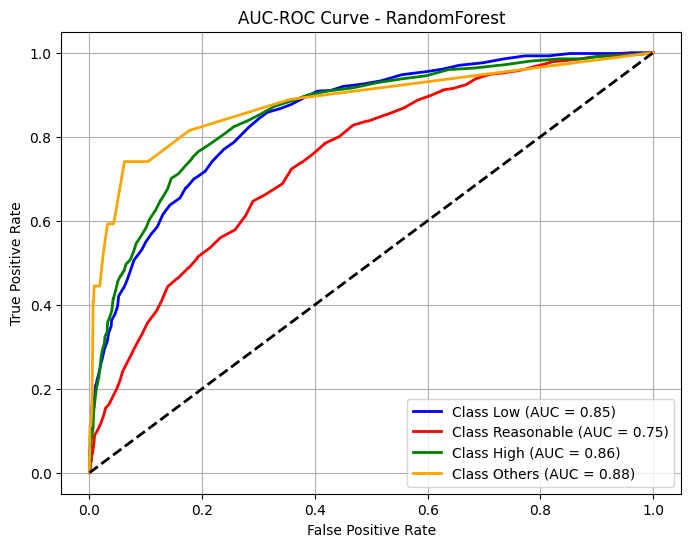

Training model: AdaBoost...
Model: AdaBoost
Accuracy: 0.5903, Precision: 0.5849, Recall: 0.5903, F1 Score: 0.5773



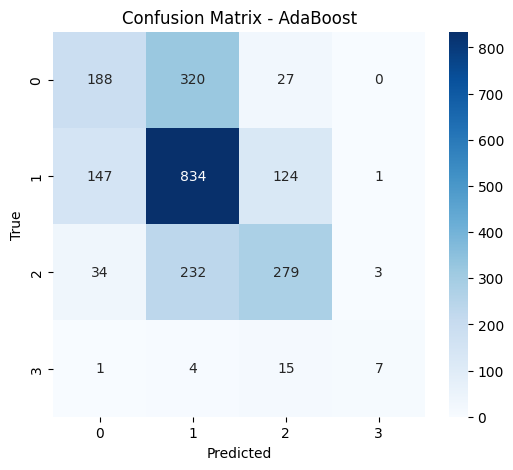

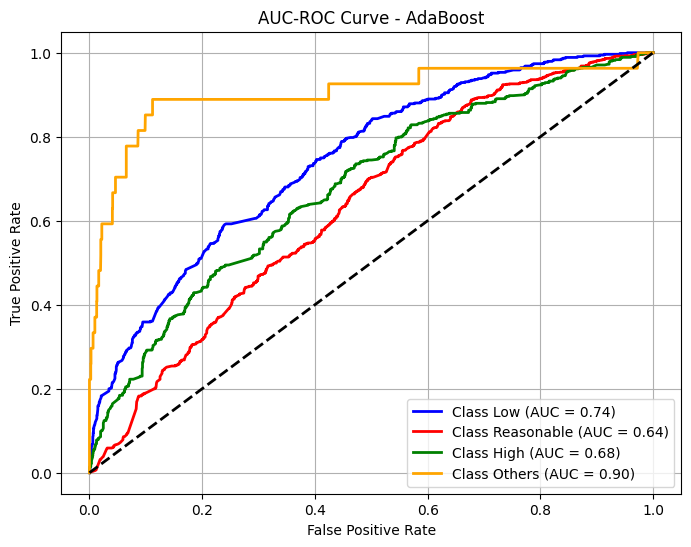

Training model: GradientBoosting...
Model: GradientBoosting
Accuracy: 0.6412, Precision: 0.6426, Recall: 0.6412, F1 Score: 0.6288



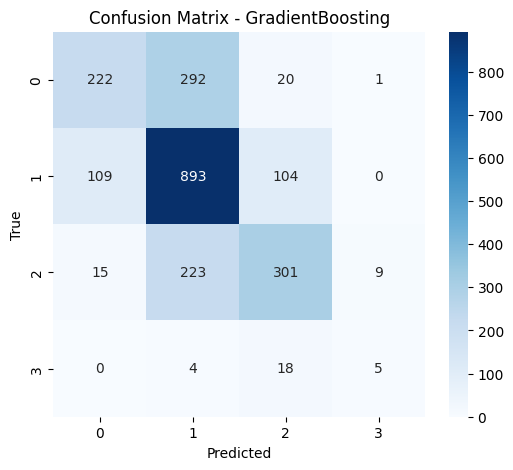

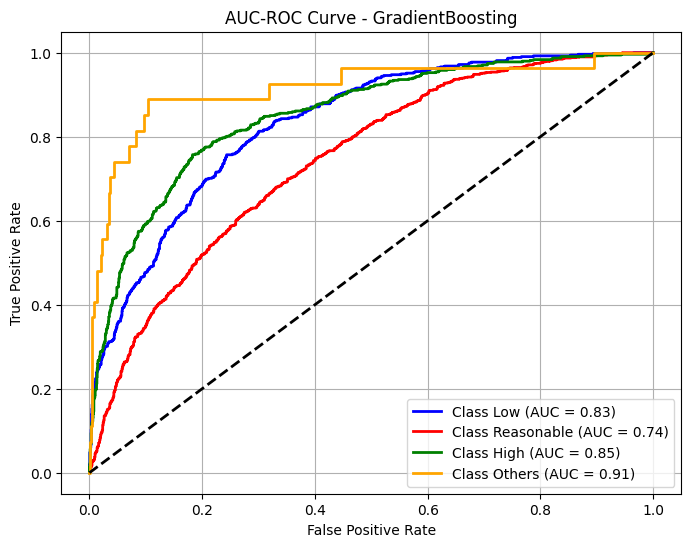

Training model: XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.6584, Precision: 0.6601, Recall: 0.6584, F1 Score: 0.6506



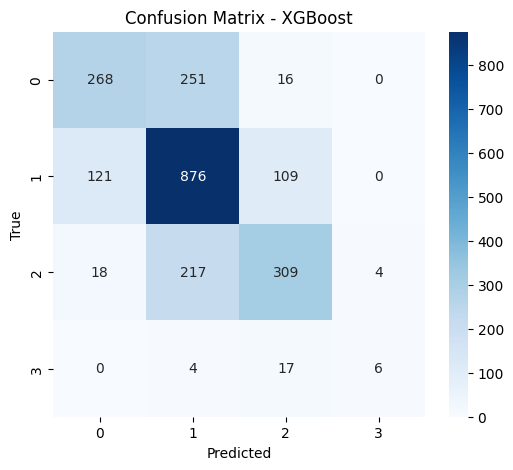

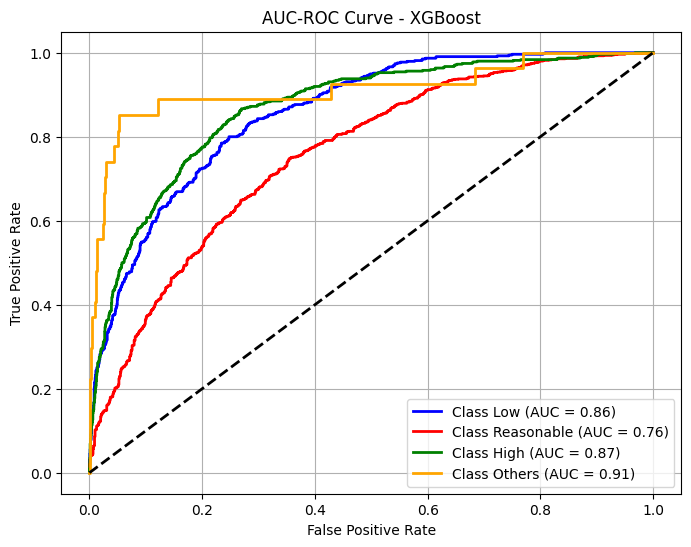

Training model: LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 8863, number of used features: 241
[LightGBM] [Info] Start training from score -1.376750
[LightGBM] [Info] Start training from score -0.692132
[LightGBM] [Info] Start training from score -1.437095
[LightGBM] [Info] Start training from score -4.658824


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Model: LightGBM
Accuracy: 0.6602, Precision: 0.6617, Recall: 0.6602, F1 Score: 0.6536



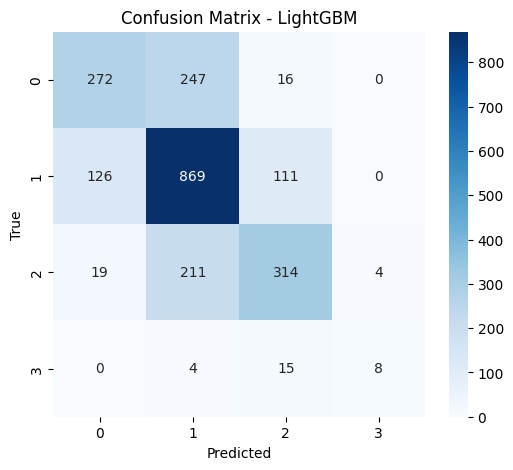

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


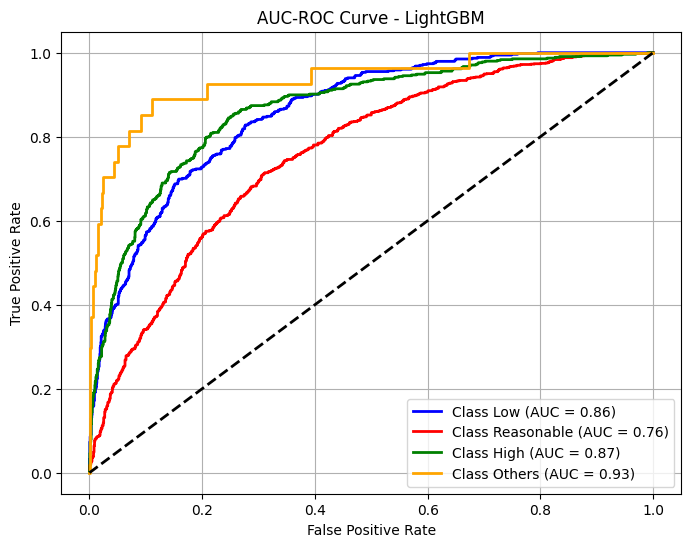

Training model: CatBoost...
Model: CatBoost
Accuracy: 0.6480, Precision: 0.6479, Recall: 0.6480, F1 Score: 0.6410



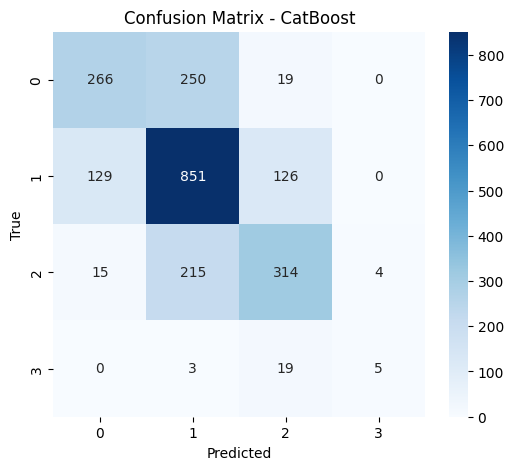

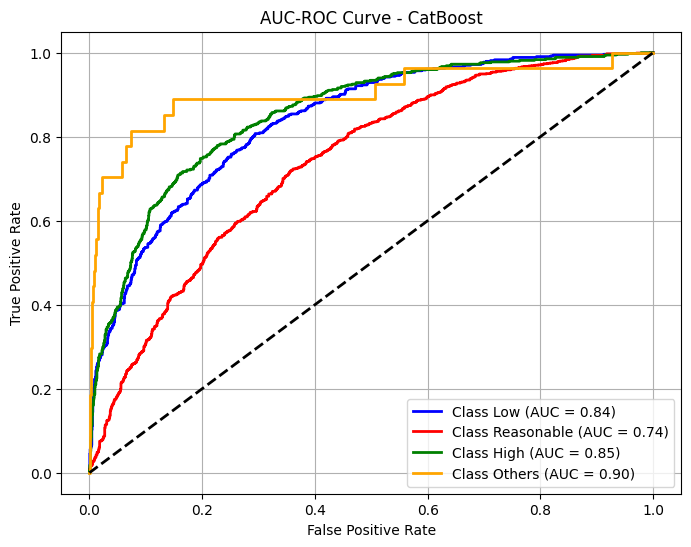

Training model: VotingClassifier (soft)...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 8863, number of used features: 241
[LightGBM] [Info] Start training from score -1.376750
[LightGBM] [Info] Start training from score -0.692132
[LightGBM] [Info] Start training from score -1.437095
[LightGBM] [Info] Start training from score -4.658824


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Model: VotingClassifier (soft)
Accuracy: 0.6706, Precision: 0.6760, Recall: 0.6706, F1 Score: 0.6606



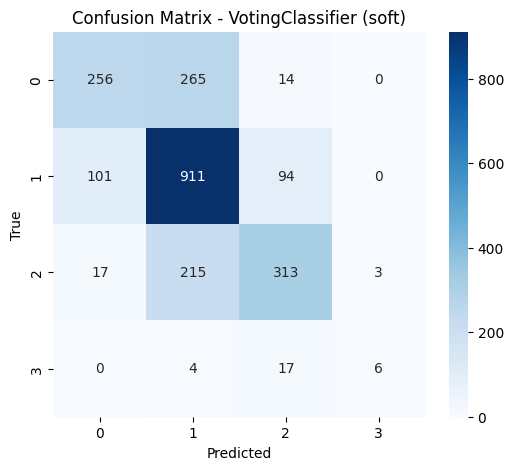

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


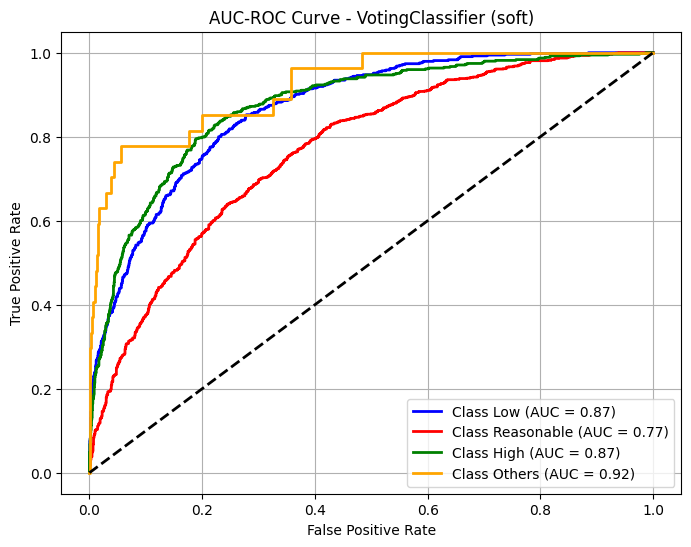

                     Model  Accuracy  Precision    Recall  F1 Score
0                  Bagging  0.659747   0.660572  0.659747  0.649816
1             RandomForest  0.651173   0.659401  0.651173  0.631253
2                 AdaBoost  0.590253   0.584927  0.590253  0.577287
3         GradientBoosting  0.641245   0.642637  0.641245  0.628802
4                  XGBoost  0.658394   0.660054  0.658394  0.650627
5                 LightGBM  0.660199   0.661741  0.660199  0.653580
6                 CatBoost  0.648014   0.647859  0.648014  0.640957
7  VotingClassifier (soft)  0.670578   0.676029  0.670578  0.660646


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define your features and targets (already prepared by you earlier)
X_category = heatmap_scaled_df_filtered.drop(
    ['price', 'price_category', 'price_price_low', 'price_price_reasonable',
     'price_price_high', 'price_price_others'],
    axis=1
)

# Fix feature names for LightGBM compatibility
X_category.columns = X_category.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

y_one_hot = heatmap_scaled_df_filtered[
    ['price_price_low', 'price_price_reasonable', 'price_price_high', 'price_price_others']
]
y_category = np.argmax(y_one_hot.values, axis=1)

X_train_category, X_test_category, y_train_category, y_test_category = train_test_split(
    X_category, y_category, test_size=0.2, random_state=42
)

# Initialize the results list
ensemble_results = []

# Function to evaluate a model with metrics, plot confusion matrix, and plot ROC curve
def evaluate_ensemble_model(model, model_name):
    print(f"Training model: {model_name}...")
    # Convert DataFrame to NumPy array for training
    model.fit(X_train_category.values, y_train_category)

    # Convert DataFrame to NumPy array for prediction
    y_pred = model.predict(X_test_category.values)

    accuracy = accuracy_score(y_test_category, y_pred)
    precision = precision_score(y_test_category, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_category, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_category, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test_category, y_pred)

    ensemble_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    })

    print(f"Model: {model_name}\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC Curve (for multi-class classification)
    y_test_bin = label_binarize(y_test_category, classes=[0, 1, 2, 3])
    # Convert DataFrame to NumPy array for probability prediction
    y_score = model.predict_proba(X_test_category.values)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test_bin.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'orange']
    class_names = ['Low', 'Reasonable', 'High', 'Others']

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"AUC-ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Instantiate ensemble models
models = [
    (BaggingClassifier(n_estimators=50, random_state=42), "Bagging"),
    (RandomForestClassifier(n_estimators=100, random_state=42), "RandomForest"),
    (AdaBoostClassifier(n_estimators=100, random_state=42), "AdaBoost"),
    (GradientBoostingClassifier(n_estimators=100, random_state=42), "GradientBoosting"),
    (XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42), "XGBoost"),
    (LGBMClassifier(n_estimators=100, random_state=42), "LightGBM"),
    (CatBoostClassifier(n_estimators=100, verbose=0, random_state=42), "CatBoost"),
]

# Evaluate each ensemble model
for model, name in models:
    evaluate_ensemble_model(model, name)

# Voting Classifier (combining multiple models)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
        ('lgb', LGBMClassifier(n_estimators=100, random_state=42))
    ],
    voting='soft'
)
evaluate_ensemble_model(voting_clf, "VotingClassifier (soft)")

# Convert results to DataFrame for visualization
ensemble_results_df = pd.DataFrame(ensemble_results)
print(ensemble_results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])

## Stacking

### Hold Out Stacking

Split dataset for base and meta model



In [ ]:
# Split training data for Hold-Out Stacking for InjuryType
X_train_base, X_valid_meta, y_train_base, y_valid_meta = train_test_split(
    X_train_category, y_train_category, test_size=0.2, random_state=42
)

Function

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: Hold-Out Stacking for Price Category
Accuracy: 0.6579, Precision: 0.6566, Recall: 0.6579, F1 Score: 0.6455



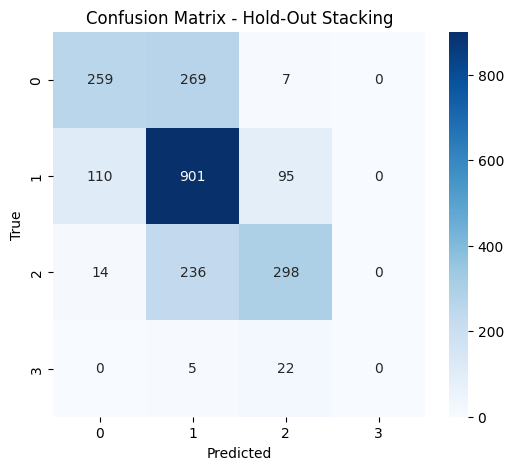

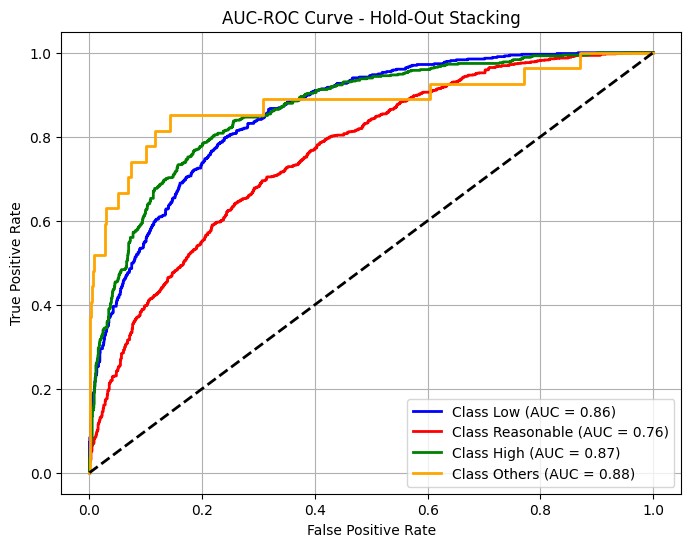

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

def hold_out_stacking():
    # Converting pandas DataFrames to NumPy arrays
    X_train_base_np = X_train_base.values
    X_valid_meta_np = X_valid_meta.values
    X_test_np = X_test_category.values

    random_forest = RandomForestClassifier(random_state=42)
    xgboost = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    adaboost = AdaBoostClassifier(random_state=42)

    # Creating meta-features using predicted probabilities from base models
    meta_features = []
    for name, model in [('Random Forest', random_forest), ('XGBoost', xgboost), ('AdaBoost', adaboost)]:
        # Train the base model
        model.fit(X_train_base_np, y_train_base)
        # Generate predictions for the validation set
        meta_features.append(model.predict_proba(X_valid_meta_np))

    # Stack the probability vectors horizontally
    meta_features = np.hstack(meta_features)

    # Train the meta-model (Logistic Regression)
    meta_model = LogisticRegression(random_state=42, max_iter=500)
    meta_model.fit(meta_features, y_valid_meta)

    # Creating test meta-features using predicted probabilities
    test_meta_features = []
    for model in [random_forest, xgboost, adaboost]:
        test_meta_features.append(model.predict_proba(X_test_np))
    test_meta_features = np.hstack(test_meta_features)

    # Predict using the meta-model
    y_pred_meta = meta_model.predict(test_meta_features)

    # Evaluate the model
    accuracy = accuracy_score(y_test_category, y_pred_meta)
    precision = precision_score(y_test_category, y_pred_meta, average='weighted', zero_division=0)
    recall = recall_score(y_test_category, y_pred_meta, average='weighted', zero_division=0)
    f1 = f1_score(y_test_category, y_pred_meta, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test_category, y_pred_meta)

    # Print evaluation metrics
    print(f"Model: Hold-Out Stacking for Price Category\n"
          f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix - Hold-Out Stacking")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC Curve for multiclass classification
    y_test_bin = label_binarize(y_test_category, classes=[0, 1, 2, 3])
    y_score = meta_model.predict_proba(test_meta_features)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test_bin.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'orange']
    class_names = ['Low', 'Reasonable', 'High', 'Others']  # Adjust based on your categories

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC-ROC Curve - Hold-Out Stacking")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Run the function
hold_out_stacking()

### K-Fold Stacking

Model: K-Fold Stacking for Price Category
Accuracy: 0.6742, Precision: 0.6825, Recall: 0.6742, F1 Score: 0.6642



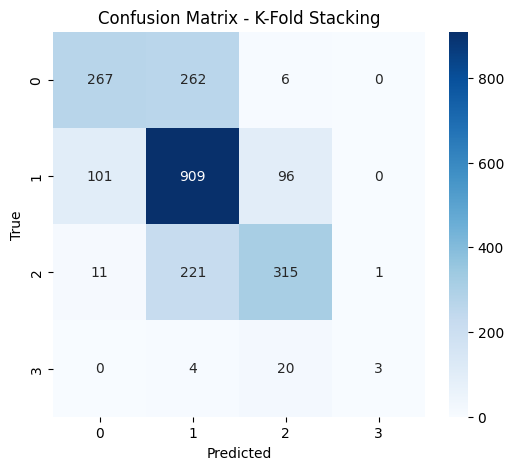

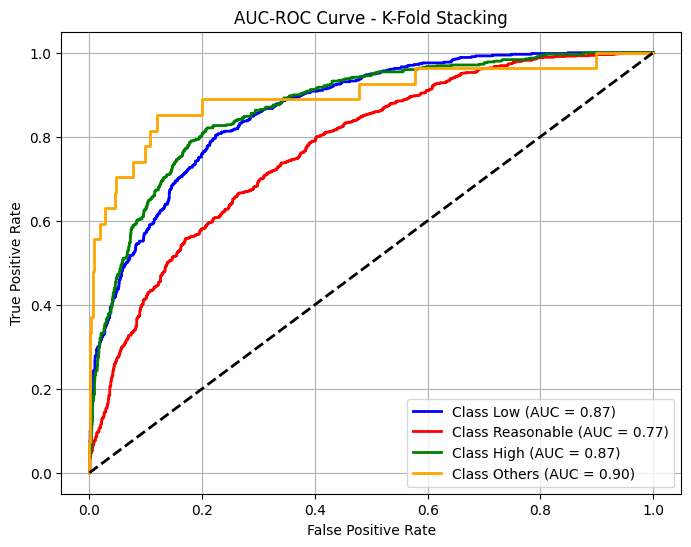

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier

def k_fold_stacking(X_train_category, y_train_category, X_test_category, y_test_category):
    """
    Implements k-fold stacking with 5 folds using RandomForest, XGBoost, and AdaBoost as base models,
    and LogisticRegression as the meta-model. Evaluates performance with metrics and plots.

    Parameters:
    - X_train_category: Training features (DataFrame)
    - y_train_category: Training labels (array-like)
    - X_test_category: Test features (DataFrame)
    - y_test_category: Test labels (array-like)
    """
    # Set parameters
    k = 5
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Convert DataFrames to NumPy arrays for compatibility
    X_train_np = X_train_category.values
    X_test_np = X_test_category.values
    y_train = np.array(y_train_category)
    y_test = np.array(y_test_category)

    # Determine dimensions
    n_train = X_train_np.shape[0]
    n_test = X_test_np.shape[0]
    n_classes = len(np.unique(y_train))

    # Initialize meta-feature arrays for 3 base models
    train_meta_list = [np.zeros((n_train, n_classes)) for _ in range(3)]
    test_meta_list = [np.zeros((n_test, n_classes)) for _ in range(3)]

    # K-fold cross-validation loop
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_np)):
        # Initialize base models
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')
        ada = AdaBoostClassifier(n_estimators=100, random_state=42)

        # Train base models on k-1 folds
        rf.fit(X_train_np[train_idx], y_train[train_idx])
        xgb.fit(X_train_np[train_idx], y_train[train_idx])
        ada.fit(X_train_np[train_idx], y_train[train_idx])

        # Generate out-of-fold predictions for training meta-features
        train_meta_list[0][val_idx] = rf.predict_proba(X_train_np[val_idx])
        train_meta_list[1][val_idx] = xgb.predict_proba(X_train_np[val_idx])
        train_meta_list[2][val_idx] = ada.predict_proba(X_train_np[val_idx])

        # Generate test predictions (averaged over k folds)
        test_meta_list[0] += rf.predict_proba(X_test_np) / k
        test_meta_list[1] += xgb.predict_proba(X_test_np) / k
        test_meta_list[2] += ada.predict_proba(X_test_np) / k

    # Stack meta-features horizontally
    train_meta = np.hstack(train_meta_list)
    test_meta = np.hstack(test_meta_list)

    # Train meta-model
    meta_model = LogisticRegression(random_state=42, max_iter=500)
    meta_model.fit(train_meta, y_train)

    # Predict on test set
    y_pred_meta = meta_model.predict(test_meta)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_meta)
    precision = precision_score(y_test, y_pred_meta, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred_meta, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred_meta, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred_meta)

    # Print results
    print(f"Model: K-Fold Stacking for Price Category\n"
          f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix - K-Fold Stacking")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Plot ROC curves
    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    y_score = meta_model.predict_proba(test_meta)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'orange'][:n_classes]
    class_names = ['Low', 'Reasonable', 'High', 'Others'][:n_classes]
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC-ROC Curve - K-Fold Stacking")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

k_fold_stacking(X_train_category, y_train_category, X_test_category, y_test_category)

# Advanced Ensemble Learning with Grid Search for hyperparameter tuning

## Grid Search Function

**NOTE** : SESSION EXPIRED IN COLAB, TAKES TOO MUCH TIME !

TO SEE THE COMPLETE RESULTS RUN ON GPU LOCALLY

Tuning hyperparameters for: Random Forest
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Model: Random Forest
Accuracy: 0.6358, Precision: 0.6449, Recall: 0.6358, F1 Score: 0.6122



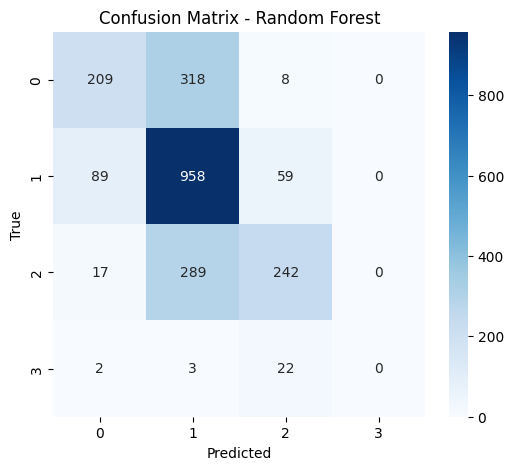

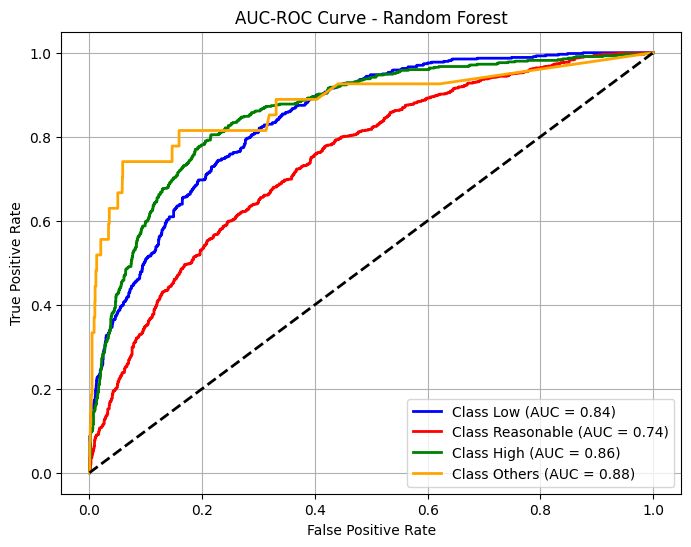

Tuning hyperparameters for: AdaBoost
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 100}
Model: AdaBoost
Accuracy: 0.5903, Precision: 0.5849, Recall: 0.5903, F1 Score: 0.5773



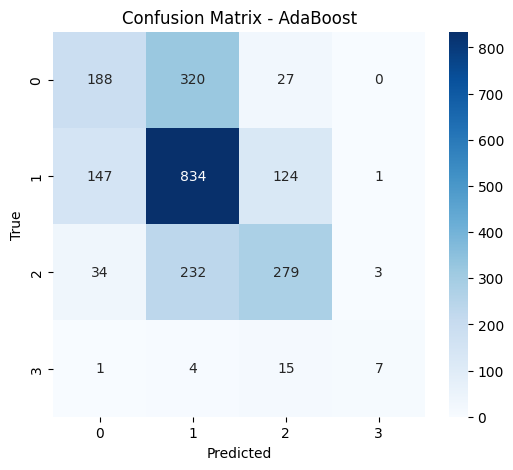

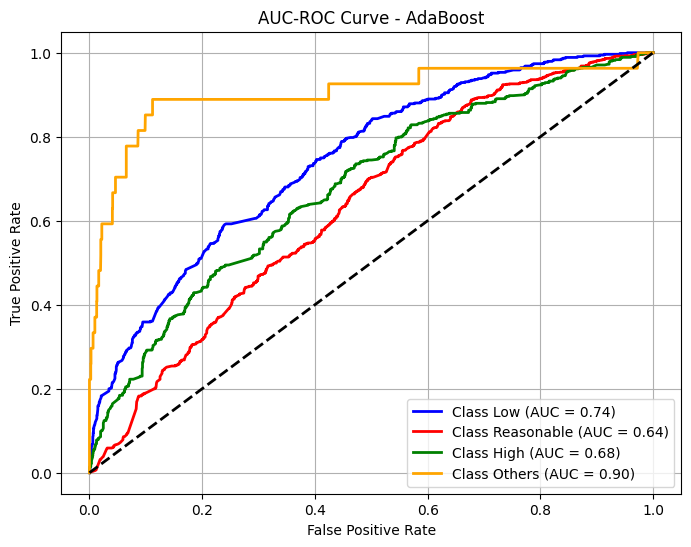

Tuning hyperparameters for: Gradient Boosting
Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
# Define a function for grid search and evaluation
def grid_search_and_evaluate(model, model_name, param_grid):
    print(f"Tuning hyperparameters for: {model_name}")

    # Convert DataFrame to NumPy array if necessary
    X_train = X_train_category.values
    y_train = y_train_category
    X_test = X_test_category.values
    y_test = y_test_category

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # Predict on test set
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {model_name}\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC Curve for multiclass classification
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust classes based on your labels
    y_score = best_model.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test_bin.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'orange']
    class_names = ['Low', 'Reasonable', 'High', 'Others']  # Adjust based on your categories

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"AUC-ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return best_model

# Define hyperparameter grids for each model
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.5, 1.0]},
    'Gradient Boosting': {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]},
    'XGBoost': {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.1, 0.2]},
    'LightGBM': {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'num_leaves': [31, 50]},
    'CatBoost': {'iterations': [50, 100], 'depth': [3, 5], 'learning_rate': [0.05, 0.1]},
}

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
}

# Perform grid search and evaluation for each model
best_models = {}
for model_name, model in models.items():
    best_models[model_name] = grid_search_and_evaluate(model, model_name, param_grids[model_name])

# Feature Engineering

## Classification Goal

**Key Elements in the Code** <br>
1. **Feature Engineering and Preprocessing**:
   - **Polynomial Features**: Additional interaction terms are created, which can help capture non-linear relationships.
   - **Statistical Features**: Features such as mean, standard deviation, min, and max are computed for each row.
   - **Clustering Features**: Clustering labels are added as features (not standard in classification workflows, but it could help if clusters have meaningful relations to the target variable).
   - **Outlier Detection**: Isolation Forest is used to identify and flag outliers.
   - **Scaling**: StandardScaler is applied for normalization, essential for most machine learning algorithms.

2. **Feature Selection and Dimensionality Reduction**:
   - **Variance Thresholding**: Removes features with very low variance.
   - **Correlation-Based Feature Removal**: Removes highly correlated features.
   - **PCA**: Further reduces dimensions based on explained variance.

3. **Classification**:
   - A **Decision Tree Classifier** is trained on the processed dataset.
   - **Hyperparameter Tuning**: Models are evaluated for different `max_depth` values.
   - **Evaluation Metrics**: Accuracy, precision, recall, F1-score, and confusion matrix are calculated.

4. **Imbalanced Data Handling**:
   - The use of `class_weight='balanced'` in the Decision Tree suggests the code considers potential class imbalance.

5. **Visualization**:
   - Confusion matrices and accuracy trends are plotted to understand model performance.


- The `stratify` parameter for `train_test_split` is used, ensuring class distribution remains consistent in train and test splits.
- The dataset undergoes significant dimensionality expansion with polynomial features, which might introduce noise. This is mitigated by PCA and variance thresholding.


## Feature Engineering

In [96]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

In [97]:
heatmap_scaled_df_filtered.isna().sum()

rating                    0
reviews                   0
price                     0
bedrooms                  0
checkin_minutes           0
                         ..
price_category            0
price_price_low           0
price_price_reasonable    0
price_price_high          0
price_price_others        0
Length: 987, dtype: int64

In [98]:
df = heatmap_scaled_df_filtered.copy()

In [99]:
# Function to handle duplicate columns
def remove_duplicate_columns(df):
    if df.columns.duplicated().any():
        print("Duplicate columns detected. Removing duplicates.")
        df = df.loc[:, ~df.columns.duplicated()]
    return df

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold

# Define the function to add polynomial features
def add_polynomial_features(X, degree=1):
    poly = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)
    poly_features = poly.fit_transform(X)
    feature_names = poly.get_feature_names_out(X.columns)
    # Use the original index from X
    poly_df = pd.DataFrame(poly_features, columns=feature_names, index=X.index)

    # Handle any NaN or infinite values
    poly_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    poly_df.fillna(0, inplace=True)

    return poly_df

# Select numerical features
numerical_features = df.select_dtypes(include=[np.number])

# Check for duplicate columns in the original DataFrame and remove them
if numerical_features.columns.duplicated().any():
    print("Duplicate columns found:", numerical_features.columns[numerical_features.columns.duplicated()])
    numerical_features = numerical_features.loc[:, ~numerical_features.columns.duplicated()]

# Select a subset of features with high variance
N = 20
selector = VarianceThreshold(threshold=0.01)
selector.fit(numerical_features)
variances = selector.variances_
top_indices = np.argsort(variances)[-N:]
selected_columns = numerical_features.columns[top_indices]

# Generate interaction features for the selected subset
df_poly = add_polynomial_features(numerical_features[selected_columns], degree=2)

# Merge polynomial features back into the dataset
df = pd.concat([df, df_poly], axis=1)

# Remove duplicate columns if any
df = df.loc[:, ~df.columns.duplicated()]

# Select numerical features
numerical_features = df.select_dtypes(include=[np.number])

# Check for duplicate columns in the original DataFrame and remove them
if numerical_features.columns.duplicated().any():
    print("Duplicate columns found in original DataFrame:", numerical_features.columns[numerical_features.columns.duplicated()])
    numerical_features = numerical_features.loc[:, ~numerical_features.columns.duplicated()]

# Select a subset of features with high variance to limit the number of interaction terms
N = 20  # Adjust this number based on your memory constraints or dataset size
selector = VarianceThreshold(threshold=0.01)  # Optional: set a variance threshold
selector.fit(numerical_features)
variances = selector.variances_
top_indices = np.argsort(variances)[-N:]  # Get indices of top N features by variance
selected_columns = numerical_features.columns[top_indices]

# Generate interaction features for the selected subset
df_poly = add_polynomial_features(numerical_features[selected_columns], degree=2)

# Merge polynomial features back into the dataset
df = pd.concat([df, df_poly], axis=1)

# Remove duplicate columns if any (though unlikely with unique interaction names)
df = df.loc[:, ~df.columns.duplicated()]

In [101]:
df.head()

rating   reviews     price  bedrooms  checkin_minutes  checkout_minutes  \
1 -0.969636 -0.275862 -0.322177       0.5              1.6              -1.0   
2  0.012146  1.287356 -0.214460       0.0             -0.4               1.0   
3  0.042510  0.022989  0.219984       0.0             -0.2               1.0   
4 -0.969636 -0.275862 -0.159058       0.0             -0.2               1.0   
5 -0.969636 -0.275862  0.495370       0.0             -0.2               1.0   

   checkout_minutes_capped  amenity_100" HDTV with Amazon Prime Video  \
1                     -1.0                                          0   
2                      1.0                                          0   
3                      1.0                                          0   
4                      1.0                                          0   
5                      1.0                                          0   

   amenity_100" TV  amenity_100" TV with Chromecast  ...  \
1                0                                0  ...   
2                0                                0  ...   
3                0                                0  ...   
4                0                                0  ...   
5                0                                0  ...   

   checkin_minutes price city_encoded price  \
1                                  0.445785   
2                                  0.001937   
3                                 -0.044318   
4                                 -0.023169   
5                                 -0.224727   

   checkin_minutes price host_listing_count city_encoded  \
1                                          -8.301995       
2                                          -0.000000       
3                                          -0.000000       
4                                           0.000000       
5                                          -0.453654       

   checkin_minutes price host_listing_count price  \
1                                        0.996462   
2                                       -0.000000   
3                                       -0.000000   
4                                       -0.000000   
5                                       -0.049078   

   checkin_minutes price bedrooms price  \
1                              0.083038   
2                             -0.000000   
3                             -0.000000   
4                             -0.000000   
5                             -0.000000   

   city_encoded price host_listing_count city_encoded  \
1                                         -13.927689    
2                                          -0.000000    
3                                           0.000000    
4                                          -0.000000    
5                                          10.386295    

   city_encoded price host_listing_count price  \
1                                     1.671695   
2                                    -0.000000   
3                                     0.000000   
4                                     0.000000   
5                                     1.123633   

   city_encoded price bedrooms price  \
1                           0.139308   
2                          -0.000000   
3                           0.000000   
4                           0.000000   
5                           0.000000   

   host_listing_count city_encoded host_listing_count price  \
1                                         -31.132481          
2                                           0.000000          
3                                           0.000000          
4                                          -0.000000          
5                                           2.268271          

   host_listing_count city_encoded bedrooms price  \
1                                       -2.594373   
2                                        0.000000   
3                                        0.000000   
4                         

In [102]:
df_poly.isna().sum()

name_word_count price                                       0
checkout_minutes_capped checkout_minutes                    0
hourse_ price                                               0
hourse_Show more price                                      0
checkin_minutes host_listing_count                          0
                                                           ..
city_encoded price host_listing_count price                 0
city_encoded price bedrooms price                           0
host_listing_count city_encoded host_listing_count price    0
host_listing_count city_encoded bedrooms price              0
host_listing_count price bedrooms price                     0
Length: 210, dtype: int64

In [103]:
df.isna().sum()

rating                                                      0
reviews                                                     0
price                                                       0
bedrooms                                                    0
checkin_minutes                                             0
                                                           ..
city_encoded price host_listing_count price                 0
city_encoded price bedrooms price                           0
host_listing_count city_encoded host_listing_count price    0
host_listing_count city_encoded bedrooms price              0
host_listing_count price bedrooms price                     0
Length: 1367, dtype: int64

In [105]:
# ==================================
# 2. Statistical Aggregates
# ==================================
import pandas as pd
import numpy as np

def add_statistical_features(X):
    # Select only numeric columns
    numeric_df = X.select_dtypes(include=[np.number])

    # Add statistical features based on numeric columns only
    X['feature_mean'] = numeric_df.mean(axis=1)
    X['feature_std'] = numeric_df.std(axis=1)
    X['feature_min'] = numeric_df.min(axis=1)
    X['feature_max'] = numeric_df.max(axis=1)

    # Fill NaNs only in the newly added numeric columns
    new_cols = ['feature_mean', 'feature_std', 'feature_min', 'feature_max']
    X[new_cols] = X[new_cols].fillna(0)

    return X

# Apply the function to your DataFrame
df = add_statistical_features(df)

# Handle duplicates after statistical features (assuming this function exists)
df = remove_duplicate_columns(df)

In [106]:
# ==================================
# 3. Clustering Features
# ==================================
def add_clustering_features(X, n_clusters=5):
    # Handle any potential issues with NaNs
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(0, inplace=True)

    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    X['cluster'] = clusters
    return X

# Ensure only numerical columns are passed to clustering
numerical_features = df.select_dtypes(include=[np.number])
df = add_clustering_features(numerical_features)

# Handle duplicates after clustering features
df = remove_duplicate_columns(df)

In [107]:
# ==================================
# 4. Outlier Handling with Isolation Forest
# ==================================
def handle_outliers(X):
    iso = IsolationForest(contamination=0.05, random_state=42)
    outliers = iso.fit_predict(X)
    X['is_outlier'] = (outliers == -1).astype(int)  # Mark outliers as 1
    return X

df = handle_outliers(df)

# Handle duplicates after outlier handling
df = remove_duplicate_columns(df)

In [108]:
# ==================================
# 5. Scaling (Final Step for ML Compatibility)
# ==================================
scaler = StandardScaler()

# Select numerical columns for scaling
numerical_columns = df.select_dtypes(include=[np.number])

# Scale the data
scaled_features = scaler.fit_transform(numerical_columns)

# Create a DataFrame for scaled features
df_scaled = pd.DataFrame(scaled_features, columns=numerical_columns.columns)

# Combine scaled numerical data with original non-numerical features
df_final = pd.concat([df_scaled, df.select_dtypes(exclude=[np.number])], axis=1)

# Handle duplicates after final scaling
df_final = remove_duplicate_columns(df_final)

## Featured DF Summary

In [109]:
# ==================================
# Summary of Transformed Data
# ==================================
print("Transformed DataFrame:")
df_final.head()

Transformed DataFrame:


rating   reviews     price  bedrooms  checkin_minutes  checkout_minutes  \
0 -1.481018 -0.557627 -0.292161 -0.047177         1.480449         -0.761833   
1  0.670126  0.434362 -0.264126 -0.486765        -0.511353          0.827686   
2  0.736657 -0.367982 -0.151056 -0.486765        -0.312173          0.827686   
3 -1.481018 -0.557627 -0.249707 -0.486765        -0.312173          0.827686   
4 -1.481018 -0.557627 -0.079382 -0.486765        -0.312173          0.827686   

   checkout_minutes_capped  amenity_100" HDTV with Amazon Prime Video  \
0                -1.239728                                  -0.009501   
1                 1.333082                                  -0.009501   
2                 1.333082                                  -0.009501   
3                 1.333082                                  -0.009501   
4                 1.333082                                  -0.009501   

   amenity_100" TV  amenity_100" TV with Chromecast  ...  \
0        -0.009501                        -0.009501  ...   
1        -0.009501                        -0.009501  ...   
2        -0.009501                        -0.009501  ...   
3        -0.009501                        -0.009501  ...   
4        -0.009501                        -0.009501  ...   

   city_encoded price bedrooms price  \
0                          -0.028679   
1                          -0.028914   
2                          -0.028914   
3                          -0.028914   
4                          -0.028914   

   host_listing_count city_encoded host_listing_count price  \
0                                          -0.661407          
1                                          -0.031121          
2                                          -0.031121          
3                                          -0.031121          
4                                           0.014800          

   host_listing_count city_encoded bedrooms price  \
0                                       -0.179262   
1                                       -0.052170   
2                                       -0.052170   
3                                       -0.052170   
4                                       -0.052170   

   host_listing_count price bedrooms price  feature_mean  feature_std  \
0                                -0.021979     -0.023300    -0.008767   
1                                -0.022060     -0.032975    -0.040667   
2                                -0.022060     -0.029917    -0.039434   
3                                -0.022060     -0.028735    -0.038925   
4                                -0.022060     -0.025803    -0.036538   

   feature_min  feature_max   cluster  is_outlier  
0     0.012691     0.006814 -0.017348   -0.229427  
1     0.041037    -0.032835 -0.017348   -0.229427  
2     0.039921    -0.032004 -0.017348   -0.229427  
3     0.039921    -0.032012 -0.017348   -0.229427  
4     0.040704    -0.027771 -0.017348   -0.229427  

[5 rows x 1368 columns]

In [110]:
print(df_final.columns)

Index(['rating', 'reviews', 'price', 'bedrooms', 'checkin_minutes',
       'checkout_minutes', 'checkout_minutes_capped',
       'amenity_100" HDTV with Amazon Prime Video', 'amenity_100" TV',
       'amenity_100" TV with Chromecast',
       ...
       'city_encoded price bedrooms price',
       'host_listing_count city_encoded host_listing_count price',
       'host_listing_count city_encoded bedrooms price',
       'host_listing_count price bedrooms price', 'feature_mean',
       'feature_std', 'feature_min', 'feature_max', 'cluster', 'is_outlier'],
      dtype='object', length=1368)


# Train and Test Models for InjuryType

## Imports

In [111]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.calibration import CalibratedClassifierCV
import warnings
from sklearn.exceptions import ConvergenceWarning

## Split

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# Assuming heatmap_scaled_df_filtered is your DataFrame (equivalent to df_final)
df_final = heatmap_scaled_df_filtered.copy()

# Step 1: Load Dataset
target_column = 'price_category'

# Define features and target
X = df_final.drop(columns=[target_column, 'price', 'price_price_low', 'price_price_reasonable',
                           'price_price_high', 'price_price_others'])
y = df_final[target_column]  # y is a Series, already categorical

# Check for stratification
stratify = y if len(y.unique()) > 2 else None

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify
)

# Step 2: Variance Thresholding
def variance_thresholding(df, threshold=0.01):
    selector = VarianceThreshold(threshold=threshold)
    reduced_data = selector.fit_transform(df)
    selected_columns = df.columns[selector.get_support()]
    return pd.DataFrame(reduced_data, columns=selected_columns, index=df.index), selector

# Apply to training data
X_train_reduced, var_thresh_selector = variance_thresholding(X_train)

# Apply to test data
X_test_reduced = var_thresh_selector.transform(X_test)
X_test_reduced = pd.DataFrame(X_test_reduced, columns=X_train_reduced.columns, index=X_test.index)

# Step 3: Correlation-Based Removal
def remove_high_correlation(df, threshold=0.95):
    correlation_matrix = df.corr().abs()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return df.drop(columns=to_drop)

# Apply to training data
X_train_reduced = remove_high_correlation(X_train_reduced)

# Align test data
X_test_reduced = X_test_reduced[X_train_reduced.columns]

# Step 4: PCA for Dimensionality Reduction
def apply_pca(df, variance_threshold=0.95):
    pca = PCA(n_components=variance_threshold, random_state=42)
    pca_features = pca.fit_transform(df)
    columns = [f'PC{i+1}' for i in range(pca.n_components_)]
    return pd.DataFrame(pca_features, columns=columns, index=df.index), pca

# Apply to training data
X_train_pca, pca_model = apply_pca(X_train_reduced)

# Apply to test data
X_test_pca = pca_model.transform(X_test_reduced)
X_test_pca = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])], index=X_test_reduced.index)

# Step 5: Summary and Diagnostics
print("Initial Columns:", X.shape[1])
print("After Variance Thresholding:", X_train_reduced.shape[1])
print("After Correlation Removal:", X_train_reduced.shape[1])
print("After PCA Reduction:", X_train_pca.shape[1])

# Verify target values
print(f"Unique target values in y_train: {y_train.unique()}")
print(f"Unique target values in y_test: {y_test.unique()}")

Initial Columns: 981
After Variance Thresholding: 130
After Correlation Removal: 130
After PCA Reduction: 65
Unique target values in y_train: ['price_low', 'price_others', 'price_reasonable', 'price_high']
Categories (4, object): ['price_low' < 'price_reasonable' < 'price_high' < 'price_others']
Unique target values in y_test: ['price_low', 'price_high', 'price_reasonable', 'price_others']
Categories (4, object): ['price_low' < 'price_reasonable' < 'price_high' < 'price_others']


###TRAINING THE ANN

In [123]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming heatmap_scaled_df_filtered is already loaded

# Features (drop all price-related columns not needed for X)
X_category = heatmap_scaled_df_filtered.drop(
    ['price', 'price_category', 'price_price_low', 'price_price_reasonable',
     'price_price_high', 'price_price_others'],
    axis=1
)

# Target (one-hot encoded price categories)
y_one_hot = heatmap_scaled_df_filtered[
    ['price_price_low', 'price_price_reasonable', 'price_price_high', 'price_price_others']
]

# Convert one-hot encoded target to integer labels (0, 1, 2, 3) for the model
y_category = np.argmax(y_one_hot.values, axis=1)

# Split into train (80%) and test (20%) sets with stratification
X_train_category, X_test_category, y_train_category, y_test_category = train_test_split(
    X_category, y_category, test_size=0.2, random_state=42, stratify=y_category
)

# Scale the features (explicitly, even if already scaled, for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_category)
X_test_scaled = scaler.transform(X_test_category)

# Convert back to DataFrame for compatibility with feature processing functions
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_category.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_category.columns)

# Step 1: Variance Thresholding
def variance_thresholding(df, threshold=0.01):
    selector = VarianceThreshold(threshold=threshold)
    reduced_data = selector.fit_transform(df)
    selected_columns = df.columns[selector.get_support()]
    return pd.DataFrame(reduced_data, columns=selected_columns), selector

# Apply variance thresholding to training data
X_train_reduced, var_thresh_selector = variance_thresholding(X_train_scaled)
X_test_reduced = var_thresh_selector.transform(X_test_scaled)
X_test_reduced = pd.DataFrame(X_test_reduced, columns=X_train_reduced.columns)

# Step 2: Correlation-Based Removal
def remove_high_correlation(df, threshold=0.95):
    correlation_matrix = df.corr().abs()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return df.drop(columns=to_drop)

# Remove highly correlated features in training data
X_train_reduced = remove_high_correlation(X_train_reduced)
X_test_reduced = X_test_reduced[X_train_reduced.columns]

# Step 3: PCA for Dimensionality Reduction
def apply_pca(df, variance_threshold=0.95):
    pca = PCA(n_components=variance_threshold, random_state=42)
    pca_features = pca.fit_transform(df)
    columns = [f'PC{i+1}' for i in range(pca.n_components_)]
    return pd.DataFrame(pca_features, columns=columns), pca

# Apply PCA to training data
X_train_pca, pca_model = apply_pca(X_train_reduced)
X_test_pca = pca_model.transform(X_test_reduced)
X_test_pca = pd.DataFrame(X_test_pca, columns=X_train_pca.columns)

# Step 4: Summary and Diagnostics
print("\nFeature Reduction Summary:")
print("=" * 50)
print(f"Initial Columns: {X_category.shape[1]}")
print(f"After Variance Thresholding: {X_train_reduced.shape[1]}")
print(f"After Correlation Removal: {X_train_reduced.shape[1]}")
print(f"After PCA Reduction: {X_train_pca.shape[1]}")
print("=" * 50)

# Print the size and shapes of the processed sets
print("\nProcessed Data Sizes:")
print("=" * 50)
print(f"{'Dataset':<15} {'Number of Rows':<20} {'Number of Features'}")
print("=" * 50)
print(f"{'Train set':<15} {X_train_pca.shape[0]:<20} {X_train_pca.shape[1]}")
print(f"{'Test set':<15} {X_test_pca.shape[0]:<20} {X_test_pca.shape[1]}")
print("=" * 50)

print("\nProcessed Data Shapes:")
print("=" * 50)
print(f"{'Dataset':<15} {'Features (X)':<25} {'Labels (y)':<15}")
print("=" * 50)
print(f"{'Train set':<15} {str(X_train_pca.shape):<25} {str(y_train_category.shape):<15}")
print(f"{'Test set':<15} {str(X_test_pca.shape):<25} {str(y_test_category.shape):<15}")
print("=" * 50)

# Build a custom ANN model
def build_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # 4 output classes to match the target

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and evaluate ANN model
def train_and_evaluate_ann(X_train, y_train, X_test, y_test, epochs=100, batch_size=32):
    input_dim = X_train.shape[1]
    model = build_ann_model(input_dim)

    # Early stopping to prevent overfitting and optimize performance
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
              validation_split=0.1, callbacks=[early_stopping], verbose=1)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    cm = confusion_matrix(y_test, y_pred_classes)

    # Print results
    print(f"\nModel Performance Metrics:")
    print("=" * 50)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("=" * 50)

    return model, accuracy, precision, recall, f1, cm, y_pred

# Train and evaluate the model using PCA-transformed data
model, accuracy, precision, recall, f1, cm, y_pred = train_and_evaluate_ann(
    X_train_pca, y_train_category, X_test_pca, y_test_category
)


Feature Reduction Summary:
Initial Columns: 981
After Variance Thresholding: 891
After Correlation Removal: 891
After PCA Reduction: 762

Processed Data Sizes:
Dataset         Number of Rows       Number of Features
Train set       8863                 762
Test set        2216                 762

Processed Data Shapes:
Dataset         Features (X)              Labels (y)     
Train set       (8863, 762)               (8863,)        
Test set        (2216, 762)               (2216,)        


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.4520 - loss: 1.2506 - val_accuracy: 0.5423 - val_loss: 1.0024
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5799 - loss: 0.9463 - val_accuracy: 0.5908 - val_loss: 0.9124
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6195 - loss: 0.8462 - val_accuracy: 0.6032 - val_loss: 0.8922
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6613 - loss: 0.7574 - val_accuracy: 0.6122 - val_loss: 0.8820
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6751 - loss: 0.7295 - val_accuracy: 0.6246 - val_loss: 0.8845
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6792 - loss: 0.7201 - val_accuracy: 0.6223 - val_loss: 0.8954
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6946 - loss: 0.6852 - val_accuracy: 0.6212 - val_loss: 0.9005
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7044 - loss: 0.6788 - val_acc

## Train with DT

In [124]:
from sklearn.tree import DecisionTreeClassifier
# Function to train, test, and evaluate a Decision Tree model
def train_evaluate_decision_tree(X_train, y_train, X_test, y_test, max_depth):
    # Initialize the model with class_weight='balanced' to handle class imbalance
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Include all labels in the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_train))

    return accuracy, precision, recall, f1, cm

In [125]:
# Define max_depth values to evaluate
max_depths = [4, 5, 6, 7, 8, 9,]

# Store results in a list for easy formatting later
results = []

# Train and evaluate Decision Tree models for each max_depth
for max_depth in max_depths:
    print(f'Training Decision Tree model with max_depth={max_depth}...')
    accuracy, precision, recall, f1, cm = train_evaluate_decision_tree(X_train_pca, y_train, X_test_pca, y_test, max_depth)

    # Append results for each configuration
    results.append([max_depth, accuracy, precision, recall, f1, cm])

# Convert results to a DataFrame for better display
results_df = pd.DataFrame(results, columns=['Max_depth', 'Accuracy', 'Precision', 'Recall', 'F1', 'Confusion Matrix'])

# Display the results
print("Decision Tree Evaluation Results:")
print(results_df[['Max_depth', 'Accuracy', 'Precision', 'Recall', 'F1']])

Training Decision Tree model with max_depth=4...
Training Decision Tree model with max_depth=5...
Training Decision Tree model with max_depth=6...
Training Decision Tree model with max_depth=7...
Training Decision Tree model with max_depth=8...
Training Decision Tree model with max_depth=9...
Decision Tree Evaluation Results:
   Max_depth  Accuracy  Precision    Recall        F1
0          4  0.500451   0.415845  0.500451  0.338959
1          5  0.500000   0.454401  0.500000  0.343651
2          6  0.494585   0.417001  0.494585  0.348210
3          7  0.496841   0.401733  0.496841  0.344848
4          8  0.490975   0.376870  0.490975  0.350204
5          9  0.491426   0.375113  0.491426  0.348635


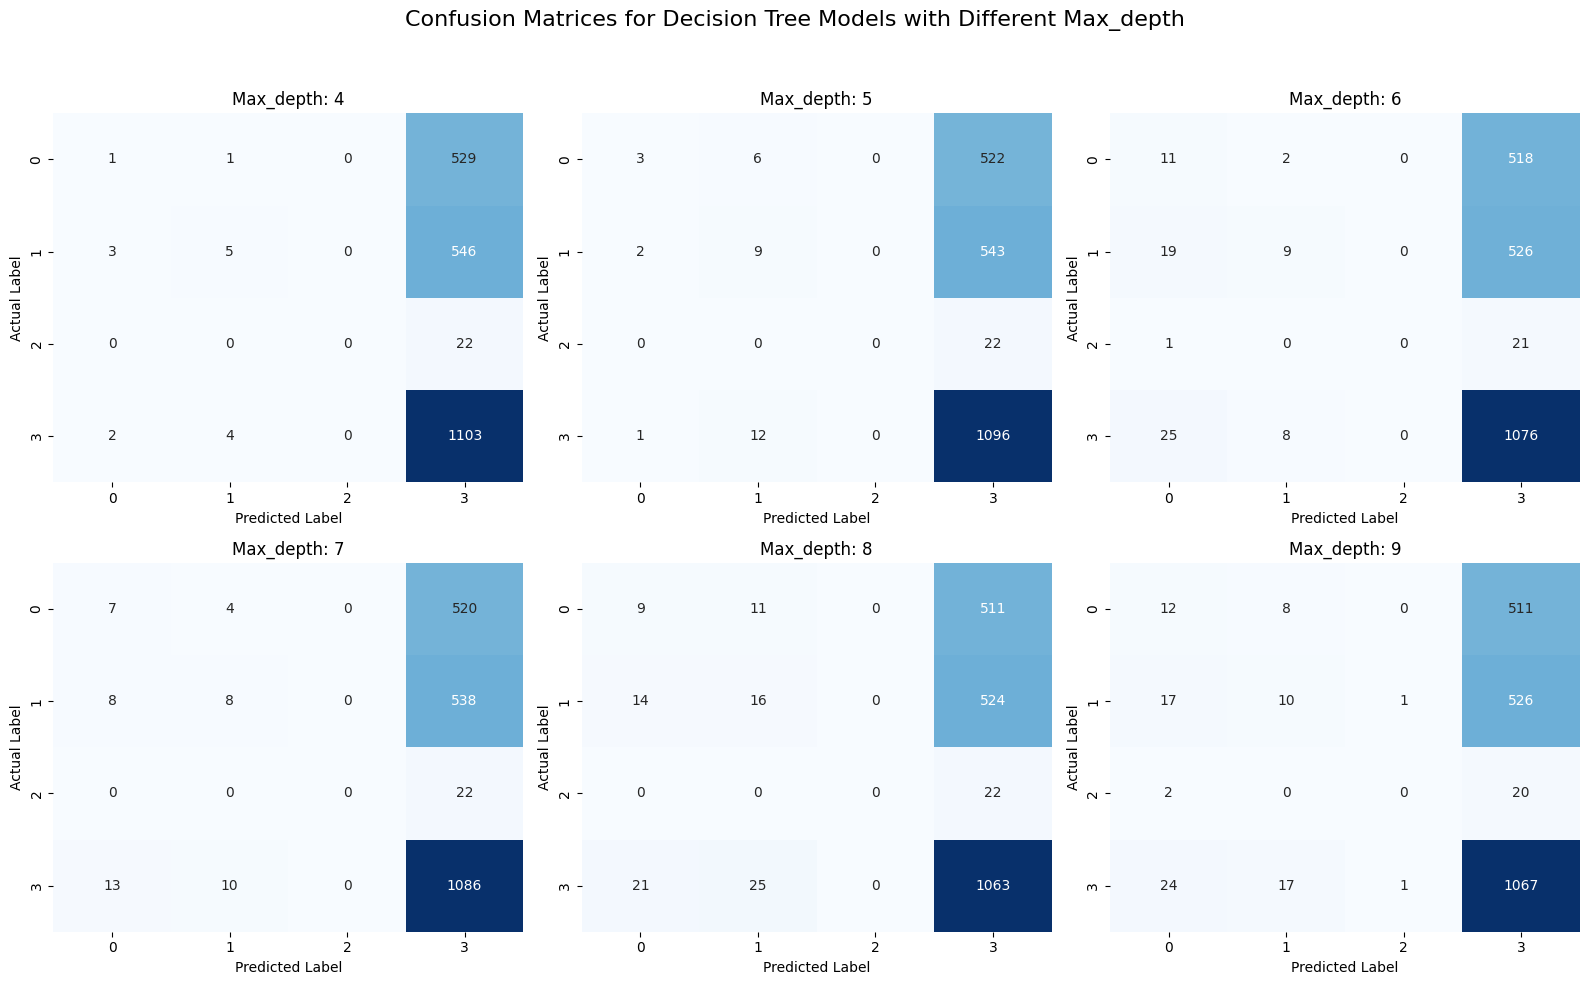

In [126]:
# Plot confusion matrices for each max_depth
def plot_confusion_matrices():
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # 2 rows, 3 columns grid
    fig.suptitle('Confusion Matrices for Decision Tree Models with Different Max_depth', fontsize=16)

    for i, max_depth in enumerate(max_depths):
        cm = results_df[results_df['Max_depth'] == max_depth]['Confusion Matrix'].values[0]
        ax = axes[i // 3, i % 3]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        ax.set_title(f'Max_depth: {max_depth}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('Actual Label')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to make space for the title
    plt.show()

# Call the function to plot confusion matrices
plot_confusion_matrices()

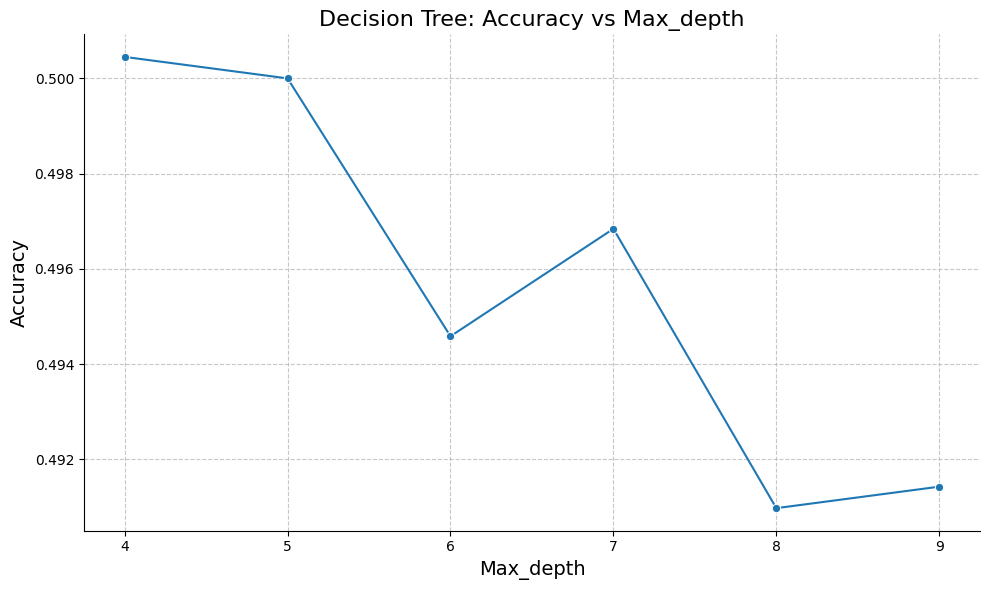

In [127]:
# Plot Accuracy vs Max_depth
plt.figure(figsize=(10, 6))
sns.lineplot(x='Max_depth', y='Accuracy', marker='o', data=results_df)
plt.title('Decision Tree: Accuracy vs Max_depth', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Max_depth', fontsize=14)
plt.xticks(max_depths)
sns.despine()  # Remove top and right borders for cleaner visuals
plt.grid(True, linestyle='--', alpha=0.7)  # Light grid lines for clarity
plt.tight_layout()
plt.show()

## Cross Validation on Decision Trees

In [128]:
# Function to train, test, and evaluate a Decision Tree model with cross-validation
def train_evaluate_decision_tree_cv(X, y, max_depth, n_splits=5):
    # Stratified K-Fold for robust evaluation
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize the Decision Tree model
    base_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    calibrated_model = CalibratedClassifierCV(base_model, method='sigmoid', cv=3)  # Calibration

    # Cross-validation predictions
    y_pred = cross_val_predict(calibrated_model, X, y, cv=skf, method='predict')
    y_proba = cross_val_predict(calibrated_model, X, y, cv=skf, method='predict_proba')

    # Performance metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y, y_pred, average='weighted', zero_division=0)
    auc = roc_auc_score(y, y_proba, multi_class='ovr') if len(np.unique(y)) > 2 else np.nan

    return accuracy, precision, recall, f1, auc

In [129]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict # Added StratifiedKFold and cross_val_predict
from sklearn.tree import DecisionTreeClassifier # Added DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV # Added CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Added metrics
import numpy as np

In [130]:
# Define max_depth values to evaluate
max_depths = [4, 5, 6, 7, 8, 9]

# Store results for cross-validation
cv_results = []

print("Performing cross-validation...")
for max_depth in max_depths:
    print(f"Evaluating Decision Tree model with max_depth={max_depth}...")
    accuracy, precision, recall, f1, auc = train_evaluate_decision_tree_cv(X_train_pca, y_train, max_depth)
    cv_results.append([max_depth, accuracy, precision, recall, f1, auc])

# Convert results to a DataFrame for better display
cv_results_df = pd.DataFrame(cv_results, columns=['Max_depth', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])

# Display the cross-validation results
print("Cross-Validation Results:")
print(cv_results_df)

Performing cross-validation...
Evaluating Decision Tree model with max_depth=4...
Evaluating Decision Tree model with max_depth=5...
Evaluating Decision Tree model with max_depth=6...
Evaluating Decision Tree model with max_depth=7...
Evaluating Decision Tree model with max_depth=8...
Evaluating Decision Tree model with max_depth=9...
Cross-Validation Results:
   Max_depth  Accuracy  Precision    Recall        F1       AUC
0          4  0.500169   0.250169  0.500169  0.333521  0.498889
1          5  0.500169   0.250169  0.500169  0.333521  0.499695
2          6  0.500169   0.250169  0.500169  0.333521  0.496206
3          7  0.500169   0.250169  0.500169  0.333521  0.512584
4          8  0.500169   0.250169  0.500169  0.333521  0.505024
5          9  0.500169   0.250169  0.500169  0.333521  0.515535


## Out-of-Sample Testing (Holdout Set)


In [131]:
# Out-of-Sample Testing (Holdout Set)
max_depths = [4, 5, 6, 7, 8, 9]
print("\nTesting on the holdout set (out-of-sample)...")
holdout_results = []

for max_depth in max_depths:
    print(f"Evaluating Decision Tree model with max_depth={max_depth} on the holdout set...")
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv=3)
    calibrated_model.fit(X_train_pca, y_train)

    # Predictions and probabilities for the holdout set
    y_pred = calibrated_model.predict(X_test_pca)
    y_proba = calibrated_model.predict_proba(X_test_pca)

    # Holdout set metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr') if len(np.unique(y_test)) > 2 else np.nan

    holdout_results.append([max_depth, accuracy, precision, recall, f1, auc])


Testing on the holdout set (out-of-sample)...
Evaluating Decision Tree model with max_depth=4 on the holdout set...
Evaluating Decision Tree model with max_depth=5 on the holdout set...
Evaluating Decision Tree model with max_depth=6 on the holdout set...
Evaluating Decision Tree model with max_depth=7 on the holdout set...
Evaluating Decision Tree model with max_depth=8 on the holdout set...
Evaluating Decision Tree model with max_depth=9 on the holdout set...


In [132]:
# Convert holdout results to DataFrame
holdout_results_df = pd.DataFrame(holdout_results, columns=['Max_depth', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])

# Display the holdout set results
print("\nOut-of-Sample Testing Results (Holdout Set):")
print(holdout_results_df)


Out-of-Sample Testing Results (Holdout Set):
   Max_depth  Accuracy  Precision    Recall        F1       AUC
0          4  0.500451   0.250451  0.500451  0.333835  0.486702
1          5  0.500451   0.250451  0.500451  0.333835  0.485879
2          6  0.500451   0.250451  0.500451  0.333835  0.494077
3          7  0.500451   0.250451  0.500451  0.333835  0.491157
4          8  0.500451   0.250451  0.500451  0.333835  0.490284
5          9  0.500451   0.250451  0.500451  0.333835  0.484280


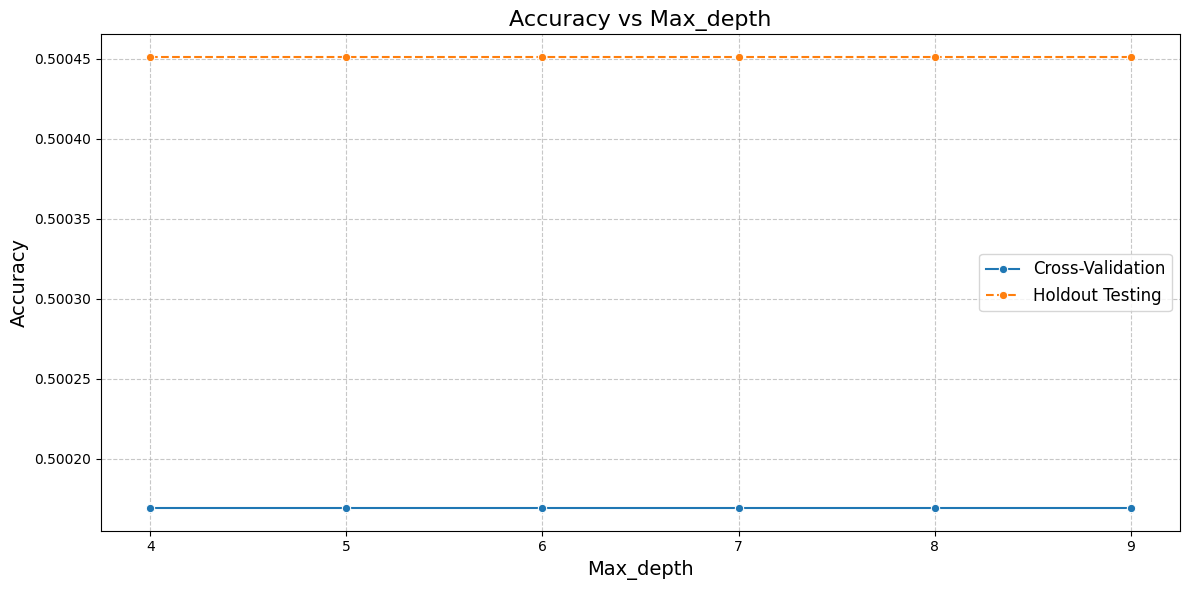

In [133]:
# Visualization: Accuracy vs Max_depth
plt.figure(figsize=(12, 6))
sns.lineplot(x='Max_depth', y='Accuracy', data=cv_results_df, label='Cross-Validation', marker='o')
sns.lineplot(x='Max_depth', y='Accuracy', data=holdout_results_df, label='Holdout Testing', marker='o', linestyle='--')
plt.title('Accuracy vs Max_depth', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Max_depth', fontsize=14)
plt.xticks(max_depths)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Logistic Regression and KNN

In [135]:
# List of models to evaluate
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier

In [136]:
# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(),
}

# Function to evaluate models without cross-validation
def evaluate_models_no_cv(models, X_train, y_train, X_test, y_test):
    results = []
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Predict on test data

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Collect results
        results.append([name, accuracy, precision, recall, f1])

    # Convert to DataFrame for better visualization
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    return results_df

In [137]:
# Evaluate the models
results_df = evaluate_models_no_cv(models, X_train_pca, y_train, X_test_pca, y_test)

# Display the results
print("Test Set Evaluation Results:")
print(results_df)

Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training KNN...
Test Set Evaluation Results:
                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.272563   0.365705  0.272563  0.302639
1                  KNN  0.390794   0.381957  0.390794  0.386043


In [138]:
results_df

Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.272563   0.365705  0.272563  0.302639
1                  KNN  0.390794   0.381957  0.390794  0.386043

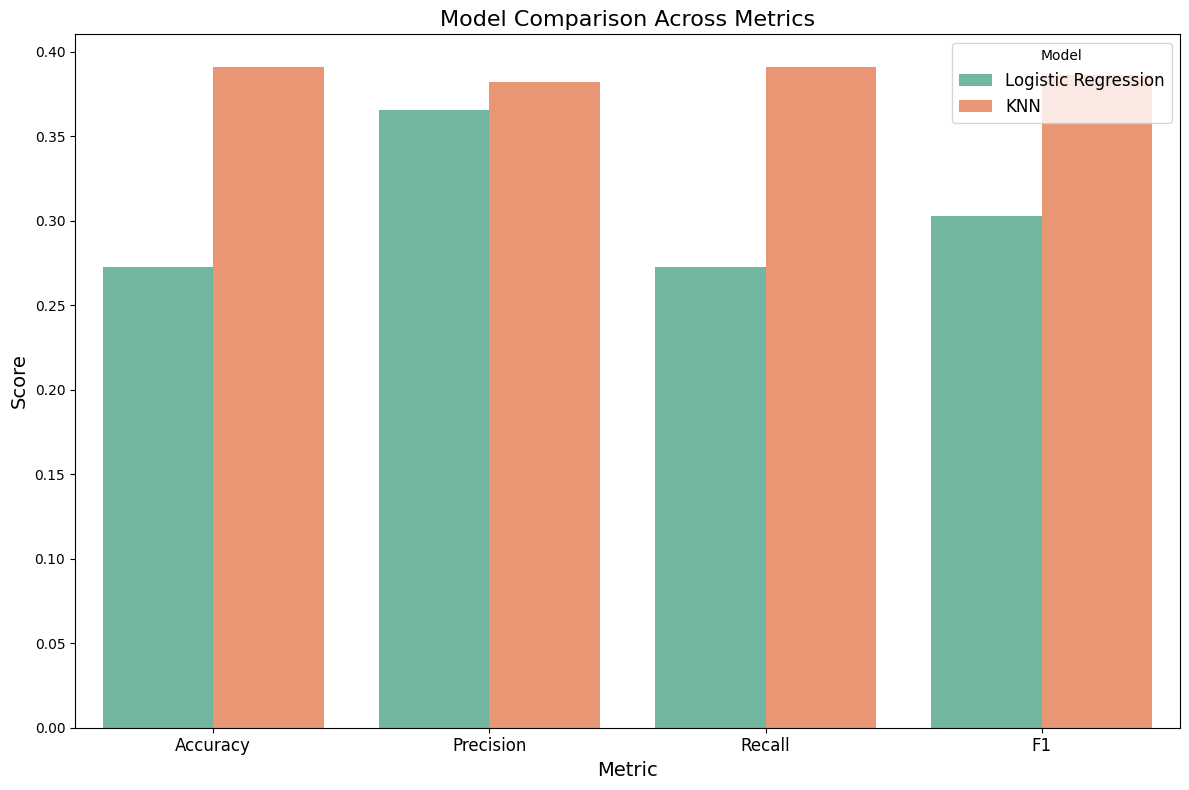

In [139]:
# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Metric', y='Score', hue='Model', palette='Set2')
plt.title("Model Comparison Across Metrics", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.xticks(fontsize=12)
plt.legend(title='Model', fontsize=12)
plt.tight_layout()
plt.show()

## Logistic Regression and KNN with Cross Validation

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(),
}

# Function to evaluate models with cross-validation
def evaluate_models(models, X, y):
    results = []
    for name, model in models.items():
        print(f"Evaluating {name}...")
        # Cross-validation scores
        accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()
        precision = cross_val_score(model, X, y, scoring='precision_weighted', cv=5).mean()
        recall = cross_val_score(model, X, y, scoring='recall_weighted', cv=5).mean()
        f1 = cross_val_score(model, X, y, scoring='f1_weighted', cv=5).mean()

        # Collect results
        results.append([name, accuracy, precision, recall, f1])

    # Convert to DataFrame for better visualization
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    return results_df

In [142]:
# Evaluate the models
results_df = evaluate_models(models, X_train_pca, y_train)

# Display the results
print("Cross-Validation Results for Alternative Models:")
print(results_df)

Evaluating Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Evaluating KNN...
Cross-Validation Results for Alternative Models:
                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.276656   0.361723  0.276656  0.302628
1                  KNN  0.378652   0.369032  0.378652  0.373176


In [143]:
results_df

Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.276656   0.361723  0.276656  0.302628
1                  KNN  0.378652   0.369032  0.378652  0.373176

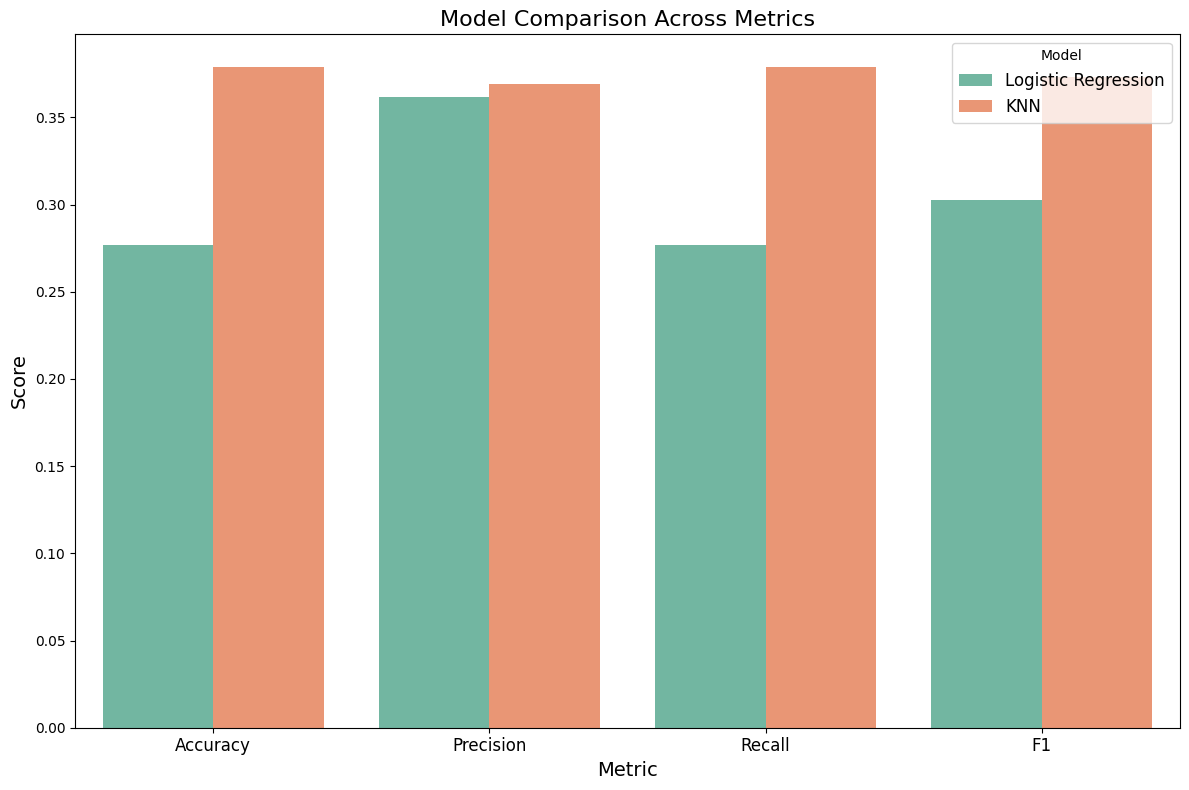

In [144]:
# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Metric', y='Score', hue='Model', palette='Set2')
plt.title("Model Comparison Across Metrics", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.xticks(fontsize=12)
plt.legend(title='Model', fontsize=12)
plt.tight_layout()
plt.show()

## XGBoost and Random Forest Classifier

In [146]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [151]:
# Define models to evaluate
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Function to evaluate models (unchanged)
def evaluate_models_no_cv(models, X_train, y_train, X_test, y_test):
    results = []
    for name, model in models.items():
        print(f"Training and Evaluating {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append([name, accuracy, precision, recall, f1])
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    return results_df

# Evaluate the models with integer labels
results_df = evaluate_models_no_cv(models, X_train_pca, y_train_category, X_test_pca, y_test_category)

# Display the results
print("Evaluation Results on Test Data:")
print(results_df)

Training and Evaluating Random Forest...
Training and Evaluating XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:32:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluation Results on Test Data:
           Model  Accuracy  Precision    Recall        F1
0  Random Forest  0.558213   0.597078  0.558213  0.493192
1        XGBoost  0.598827   0.599821  0.598827  0.584483


In [152]:
results_df

Model  Accuracy  Precision    Recall        F1
0  Random Forest  0.558213   0.597078  0.558213  0.493192
1        XGBoost  0.598827   0.599821  0.598827  0.584483

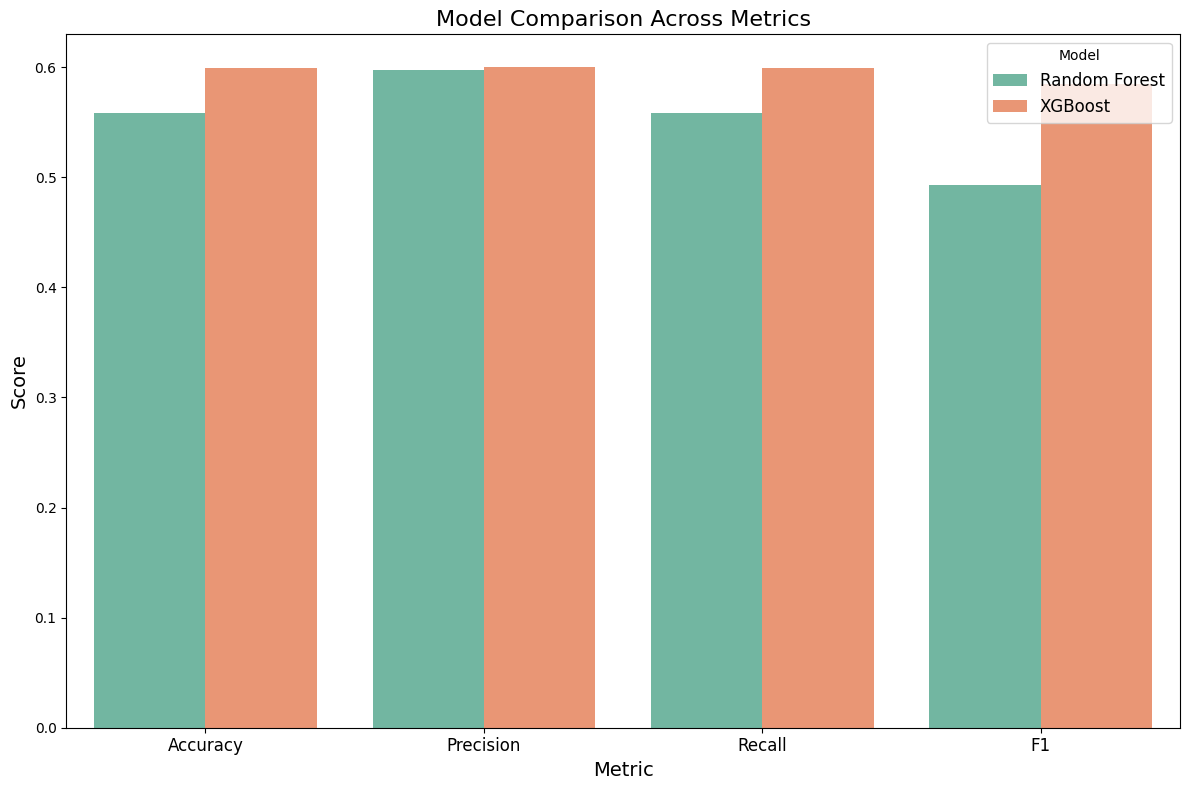

In [153]:
# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Metric', y='Score', hue='Model', palette='Set2')
plt.title("Model Comparison Across Metrics", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.xticks(fontsize=12)
plt.legend(title='Model', fontsize=12)
plt.tight_layout()
plt.show()

## USING XGBOOST AND RANDOM FOREST CLASSIFIER WITH CROSS VALIDATION

In [159]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# List of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Function to evaluate models with cross-validation
def evaluate_models(models, X, y):
    # Check if y is categorical and encode if necessary
    if y.dtype == 'object' or y.dtype.name == 'category':
        le = LabelEncoder()
        y = le.fit_transform(y)
        print("Target variable 'y' has been label-encoded to numerical values.")

    # Define scoring metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted', zero_division=0),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }

    results = []
    for name, model in models.items():
        print(f"Evaluating {name}...")
        try:
            # Perform cross-validation with multiple metrics
            cv_results = cross_validate(model, X, y, scoring=scoring, cv=2, return_train_score=False)

            # Extract mean and std for each metric
            accuracy_mean = np.mean(cv_results['test_accuracy'])
            accuracy_std = np.std(cv_results['test_accuracy'])
            precision_mean = np.mean(cv_results['test_precision'])
            precision_std = np.std(cv_results['test_precision'])
            recall_mean = np.mean(cv_results['test_recall'])
            recall_std = np.std(cv_results['test_recall'])
            f1_mean = np.mean(cv_results['test_f1'])
            f1_std = np.std(cv_results['test_f1'])

            # Collect results
            results.append([name, accuracy_mean, accuracy_std, precision_mean, precision_std,
                            recall_mean, recall_std, f1_mean, f1_std])

        except Exception as e:
            print(f"Error evaluating {name}: {e}")
            continue

    # Convert to DataFrame for better visualization
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy Mean', 'Accuracy Std',
                                                'Precision Mean', 'Precision Std',
                                                'Recall Mean', 'Recall Std',
                                                'F1 Mean', 'F1 Std'])

    # Find and display the best model based on F1 score
    if not results_df.empty:
        best_model = results_df.loc[results_df['F1 Mean'].idxmax()]
        print(f"\nBest Model based on F1 Score: {best_model['Model']} with F1 Mean: {best_model['F1 Mean']:.4f}")

    return results_df

# Evaluate the models
results_df = evaluate_models(models, X_train_pca, y_train)

# Display the results
print("Cross-Validation Results for Alternative Models:")
print(results_df)

Target variable 'y' has been label-encoded to numerical values.
Evaluating Random Forest...
Evaluating XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:51:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:53:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Model based on F1 Score: XGBoost with F1 Mean: 0.3759
Cross-Validation Results for Alternative Models:
           Model  Accuracy Mean  Accuracy Std  Precision Mean  Precision Std  \
0  Random Forest       0.491143      0.001974        0.376687       0.011959   
1        XGBoost       0.449735      0.002883        0.371072       0.000965   

   Recall Mean  Recall Std   F1 Mean    F1 Std  
0     0.491143    0.001974  0.349670  0.003152  
1     0.449735    0.002883  0.375923  0.002935  


In [160]:
results_df

Model  Accuracy Mean  Accuracy Std  Precision Mean  Precision Std  \
0  Random Forest       0.491143      0.001974        0.376687       0.011959   
1        XGBoost       0.449735      0.002883        0.371072       0.000965   

   Recall Mean  Recall Std   F1 Mean    F1 Std  
0     0.491143    0.001974  0.349670  0.003152  
1     0.449735    0.002883  0.375923  0.002935

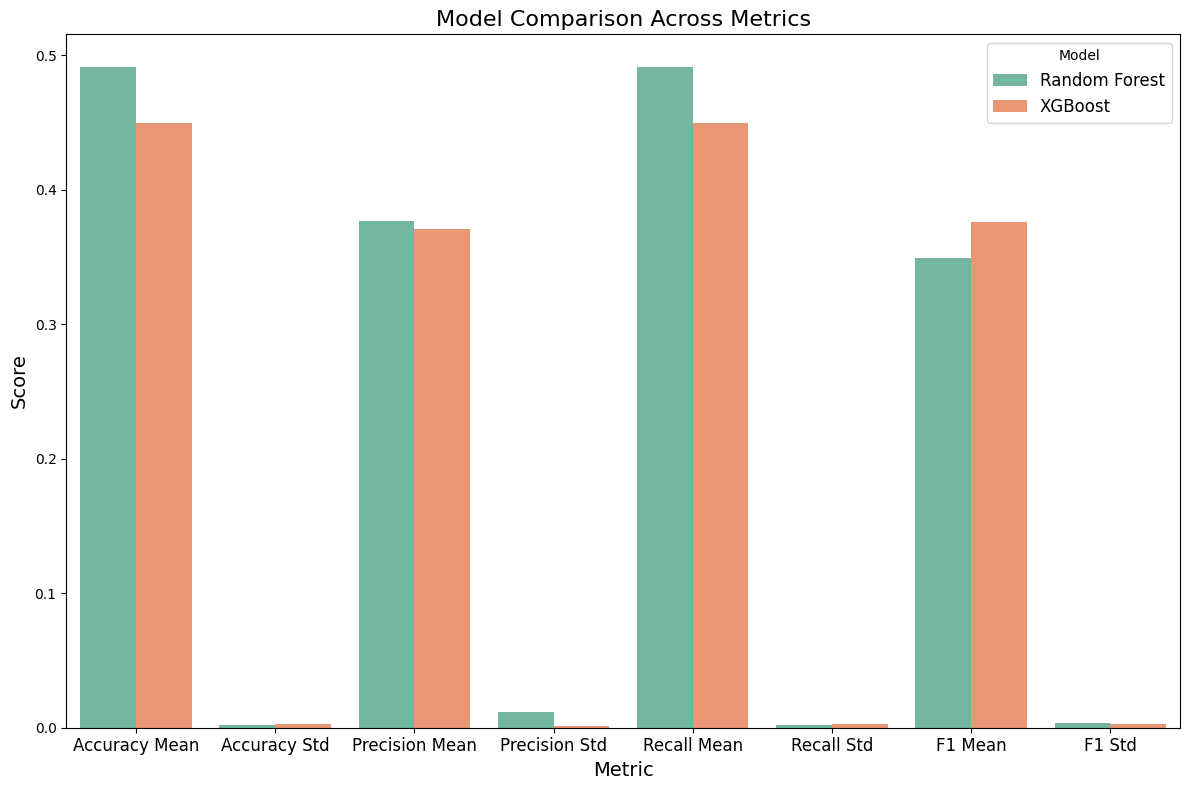

In [161]:
# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Metric', y='Score', hue='Model', palette='Set2')
plt.title("Model Comparison Across Metrics", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.xticks(fontsize=12)
plt.legend(title='Model', fontsize=12)
plt.tight_layout()
plt.show()

## CatBoost and LightGBM

In [164]:
# Define models to evaluate
import catboost as cb # Import CatBoost and assign the alias 'cb'
import lightgbm as lgb # Import LightGBM and assign the alias 'lgb'

In [165]:
# Define models to evaluate
models = {
    'CatBoost': cb.CatBoostClassifier(silent=True, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

In [166]:
# Function to evaluate models
def evaluate_models_no_cv(models, X_train, y_train, X_test, y_test):
    results = []
    for name, model in models.items():
        print(f"Training and Evaluating {name}...")
        # Train the model
        model.fit(X_train, y_train)

        # Predict on test data
        y_pred = model.predict(X_test)

        # Compute metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Collect results
        results.append([name, accuracy, precision, recall, f1])

    # Convert to DataFrame for better visualization
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    return results_df

In [167]:
# Evaluate the models
results_df = evaluate_models_no_cv(models, X_train_pca, y_train, X_test_pca, y_test)

# Display the results
print("Evaluation Results on Test Data:")
print(results_df)

Training and Evaluating CatBoost...
Training and Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 194310
[LightGBM] [Info] Number of data points in the train set: 8863, number of used features: 762
[LightGBM] [Info] Start training from score -1.429055
[LightGBM] [Info] Start training from score -1.385279
[LightGBM] [Info] Start training from score -4.601004
[LightGBM] [Info] Start training from score -0.692809
Evaluation Results on Test Data:
      Model  Accuracy  Precision    Recall        F1
0  CatBoost  0.467509   0.374865  0.467509  0.377629
1  LightGBM  0.481047   0.379973  0.481047  0.373052


In [168]:
results_df

Model  Accuracy  Precision    Recall        F1
0  CatBoost  0.467509   0.374865  0.467509  0.377629
1  LightGBM  0.481047   0.379973  0.481047  0.373052

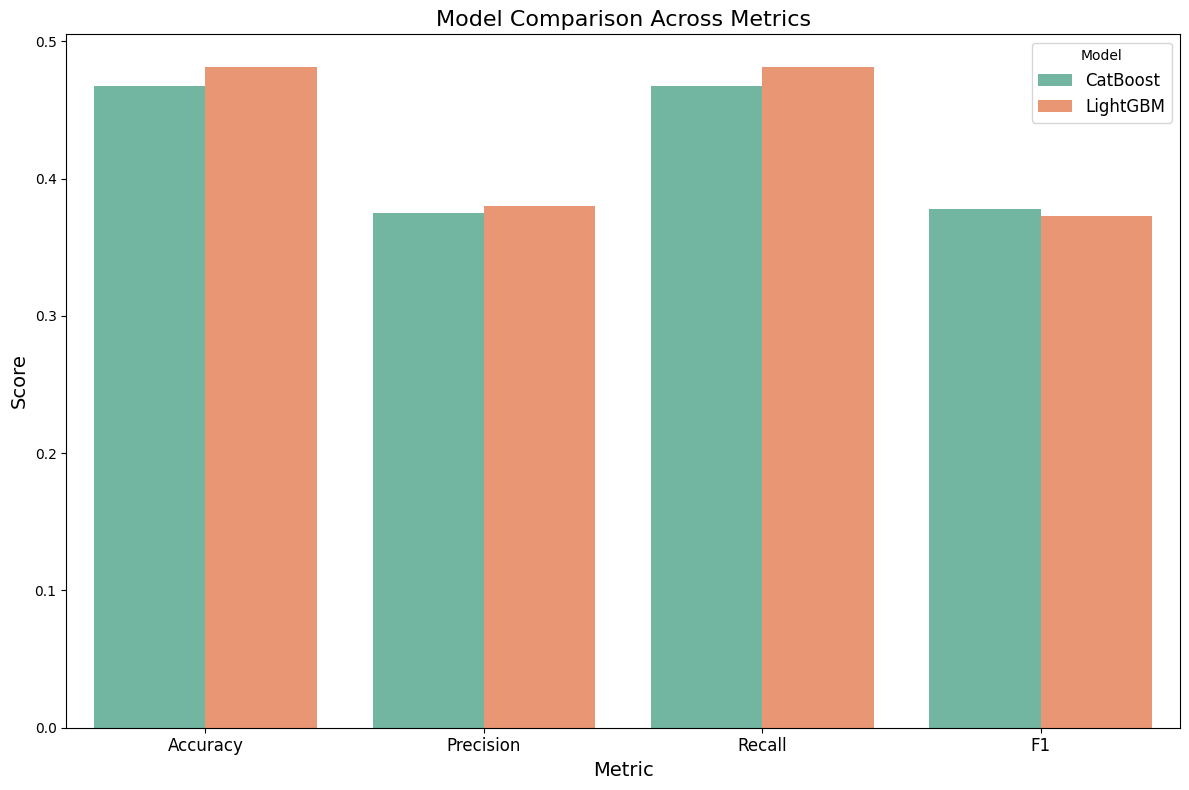

In [169]:
# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Metric', y='Score', hue='Model', palette='Set2')
plt.title("Model Comparison Across Metrics", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.xticks(fontsize=12)
plt.legend(title='Model', fontsize=12)
plt.tight_layout()
plt.show()

# WITH NEURAL NETWORKS

In [171]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
import joblib
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Add
from tensorflow.keras.models import load_model

In [209]:
# Define the one-hot encoded target columns
target_columns = ['price_price_low', 'price_price_reasonable', 'price_price_high', 'price_price_others']

# Create the target variable y as integer labels
y_one_hot = heatmap_scaled_df_filtered[target_columns]
y = np.argmax(y_one_hot.values, axis=1)

# Define the features X by dropping the price-related columns
X = heatmap_scaled_df_filtered.drop(columns=['price', 'price_category'] + target_columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the number of classes
num_classes = y_one_hot.shape[1]

# Define the neural network model
def build_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # Corrected for integer labels
        metrics=['accuracy']
    )
    return model

# Build the model
model = build_model(input_dim=X_train.shape[1], num_classes=num_classes)

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 128)            │       125,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,060 (535.39 KB)

 Trainable params: 136,612 (533.64 KB)

 Non-trainable params: 448 (1.75 KB)

In [210]:
# ==================================
# Step 3: Train the Model
# ==================================
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.3405 - loss: 1.6946 - val_accuracy: 0.5447 - val_loss: 1.0447
Epoch 2/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5345 - loss: 1.1056 - val_accuracy: 0.5808 - val_loss: 0.9223
Epoch 3/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5918 - loss: 0.9393 - val_accuracy: 0.6056 - val_loss: 0.8873
Epoch 4/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6120 - loss: 0.8751 - val_accuracy: 0.6024 - val_loss: 0.8719
Epoch 5/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6377 - loss: 0.8123 - val_accuracy: 0.6069 - val_loss: 0.8611
Epoch 6/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6571 - loss: 0.8006 - val_accuracy: 0.6006 - val_loss: 0.8624
Epoch 7/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6742 - loss: 0.7627 - val_accuracy: 0.6074 - val_loss: 0.8619
Epoch 8/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6777 - loss: 0.7618 - val_ac

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Predicted labels: [0 1 2 3]
True labels: [0 1 2 3]

Model Performance Metrics:
Accuracy: 0.6069
Precision: 0.6041
Recall: 0.6069
F1 Score: 0.5926

Confusion Matrix:
[[216 316  22   0]
 [118 856 135   0]
 [ 12 243 273   3]
 [  0   5  17   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.39      0.48       554
           1       0.60      0.77      0.68      1109
           2       0.61      0.51      0.56       531
           3       0.00      0.00      0.00        22

    accuracy                           0.61      2216
   macro avg       0.46      0.42      0.43      2216
weighted avg       0.60      0.61      0.59      2216



<Figure size 1000x800 with 0 Axes>

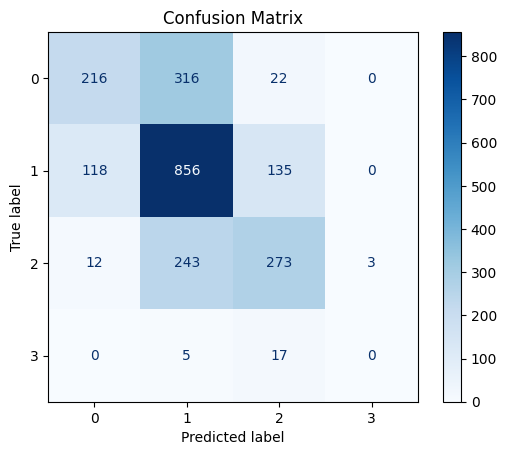

In [211]:
# ==================================
# Step 4: Evaluate the Model
# ==================================
# Predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_labels = y_test

# Debug: Check predictions
print(f"Predicted labels: {np.unique(y_pred)}")
print(f"True labels: {np.unique(y_test_labels)}")

# Metrics
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')
cm = confusion_matrix(y_test_labels, y_pred)

# Debug: Print performance metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))

# Plot Confusion Matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_labels))
plt.figure(figsize=(10, 8))
cmd.plot(cmap=plt.cm.Blues, colorbar=True)
plt.title("Confusion Matrix")
plt.show()

In [212]:
# Specify the new path in your Google Drive where the model will be saved
model_save_dir = '/content/drive/My Drive/FeedForwardNeuralNetworkModel/'
os.makedirs(model_save_dir, exist_ok=True)  # Create the directory if it doesn't exist
model_save_path = os.path.join(model_save_dir, 'feed_forward_nn_model.keras')

# Save the model in the recommended format
model.save(model_save_path)

print(f"Model saved to: {model_save_path}")

Model saved to: /content/drive/My Drive/FeedForwardNeuralNetworkModel/feed_forward_nn_model.keras


**MLP**

In [213]:
# ==================================
# Step 1: Define and Train MLPClassifier
# ==================================
# Define the MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),  # Three layers with decreasing size
    activation='relu',
    solver='adam',
    batch_size=32,
    max_iter=100,  # You can increase this for better performance
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2
)
# Train the MLP model
mlp.fit(X_train, y_train)

MLPClassifier(batch_size=32, early_stopping=True,
              hidden_layer_sizes=(256, 128, 64), max_iter=100, random_state=42,
              validation_fraction=0.2)


Model Performance Metrics:
Accuracy: 0.6069
Precision: 0.6041
Recall: 0.6069
F1 Score: 0.5926

Confusion Matrix:
[[216 316  22   0]
 [118 856 135   0]
 [ 12 243 273   3]
 [  0   5  17   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.39      0.48       554
           1       0.60      0.77      0.68      1109
           2       0.61      0.51      0.56       531
           3       0.00      0.00      0.00        22

    accuracy                           0.61      2216
   macro avg       0.46      0.42      0.43      2216
weighted avg       0.60      0.61      0.59      2216



<Figure size 1000x800 with 0 Axes>

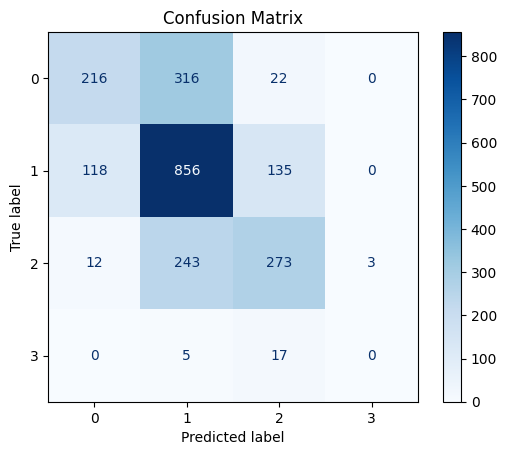

In [214]:
# ==================================
# Step 2 : Convert Labels if Necessary
# ==================================
# Convert one-hot encoded labels to class indices if required
if len(y_test.shape) > 1:  # Check if one-hot encoded
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

if len(y_pred.shape) > 1:  # Check if probabilities or one-hot encoded
    y_pred_labels = np.argmax(y_pred, axis=1)
else:
    y_pred_labels = y_pred

# ==================================
# Step 2 : Calculate Metrics
# ==================================
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Print Metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_labels))

# Plot Confusion Matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_labels))
plt.figure(figsize=(10, 8))
cmd.plot(cmap=plt.cm.Blues, colorbar=True)
plt.title("Confusion Matrix")
plt.show()

In [215]:
# ==================================
# Step 3: Save the Checkpoint
# ==================================
# Specify the directory in your Google Drive where the checkpoint will be saved
checkpoint_dir = '/content/drive/My Drive/MLP_Models/'
os.makedirs(checkpoint_dir, exist_ok=True)  # Create the directory if it doesn't exist
checkpoint_path = os.path.join(checkpoint_dir, 'mlp_best_model_checkpoint.joblib')

# Save the model
joblib.dump(mlp, checkpoint_path)

print(f"Model checkpoint saved to: {checkpoint_path}")

Model checkpoint saved to: /content/drive/My Drive/MLP_Models/mlp_best_model_checkpoint.joblib


**1-D CNN**

Number of classes for the target variable: 4
X_train shape: (8863, 989)
y_train shape: (8863, 4)
X_test shape: (2216, 989)
y_test shape: (2216, 4)
X_train_reshaped shape: (8863, 989, 1)
X_test_reshaped shape: (2216, 989, 1)
Building CNN model with input shape (989, 1) and 4 output classes.
Model built and compiled successfully.

CNN Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 987, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 987, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 493, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 493, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 491, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 491, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 245, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 245, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 31360)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │     4,014,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,040,964 (15.42 MB)

 Trainable params: 4,040,324 (15.41 MB)

 Non-trainable params: 640 (2.50 KB)


Starting training...
Epoch 1/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.4762 - loss: 1.4602 - val_accuracy: 0.5005 - val_loss: 1.1358
Epoch 2/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6059 - loss: 0.9219 - val_accuracy: 0.5600 - val_loss: 0.8958
Epoch 3/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6158 - loss: 0.8689 - val_accuracy: 0.6255 - val_loss: 0.8111
Epoch 4/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6391 - loss: 0.8122 - val_accuracy: 0.6403 - val_loss: 0.7920
Epoch 5/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6331 - loss: 0.8133 - val_accuracy: 0.6349 - val_loss: 0.8013
Epoch 6/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6480 - loss: 0.7977 - val_accuracy: 0.6394 - val_loss: 0.7863
Epoch 7/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6560 - loss: 0.7701 - val_accuracy: 0.6367 - val_loss: 0.7866
Epoch 8/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6487 - loss

<Figure size 1000x800 with 0 Axes>

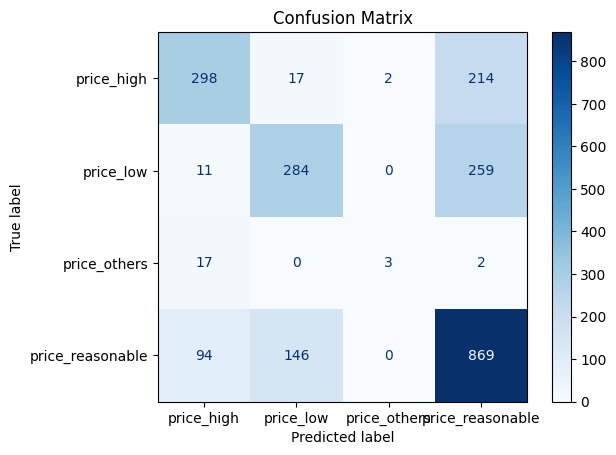

Error saving Keras model: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/drive/My Drive/MLP_Models/cnn_1d_best_model_checkpoint.joblib.
Saving Keras models requires HDF5 or SavedModel format.
Trying to save in SavedModel format...
Error saving Keras model in TensorFlow SavedModel format: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/drive/My Drive/MLP_Models/cnn_1d_best_model_checkpoint_tf.
Please ensure you have h5py installed for HDF5 format or check TensorFlow installation.


In [207]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

columns_to_drop_for_features = ['price', 'price_category',
                               'price_price_low', 'price_price_reasonable',
                               'price_price_high', 'price_price_others']

# Drop columns that are not features from the preprocessed_df to create X
# Use .copy() to avoid SettingWithCopyWarning
X = preprocessed_df.drop(columns=[col for col in columns_to_drop_for_features if col in preprocessed_df.columns]).copy()

# Define the target variable
y = preprocessed_df['price_category']

# Handle potential non-numeric columns in X that might have been missed
# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print(f"Dropping non-numeric columns from X: {non_numeric_cols.tolist()}")
    X = X.drop(columns=non_numeric_cols)


# One-Hot Encode the target variable
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False) # Use sparse_output=False to get a dense array

# Fit and transform the target variable
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Get the number of classes
num_classes = y_encoded.shape[1]
print(f"Number of classes for the target variable: {num_classes}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y) # Stratify to maintain class distribution

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Reshape input data for Conv1D layer (samples, timesteps, features)
# In this case, timesteps is 1, and features is the number of columns in X
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"X_train_reshaped shape: {X_train_reshaped.shape}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}")


# ==================================
# Define CNN Model (Use the reshaped data for input_shape)
# ==================================
def build_cnn_1d(input_shape, num_classes):
    print(f"Building CNN model with input shape {input_shape} and {num_classes} output classes.")
    model = Sequential()

    # 1D Convolutional Layer 1
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape)) # Use filters instead of the old '64'
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    # 1D Convolutional Layer 2
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu')) # Use filters instead of the old '128'
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output Layer
    # Ensure the number of units matches num_classes and activation is softmax for multi-class
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy', # Use categorical_crossentropy for one-hot encoded targets
        metrics=['accuracy']
    )
    print("Model built and compiled successfully.")
    return model

# Build CNN model using the reshaped training data shape
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])
cnn_model = build_cnn_1d(input_shape=input_shape, num_classes=num_classes)

# Debug: Print model summary
print("\nCNN Model Summary:")
cnn_model.summary()

# ==================================
# Train the Model (Use the reshaped data for training)
# ==================================
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
print("\nStarting training...")
history = cnn_model.fit(
    X_train_reshaped, y_train, # Use reshaped X and one-hot encoded y
    validation_data=(X_test_reshaped, y_test), # Use reshaped X and one-hot encoded y
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)
print("Training completed.")

# ==================================
# Evaluate the Model (Use the reshaped test data for prediction)
# ==================================
print("\nEvaluating the model...")
loss, accuracy = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0) # Use reshaped X and one-hot encoded y
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict probabilities
y_pred_probs = cnn_model.predict(X_test_reshaped) # Use reshaped X

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Convert true labels (which are one-hot encoded) to class labels for evaluation
y_test_labels = np.argmax(y_test, axis=1)

# ==================================
# Calculate and Print Metrics
# ==================================
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Print Metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Classification Report
# Need to import classification_report and ConfusionMatrixDisplay
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Get original class labels from the encoder
class_labels = encoder.categories_[0] # Get the list of categories from the fitted encoder

print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_labels, target_names=class_labels)) # Use target_names

# Plot Confusion Matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels) # Use class_labels for display
plt.figure(figsize=(10, 8))
# Use ax to access matplotlib axes for title
ax = cmd.plot(cmap=plt.cm.Blues, colorbar=True).ax_
ax.set_title("Confusion Matrix")
plt.show()


# ==================================
# Step 3: Save the Checkpoint
# ==================================
import os
import joblib

# Specify the directory in your Google Drive where the checkpoint will be saved
checkpoint_dir = '/content/drive/My Drive/MLP_Models/'
os.makedirs(checkpoint_dir, exist_ok=True)  # Create the directory if it doesn't exist
# Use a different name for the CNN model if you have an MLP model saved there already
checkpoint_path = os.path.join(checkpoint_dir, 'cnn_1d_best_model_checkpoint.joblib')

# Save the model (Keras models are typically saved using model.save())
# joblib is usually for scikit-learn models. Use Keras's save method.
try:
    cnn_model.save(checkpoint_path)
    print(f"CNN Model checkpoint saved to: {checkpoint_path}")
except Exception as e:
    print(f"Error saving Keras model: {e}")
    print("Saving Keras models requires HDF5 or SavedModel format.")
    print("Trying to save in SavedModel format...")
    try:
        checkpoint_path_tf = os.path.join(checkpoint_dir, 'cnn_1d_best_model_checkpoint_tf')
        cnn_model.save(checkpoint_path_tf)
        print(f"CNN Model checkpoint saved to: {checkpoint_path_tf} (TensorFlow SavedModel format)")
    except Exception as e_tf:
        print(f"Error saving Keras model in TensorFlow SavedModel format: {e_tf}")
        print("Please ensure you have h5py installed for HDF5 format or check TensorFlow installation.")

In [208]:
# ==================================
# Save the Model Checkpoint
# ==================================

# Specify the directory in your Google Drive where the checkpoint will be saved
checkpoint_dir = '/content/drive/My Drive/CNN_Model/'
os.makedirs(checkpoint_dir, exist_ok=True)  # Create the directory if it doesn't exist
checkpoint_path = os.path.join(checkpoint_dir, 'cnn_model_checkpoint.keras')

# Save the model
cnn_model.save(checkpoint_path)

print(f"Model checkpoint saved to: {checkpoint_path}")

Model checkpoint saved to: /content/drive/My Drive/CNN_Model/cnn_model_checkpoint.keras


In [203]:
# ==================================
# Step 2: Define the ResNet Model
# ==================================
def build_residual_block(input_layer, units):
    """Creates a single residual block with skip connection."""
    x = Dense(units, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(units, activation='relu')(x)
    x = BatchNormalization()(x)

    # Match dimensions of input_layer and x if they differ
    if input_layer.shape[-1] != units:
        input_layer = Dense(units)(input_layer)  # Linear transformation to match dimensions

    # Skip connection
    x = Add()([input_layer, x])
    return x

def build_resnet_model(input_dim, num_classes):
    """Builds a Residual Neural Network for tabular data."""
    input_layer = Input(shape=(input_dim,))

    # First Dense layer
    x = Dense(256, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Add residual blocks
    for units in [256, 128, 64]:
        x = build_residual_block(x, units)

    # Output layer
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

input_dim = X_train.shape[1]

resnet_model = build_resnet_model(input_dim=input_dim, num_classes=num_classes)
resnet_model.summary()

Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 989)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 256)       │    253,440 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_26[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 256)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 256)       │     65,792 │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_27[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 256)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 256)       │     65,792 │ dropout_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_28[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 256)       │          0 │ dropout_18[0][0], │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 128)       │     32,896 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_29[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 128)       │     16,512 │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 128)       │     32,896 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_30[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 128)       │          0 │ dense_31[0][0],   │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 64)        │      8,256 │ add_4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_32[0][0]    │
│ (BatchNormalizatio… │                   │            │                 

 Total params: 492,868 (1.88 MB)

 Trainable params: 490,564 (1.87 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [204]:
# ==================================
# Step 3: Build and Train the ResNet Model
# ==================================

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

history = resnet_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 27s 25ms/step - accuracy: 0.4392 - loss: 2.0079 - val_accuracy: 0.5772 - val_loss: 0.9003
Epoch 2/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5632 - loss: 1.0114 - val_accuracy: 0.5722 - val_loss: 0.9265
Epoch 3/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5813 - loss: 0.9265 - val_accuracy: 0.6160 - val_loss: 0.8906
Epoch 4/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6057 - loss: 0.8926 - val_accuracy: 0.6092 - val_loss: 0.8546
Epoch 5/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6177 - loss: 0.8598 - val_accuracy: 0.5916 - val_loss: 0.8710
Epoch 6/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6263 - loss: 0.8293 - val_accuracy: 0.6124 - val_loss: 0.8775
Epoch 7/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6277 - loss: 0.8232 - val_accuracy: 0.6069 - val_loss: 0.8496
Epoch 8/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6442 - loss: 0.8074 - val_accuracy: 

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

Model Performance Metrics:
Accuracy: 0.6218
Precision: 0.6198
Recall: 0.6218
F1 Score: 0.6108

Confusion Matrix:
[[313  21   5 192]
 [  9 305   0 240]
 [ 17   0   4   1]
 [108 171   0 830]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.52      0.59       531
           1       0.58      0.44      0.50       554
           2       0.25      0.05      0.08        22
           3       0.62      0.77      0.69      1109

    accuracy                           0.62      2216
   macro avg       0.53      0.44      0.46      2216
weighted avg       0.62      0.62      0.61      2216



<Figure size 1000x800 with 0 Axes>

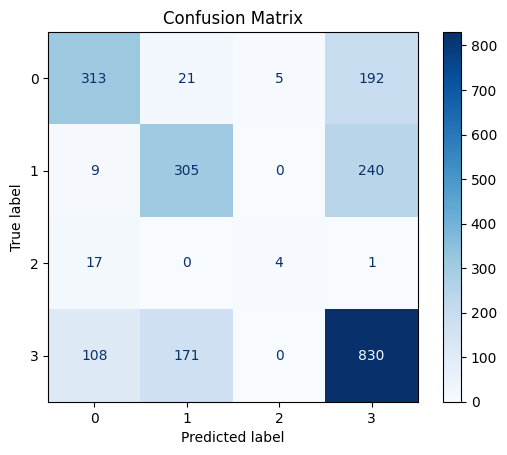

In [205]:
# ==================================
# Step 4: Evaluate the ResNet Model
# ==================================
y_pred_proba = resnet_model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')
cm = confusion_matrix(y_test_labels, y_pred_labels)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))

# Plot Confusion Matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_labels))
plt.figure(figsize=(10, 8))
cmd.plot(cmap=plt.cm.Blues, colorbar=True)
plt.title("Confusion Matrix")
plt.show()

In [206]:
# ==================================
# Save the Model Checkpoint
# ==================================

# Specify the directory in your Google Drive where the checkpoint will be saved
checkpoint_directory = '/content/drive/My Drive/ResNet_Model/'
os.makedirs(checkpoint_directory, exist_ok=True)  # Create the directory if it doesn't exist
checkpoint_file_path = os.path.join(checkpoint_directory, 'resnet_model_checkpoint.keras')

# Save the model
resnet_model.save(checkpoint_file_path)

print(f"Model checkpoint saved to: {checkpoint_file_path}")

Model checkpoint saved to: /content/drive/My Drive/ResNet_Model/resnet_model_checkpoint.keras


**ENSEMBLE OF THE NEURAL NETWORK MODELS**

In [216]:
# ==================================
# Step 1: Load Saved Models
# ==================================
# FeedForward Neural Network Model
ffnn_model_path = '/content/drive/My Drive/FeedForwardNeuralNetworkModel/feed_forward_nn_model.keras'
ffnn_model = load_model(ffnn_model_path)
print("FeedForward Neural Network model loaded.")

# MLP Model
mlp_model_path = '/content/drive/My Drive/MLP_Models/mlp_best_model_checkpoint.joblib'
mlp_model = joblib.load(mlp_model_path)
print("MLP model loaded.")

# CNN Model
cnn_model_path = '/content/drive/My Drive/CNN_Model/cnn_model_checkpoint.keras'
cnn_model = load_model(cnn_model_path)
print("CNN model loaded.")

# ResNet Model
resnet_model_path = '/content/drive/My Drive/ResNet_Model/resnet_model_checkpoint.keras'
resnet_model = load_model(resnet_model_path)
print("ResNet model loaded.")

FeedForward Neural Network model loaded.
MLP model loaded.
CNN model loaded.
ResNet model loaded.


In [220]:
# ==================================
# Step 2: Make Predictions with Each Model
# ==================================
ffnn_pred_proba = ffnn_model.predict(X_test)
mlp_pred_proba = mlp_model.predict_proba(X_test)

ensemble_pred_proba = (
    ffnn_pred_proba + mlp_pred_proba
) / 4

# Convert probabilities to class predictions
ensemble_pred = np.argmax(ensemble_pred_proba, axis=1)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Ensemble Model Metrics:
Accuracy: 0.6101
Precision: 0.6027
Recall: 0.6101
F1 Score: 0.6010

Confusion Matrix:
[[248 282  24   0]
 [154 815 140   0]
 [ 20 220 289   2]
 [  1   4  17   0]]

Ensemble Model Classification Report:

              precision    recall  f1-score   support

           0       0.59      0.45      0.51       554
           1       0.62      0.73      0.67      1109
           2       0.61      0.54      0.58       531
           3       0.00      0.00      0.00        22

    accuracy                           0.61      2216
   macro avg       0.45      0.43      0.44      2216
weighted avg       0.60      0.61      0.60      2216



<Figure size 1000x800 with 0 Axes>

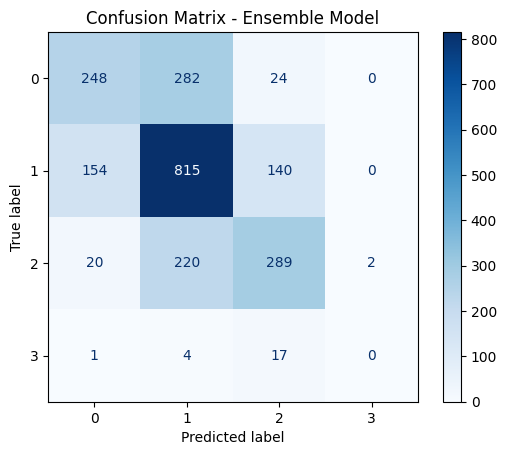

In [221]:
# ==================================
# Step 3: Evaluate Ensemble Model
# ==================================
if len(y_test.shape) > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

# Metrics
ensemble_accuracy = accuracy_score(y_test_labels, ensemble_pred)
ensemble_precision = precision_score(y_test_labels, ensemble_pred, average='weighted')
ensemble_recall = recall_score(y_test_labels, ensemble_pred, average='weighted')
ensemble_f1 = f1_score(y_test_labels, ensemble_pred, average='weighted')
cm = confusion_matrix(y_test_labels, ensemble_pred)

# Print Metrics
print(f"Ensemble Model Metrics:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1 Score: {ensemble_f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nEnsemble Model Classification Report:\n")
print(classification_report(y_test_labels, ensemble_pred))

# Plot Confusion Matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_labels))
plt.figure(figsize=(10, 8))
cmd.plot(cmap=plt.cm.Blues, colorbar=True)
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

**STACKING**

In [227]:
# ==================================
# Step 1: Prepare Stacking Data
# ==================================
# Concatenate model predictions (as features for the meta-model)
stacking_features = np.hstack((ffnn_pred_proba, mlp_pred_proba))

# Split stacking data into train and validation sets
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(
    stacking_features, y_test_labels, test_size=0.2, random_state=42
)

In [228]:
# ==================================
# Step 2: Train Meta-Models
# ==================================

# Logistic Regression Meta-Model
meta_model_lr = LogisticRegression(max_iter=1000, random_state=42)
meta_model_lr.fit(X_train_meta, y_train_meta)

LogisticRegression(max_iter=1000, random_state=42)

In [229]:
# XGBoost Meta-Model
meta_model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
meta_model_xgb.fit(X_train_meta, y_train_meta)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:50:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [230]:
# ==================================
# Step 3: Make Predictions with Meta-Models
# ==================================

# Logistic Regression Predictions
meta_pred_lr = meta_model_lr.predict(X_val_meta)
meta_pred_proba_lr = meta_model_lr.predict_proba(X_val_meta)

# XGBoost Predictions
meta_pred_xgb = meta_model_xgb.predict(X_val_meta)
meta_pred_proba_xgb = meta_model_xgb.predict_proba(X_val_meta)


Meta-Model (Logistic Regression) Performance:
Accuracy: 0.6171
Precision: 0.6263
Recall: 0.6171
F1 Score: 0.6071

Confusion Matrix (Meta-Model (Logistic Regression)):
[[ 53  60   3   0]
 [ 28 157  18   0]
 [  2  54  64   0]
 [  0   2   3   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


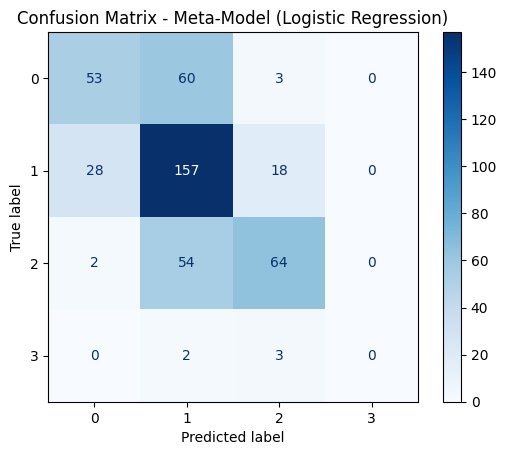


Meta-Model (XGBoost) Performance:
Accuracy: 0.5495
Precision: 0.5480
Recall: 0.5495
F1 Score: 0.5414

Confusion Matrix (Meta-Model (XGBoost)):
[[ 57  48  10   1]
 [ 39 139  25   0]
 [  3  67  48   2]
 [  0   0   5   0]]


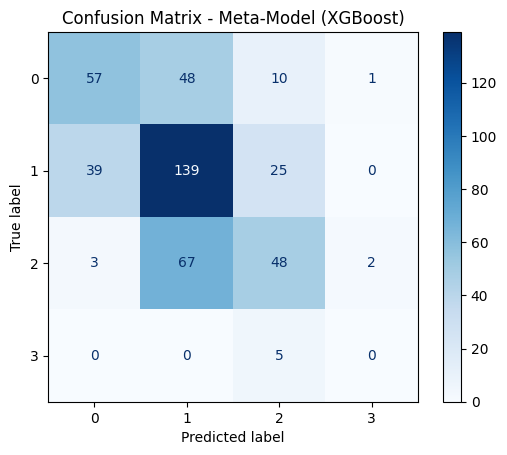

In [231]:
# ==================================
# Step 4: Evaluate Meta-Model Performance
# ==================================
def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluates a meta-model's performance and plots the confusion matrix.
    """
    # Metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Print Metrics
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix ({model_name}):\n{cm}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    disp.plot(cmap=plt.cm.Blues, colorbar=True)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_val_meta, meta_pred_lr, "Meta-Model (Logistic Regression)")

# Evaluate XGBoost
evaluate_model(y_val_meta, meta_pred_xgb, "Meta-Model (XGBoost)")

FeedForward Neural Network model loaded.
MLP model loaded.
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


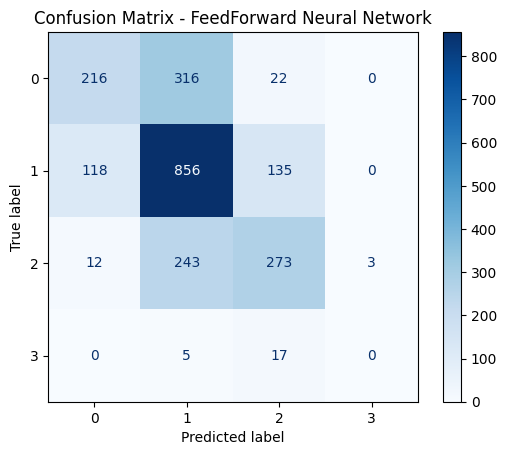

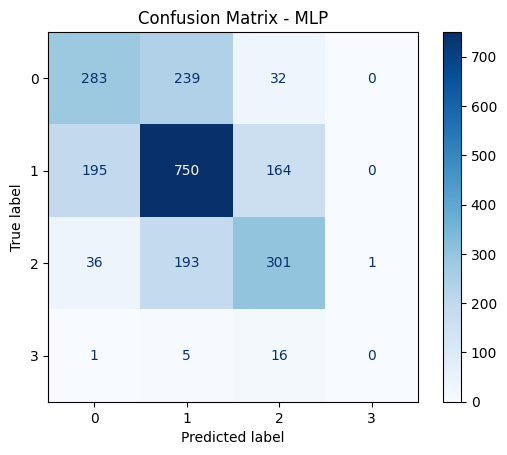


Model Performance Summary:
                        Model  Accuracy  Precision    Recall  F1 Score  \
0  FeedForward Neural Network  0.606949   0.604096  0.606949  0.592555   
1                         MLP  0.601986   0.594183  0.601986  0.597489   

                                    Confusion Matrix  
0  [[216, 316, 22, 0], [118, 856, 135, 0], [12, 2...  
1  [[283, 239, 32, 0], [195, 750, 164, 0], [36, 1...  


In [234]:
# ==================================
# Step 1: Load Saved Models
# ==================================
# Load models from their respective paths
ffnn_model_path = '/content/drive/My Drive/FeedForwardNeuralNetworkModel/feed_forward_nn_model.keras'
ffnn_model = load_model(ffnn_model_path)
print("FeedForward Neural Network model loaded.")

mlp_model_path = '/content/drive/My Drive/MLP_Models/mlp_best_model_checkpoint.joblib'
mlp_model = joblib.load(mlp_model_path)
print("MLP model loaded.")

# ==================================
# Step 2: Make Predictions with Each Model
# ==================================
# Ensure predictions are converted to class labels
ffnn_pred = np.argmax(ffnn_model.predict(X_test), axis=1)
mlp_pred = np.argmax(mlp_model.predict_proba(X_test), axis=1)

# ==================================
# Step 3: Define Evaluation Function
# ==================================
def evaluate_model(y_true, y_pred, model_name, results_list):
    """
    Evaluates a model's performance and appends metrics to results_list.
    """
    # Compute Metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    disp.plot(cmap=plt.cm.Blues, colorbar=True)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Append to results
    results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    })
# ==================================
# Step 4: Evaluate All Models
# ==================================
# List to store results
results = []

# Evaluate each model
evaluate_model(y_test_labels, ffnn_pred, "FeedForward Neural Network", results)
evaluate_model(y_test_labels, mlp_pred, "MLP", results)

# ==================================
# Step 5: Display Results Summary
# ==================================
# Convert results list to a DataFrame
neural_networks_InjuryType_results_df = pd.DataFrame(results)

# Display the summary table
print("\nModel Performance Summary:")
print(neural_networks_InjuryType_results_df)

In [235]:
# Save results locally in Google Drive
results_save_path = '/content/drive/My Drive/neural_networks_InjuryType_results_summary.csv'
neural_networks_InjuryType_results_df.to_csv(results_save_path, index=False)
print(f"\nResults saved to: {results_save_path}")


Results saved to: /content/drive/My Drive/neural_networks_InjuryType_results_summary.csv


In [236]:
# Path to the saved CSV file in Google Drive
results_load_path = '/content/drive/My Drive/neural_networks_InjuryType_results_summary.csv'

# Load the CSV file into a DataFrame
neural_networks_InjuryType_results_df = pd.read_csv(results_load_path)

# Display the loaded results
print("\nLoaded Model Performance Summary:")
print(neural_networks_InjuryType_results_df)


Loaded Model Performance Summary:
                        Model  Accuracy  Precision    Recall  F1 Score  \
0  FeedForward Neural Network  0.606949   0.604096  0.606949  0.592555   
1                         MLP  0.601986   0.594183  0.601986  0.597489   

                                    Confusion Matrix  
0  [[216 316  22   0]\n [118 856 135   0]\n [ 12 ...  
1  [[283 239  32   0]\n [195 750 164   0]\n [ 36 ...  


Ensemble Model Metrics:
Accuracy: 0.6101
Precision: 0.6027
Recall: 0.6101
F1 Score: 0.6010

Confusion Matrix:
[[248 282  24   0]
 [154 815 140   0]
 [ 20 220 289   2]
 [  1   4  17   0]]

Ensemble Model Classification Report:

              precision    recall  f1-score   support

           0       0.59      0.45      0.51       554
           1       0.62      0.73      0.67      1109
           2       0.61      0.54      0.58       531
           3       0.00      0.00      0.00        22

    accuracy                           0.61      2216
   macro avg       0.45      0.43      0.44      2216
weighted avg       0.60      0.61      0.60      2216



<Figure size 1000x800 with 0 Axes>

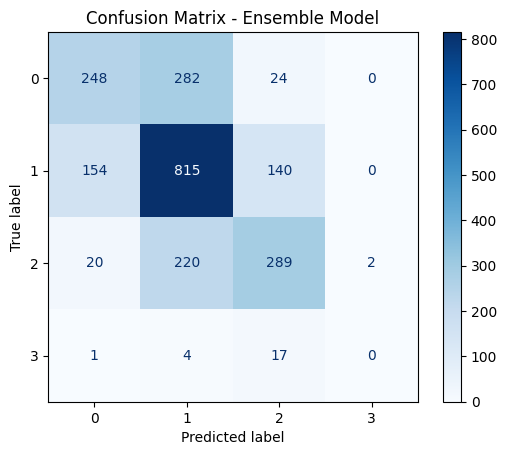

In [237]:
# ==================================
# Step 3: Evaluate Ensemble Model
# ==================================
if len(y_test.shape) > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

# Metrics
ensemble_accuracy = accuracy_score(y_test_labels, ensemble_pred)
ensemble_precision = precision_score(y_test_labels, ensemble_pred, average='weighted')
ensemble_recall = recall_score(y_test_labels, ensemble_pred, average='weighted')
ensemble_f1 = f1_score(y_test_labels, ensemble_pred, average='weighted')
cm = confusion_matrix(y_test_labels, ensemble_pred)

# Print Metrics
print(f"Ensemble Model Metrics:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1 Score: {ensemble_f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nEnsemble Model Classification Report:\n")
print(classification_report(y_test_labels, ensemble_pred))

# Plot Confusion Matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_labels))
plt.figure(figsize=(10, 8))
cmd.plot(cmap=plt.cm.Blues, colorbar=True)
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

**STACKING**

In [238]:
# ==================================
# Step 1: Prepare Stacking Data
# ==================================
# Concatenate model predictions (as features for the meta-model)
stacking_features = np.hstack((ffnn_pred_proba, mlp_pred_proba))

# Split stacking data into train and validation sets
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(
    stacking_features, y_test_labels, test_size=0.2, random_state=42
)

In [239]:
# ==================================
# Step 2: Train Meta-Models
# ==================================

# Logistic Regression Meta-Model
meta_model_lr = LogisticRegression(max_iter=1000, random_state=42)
meta_model_lr.fit(X_train_meta, y_train_meta)

LogisticRegression(max_iter=1000, random_state=42)

In [240]:
# XGBoost Meta-Model
meta_model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
meta_model_xgb.fit(X_train_meta, y_train_meta)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:52:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [241]:
# ==================================
# Step 3: Make Predictions with Meta-Models
# ==================================

# Logistic Regression Predictions
meta_pred_lr = meta_model_lr.predict(X_val_meta)
meta_pred_proba_lr = meta_model_lr.predict_proba(X_val_meta)

# XGBoost Predictions
meta_pred_xgb = meta_model_xgb.predict(X_val_meta)
meta_pred_proba_xgb = meta_model_xgb.predict_proba(X_val_meta)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Meta-Model (Logistic Regression) Performance:
Accuracy: 0.6171
Precision: 0.6263
Recall: 0.6171
F1 Score: 0.6071

Confusion Matrix (Meta-Model (Logistic Regression)):
[[ 53  60   3   0]
 [ 28 157  18   0]
 [  2  54  64   0]
 [  0   2   3   0]]


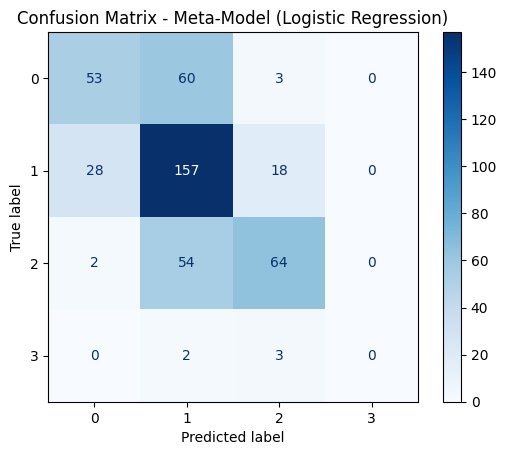


Meta-Model (XGBoost) Performance:
Accuracy: 0.5495
Precision: 0.5480
Recall: 0.5495
F1 Score: 0.5414

Confusion Matrix (Meta-Model (XGBoost)):
[[ 57  48  10   1]
 [ 39 139  25   0]
 [  3  67  48   2]
 [  0   0   5   0]]


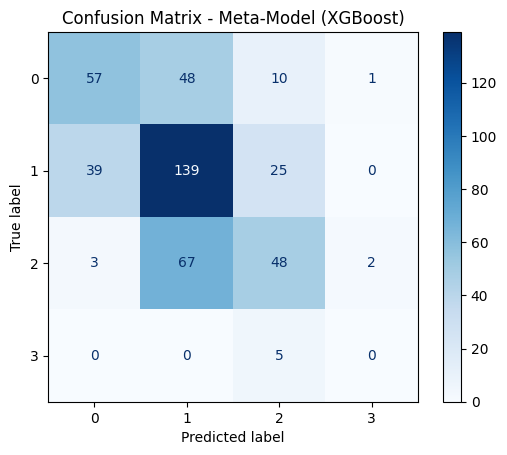

In [242]:
# ==================================
# Step 4: Evaluate Meta-Model Performance
# ==================================
def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluates a meta-model's performance and plots the confusion matrix.
    """
    # Metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Print Metrics
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix ({model_name}):\n{cm}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    disp.plot(cmap=plt.cm.Blues, colorbar=True)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_val_meta, meta_pred_lr, "Meta-Model (Logistic Regression)")

# Evaluate XGBoost
evaluate_model(y_val_meta, meta_pred_xgb, "Meta-Model (XGBoost)")